In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import math

%matplotlib inline

In [2]:
import scattertext as st
import seaborn as sns
sns.set()

In [3]:
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [4]:
from sklearn import mixture

In [5]:
from fuzzywuzzy import fuzz
from IPython.display import Image
import os

/Users/datnguyen/Documents/Git/env/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Constant variables

In [6]:
data_path = 'liquor_data.csv'
flavour_colums = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']

## Load data

In [7]:
def load_data(data_path):
    return pd.read_csv(data_path, encoding='utf-8')

In [8]:
df_initial = load_data(data_path)
# df_initial.head()

In [9]:
# df_initial['id'] = df_initial.index.values

In [10]:
df_initial['f_mean'] = df_initial[flavour_colums].mean(axis=1)
df_initial['flavour_tags'] = df_initial['flavour_tags'].str.replace('|', ' ')
# df_initial['flavour_tags'] = df_initial['flavour_tags'].str.replace('|', ' ')

In [15]:
df_initial[df_initial.f1.isnull()]

,name,intl_name,brand_name,brand_intl_name,year_month,rank,score,f1,f2,f3,f4,f5,f6,flavour_tags,checkin_count,pictures,similar_brands,id,f_mean
7,北の勝,Kitanokatsu,北海道,Hokkaido,202001,8,4.024530,NaN,NaN,NaN,NaN,NaN,NaN,マイルド フレッシュ 花 豊か キレ フルーティ ガス スッキリ 軽快 辛口 甘味 バラン...,63,https://s3-ap-northeast-1.amazonaws.com/physal...,墨廼江|加茂錦|繁枡|大信州|土佐しらぎく,1562,NaN
10,大雪乃蔵,Taisetsunokura,北海道,Hokkaido,202001,11,4.011490,NaN,NaN,NaN,NaN,NaN,NaN,丸み 優しい スイスイ 辛口 旨味 キリリ さわやか フレッシュ 華やか バランス 常温 ...,50,https://s3-ap-northeast-1.amazonaws.com/physal...,若竹|臥龍梅|あさ開|谷川岳|きりんざん,3,NaN
11,風のささやき,Kazenosasayaki,北海道,Hokkaido,202001,12,4.011301,NaN,NaN,NaN,NaN,NaN,NaN,さらり 優しい 軽快 常温 さっぱり 辛口 旨味 スッキリ 酸味,14,https://s3-ap-northeast-1.amazonaws.com/physal...,NaN,8,NaN
12,十一州,NaN,北海道,Hokkaido,202001,13,4.009420,NaN,NaN,NaN,NaN,NaN,NaN,昔ながら 控えめ 甘味 穏やか 常温 さっぱり 上品 キリリ 苦味 軽快 余韻 フルーティ...,44,https://s3-ap-northeast-1.amazonaws.com/physal...,松みどり|聖泉|田酒|黎明|豊盃,2309,NaN
13,まる田,Maruta,北海道,Hokkaido,202001,14,4.009420,NaN,NaN,NaN,NaN,NaN,NaN,あっさり コク 薄い さらり 熱燗 上品 バランス キレ 常温 濃厚 スッキリ 酸味 しっ...,20,https://s3-ap-northeast-1.amazonaws.com/physal...,湊屋藤助|ん|大七|天領|義侠,1275,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,泰斗,Taito,熊本県,Kumamoto,202001,7,4.008149,NaN,NaN,NaN,NaN,NaN,NaN,まろやか ツン リンゴ 芳醇 綺麗 コク 華やか バランス しっかり ほのか 旨味 酸味 ...,19,https://s3-ap-northeast-1.amazonaws.com/physal...,大正の鶴|亀齢萬年|南部美人|燦爛|亀の井,4390,NaN
1060,美少年,NaN,熊本県,Kumamoto,202001,9,4.007633,NaN,NaN,NaN,NaN,NaN,NaN,じわじわ チーズ 辛口 コク キレ ほのか スッキリ 甘味 酸味,30,https://s3-ap-northeast-1.amazonaws.com/physal...,NaN,2613,NaN
1067,山水,Sansui,大分県,Oita,202001,7,4.007098,NaN,NaN,NaN,NaN,NaN,NaN,冷酒 穏やか 酸味 甘味,8,https://s3-ap-northeast-1.amazonaws.com/physal...,NaN,989,NaN
1068,一の井手,Ichinoide,大分県,Oita,202001,8,4.007098,NaN,NaN,NaN,NaN,NaN,NaN,柑橘 ピリリ なめらか 熱燗 穏やか ほのか さわやか 苦味 しっかり 甘味 酸味 辛口,14,https://s3-ap-northeast-1.amazonaws.com/physal...,花美蔵|かもみどり|宮の雪|辨天|朝日山,991,NaN


## Data Exploration

In [12]:
df_missing_infor = pd.DataFrame(df_initial.isnull().sum(axis=0)).reset_index()
df_missing_infor.columns = ['column name', 'missing count']
df_missing_infor['missing percent'] = ((df_initial.shape[0] - df_missing_infor['missing count']) / df_initial.shape[0]) * 100
df_missing_infor

,column name,missing count,missing percent
0,name,0,100.000000
1,intl_name,144,86.567164
2,brand_name,0,100.000000
3,brand_intl_name,0,100.000000
4,year_month,0,100.000000
5,rank,0,100.000000
6,score,0,100.000000
7,f1,326,69.589552
8,f2,326,69.589552
9,f3,326,69.589552


## Data cleaning

In [13]:
def sequel(string_1, string_2):
    if pd.isnull(string_1): return False
    return (fuzz.ratio(string_1, string_2) > 50 or fuzz.token_sort_ratio(string_1, string_2) > 50)

In [15]:
df_missing_f = df_initial[df_initial.f1.isnull() & df_initial.flavour_tags.notnull()]

In [16]:
def filling_data(df, df_missing):
    df_new = df.copy()
    
    for idx, row in df_missing.iterrows():
        flavour_tags = row['flavour_tags']
        group_data = df_new[df_new['flavour_tags'].apply(lambda x: sequel(x, flavour_tags))]
        mean_f1 = group_data['f1'].mean()
        if pd.isnull(mean_f1): continue
        
        mean_f2 = group_data['f2'].mean()
        mean_f3 = group_data['f3'].mean()
        mean_f4 = group_data['f4'].mean()      
        mean_f5 = group_data['f5'].mean()
        mean_f6 = group_data['f6'].mean()
        
        df_new.at[idx, "f1"] = mean_f1
        df_new.at[idx, "f2"] = mean_f2
        df_new.at[idx, "f3"] = mean_f3
        df_new.at[idx, "f4"] = mean_f4
        df_new.at[idx, "f5"] = mean_f5
        df_new.at[idx, "f6"] = mean_f6
            
    return df_new

In [17]:
df_filling = filling_data(df_initial, df_missing_f)

In [18]:
# int(len(df_filling)/10) - 8

## Implement algorithm

In [19]:
df_nan_cleared = df_filling[df_filling.f1.notnull()].reset_index()
df_nan_cleared.shape

(1040, 20)

In [20]:
flavour_matrix = df_nan_cleared.as_matrix(flavour_colums)

/Users/datnguyen/Documents/Git/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [21]:
gausian_filter = lambda x,y,sigma: math.exp(-(x-y)**2/(2*sigma**2))

In [138]:
n_clusters = 113
gauss_mixture = GaussianMixture(n_components=n_clusters, covariance_type='full').fit(flavour_matrix)
labels = gauss_mixture.predict(flavour_matrix)
df_nan_cleared['cluster'] = labels

In [139]:
# labels

In [140]:
# import itertools
# from scipy import linalg
# import matplotlib as mpl

# lowest_bic = np.infty
# bic = []
# n_components_range = range(100, 115)
# cv_types = ['spherical', 'tied', 'diag', 'full']
# for cv_type in cv_types:
#     for n_components in n_components_range:
#         # Fit a mixture of Gaussians with EM
#         gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
#         gmm.fit(flavour_matrix)
#         bic.append(gmm.bic(flavour_matrix))
#         if bic[-1] < lowest_bic:
#             lowest_bic = bic[-1]
#             best_gmm = gmm

# bic = np.array(bic)
# color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
# clf = best_gmm
# bars = []

# # Plot the BIC scores
# plt.figure(figsize=(8, 6))
# spl = plt.subplot(2, 1, 1)
# # plt.rcParams['figure.figsize'] = [1, 1]
# for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
#     xpos = np.array(n_components_range) + .2 * (i - 2)
#     bars.append(plt.bar(xpos, bic[i * len(n_components_range):
#                                   (i + 1) * len(n_components_range)],
#                         width=.2, color=color))
# plt.xticks(n_components_range)
# plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
# plt.title('BIC score per model')
# xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
#     .2 * np.floor(bic.argmin() / len(n_components_range))
# plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
# spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], cv_types)

In [141]:
def plot_data(data):
    labels = gauss_mixture.predict(data)
    df_new = pd.DataFrame(data)
    df_new['cluster'] = labels
    
    color=list(np.random.choice(range(256), size=n_clusters))
    print(color)
    for k in range(0, n_clusters):
        data = df_new[df_new["cluster"]==k]
        plt.scatter(data[3], data[4], c=color[k], cmap='True')
    plt.show()

In [142]:
# plot_data(flavour_matrix)

In [143]:
def calculate_sigma(list_flavour_taste):
    mean = np.mean(list_flavour_taste)
    
    sigma_hat = 0
    for i, value in enumerate(list_flavour_taste):
        sigma_hat += (value - mean)**2
    
    return float(math.sqrt(sigma_hat/len(list_flavour_taste)))

In [144]:
def compare_flavour_tags(tag_1, tag_2):
    if pd.isnull(tag_1) or pd.isnull(tag_2): return 0
    
    tag_1 = tag_1.split(' ')
    tag_2 = tag_2.split(' ')
    
    count = 0
    for i in tag_1:
        if i in tag_2:
            count += 1
            
    return float(count/len(tag_1))

In [145]:
def criteria_selection(f1_m, f2_m, f3_m, f4_m, f5_m, f6_m,
                       f1_c, f2_c, f3_c, f4_c, f5_c, f6_c,
                       sigma_1, sigma_2, sigma_3, sigma_4, sigma_5, sigma_6,
                       flavour_tags_m, flavour_tags_c):
    fc_1 = gausian_filter(f1_m, f1_c, sigma_1)
    fc_2 = gausian_filter(f2_m, f2_c, sigma_2)
    fc_3 = gausian_filter(f3_m, f3_c, sigma_3)
    fc_4 = gausian_filter(f4_m, f4_c, sigma_4)
    fc_5 = gausian_filter(f5_m, f5_c, sigma_5)
    fc_6 = gausian_filter(f6_m, f6_c, sigma_6)
    fc_7 = fuzz.token_sort_ratio(flavour_tags_m, flavour_tags_c)/100
    print('fc1-6 ---- {} --- {}'.format(fc_1 + fc_2 + fc_3 + fc_4 + fc_5 + fc_6, fc_7))
    
    return (fc_1 + fc_2 + fc_3 + fc_4 + fc_5 + fc_6) + fc_7

In [146]:
def recommand(df, entry_id):
    entry = df.iloc[entry_id]
    cluster = entry.cluster
    data = df[df.cluster == cluster]
    flavour_value = data[flavour_colums]
    flavour_tags = data['flavour_tags']
    
    sigma_1 = calculate_sigma(flavour_value['f1'])
    sigma_2 = calculate_sigma(flavour_value['f2'])
    sigma_3 = calculate_sigma(flavour_value['f3'])
    sigma_4 = calculate_sigma(flavour_value['f4'])
    sigma_5 = calculate_sigma(flavour_value['f5'])
    sigma_6 = calculate_sigma(flavour_value['f6'])
    
    flavour_list = list(data.as_matrix(np.concatenate([flavour_colums, ['flavour_tags', 'pictures', 'name']])))
    m_item = entry[flavour_colums]
    f1_m, f2_m, f3_m, f4_m, f5_m, f6_m = m_item[0], m_item[1], m_item[2], m_item[3], m_item[4], m_item[5]
    flavour_tags_m = entry['flavour_tags']
#     print(flavour_list[:, 8])
    flavour_list.sort(key=lambda x: criteria_selection(f1_m, f2_m, f3_m, f4_m, f5_m, f6_m,
                                                       x[0], x[1], x[2], x[3], x[4], x[5],
                                                       sigma_1, sigma_2, sigma_3, sigma_4, sigma_5, sigma_6,
                                                       flavour_tags_m, x[6]),
                                                       reverse=True)
    
    return flavour_list[:6]

In [147]:
def plot_results(liquor_main, liquor_compared):
    index = np.arange(6)
    bar_width = 0.35
    
    j = {idx: [x[0], x[1], x[2], x[3], x[4], x[5]] 
         for idx, x in enumerate([liquor_main, liquor_compared])}
    df = pd.DataFrame(j)
    print(df)
    
    fig, ax = plt.subplots()
    
    main = ax.bar(index, list(df[0]), bar_width, label="Main")
    compared = ax.bar(index+bar_width, list(df[1]), bar_width, label="Compare")
    
    ax.set_xlabel('Flavour tags')
    ax.set_ylabel('Values')
    ax.set_title('Compare result')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(['f1', 'f2', 'f3', 'f4', 'f5', 'f6'])
    ax.legend()
    
    plt.show()

In [148]:
image_path = 'Image_Results'
if not os.path.exists(image_path):
    os.mkdir(image_path)

In [149]:
from PIL import Image
import requests
from io import BytesIO
from scipy.misc import toimage
from PIL import Image

def display_img_array(url, img_dir):
#     im = PIL.Image.fromarray(ima)
#     bio = BytesIO()
#     im.save(bio, format='png')
#     print(ima)
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img_arr = np.array(img)
        im = Image.fromarray(img_arr)
#         im.save('{}/{}.png'.format(img_dir, url.split('/')[-1]))
        plt.imshow(img)
        plt.show()
    except:
        pass

# for ima in images:
#     display_img_array(ima)

def plot_image_results(results):
    img_des = 'Image_Results/{}'.format(results[0][8])
#     if not os.path.exists(img_des):
#         os.mkdir(img_des)
    
    for idx, row in enumerate(results):
        pictures = row[7].split('|')
        if len(pictures) == 0: continue
        print('------{}-------'.format(row[8]))
        
        for p in pictures:
            display_img_array(p, img_des)

In [150]:
# def compare_flavour_tags(str_1, str_2):
#     return fuzz.token_sort_ratio(str_1, str_2)

In [430]:
lq1 = df_nan_cleared[df_nan_cleared.name == "燦然"]
lq1

,index,name,intl_name,brand_name,brand_intl_name,year_month,rank,score,f1,f2,...,f4,f5,f6,flavour_tags,checkin_count,pictures,similar_brands,id,f_mean,cluster
842,871,燦然,Sanzen,岡山県,Okayama,202001,6,4.023239,0.388606,0.500665,...,0.477916,0.333912,0.411707,フルーティ 甘味 力強い パイナップル 旨味 飴 燗酒 バナナ 穀物 苦味 フレッシュ 厚...,102,https://s3-ap-northeast-1.amazonaws.com/physal...,紀土|六十餘洲|十四代|雪の茅舎|梵,859,0.401832,92


In [535]:
# lq2 = df_nan_cleared[df_nan_cleared.name == "玉乃光"]
# lq2

In [527]:
# lq3 = df_nan_cleared[df_nan_cleared.name == "聖"]
# lq3

In [503]:
# plot_results(lq1[flavour_colums].values[0], lq2[flavour_colums].values[0])
# plot_results(lq1[flavour_colums].values[0], lq3[flavour_colums].values[0])

In [420]:
# x = df_initial[df_initial.name == "肥前蔵心"].flavour_tags.values[0]
# y = df_nan_cleared[df_nan_cleared.name == "豊潤"].flavour_tags.values[0]

# compare_flavour_tags(x, y)

In [530]:
from random import randint
import time

time_start = time.time()
# entry_id = randint(0, len(df_nan_cleared))
entry_id = 684
results = recommand(df_nan_cleared, entry_id)
print('Time query ---- {}'.format(time.time() - time_start))

fc1-6 ---- 3.476464506257828 --- 0.44
fc1-6 ---- 3.44255368973905 --- 0.47
fc1-6 ---- 4.760965528595299 --- 0.41
fc1-6 ---- 2.311979930555063 --- 0.43
fc1-6 ---- 3.6445852535719685 --- 0.52
fc1-6 ---- 3.3435540599213205 --- 0.38
fc1-6 ---- 2.646766223337312 --- 0.28
fc1-6 ---- 2.8729062480533747 --- 0.34
fc1-6 ---- 2.8687758197413484 --- 0.52
fc1-6 ---- 2.765877815014312 --- 0.52
fc1-6 ---- 3.1721251112895974 --- 0.34
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.040776475414712 --- 0.45
fc1-6 ---- 2.5820867526828 --- 0.44
fc1-6 ---- 3.139132155673133 --- 0.36
fc1-6 ---- 1.98317814757675 --- 0.39
fc1-6 ---- 2.050526161400156 --- 0.42
fc1-6 ---- 2.8285642352617217 --- 0.38
Time query ---- 0.01717209815979004


/Users/datnguyen/Documents/Git/env/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [531]:
len(results)

6

In [532]:
[i[8] for i in results]

['玉乃光', 'NEXT5', '龍力', '松の寿', '作田', '七郎兵衛']

In [533]:
[compare_flavour_tags(i[6], results[0][6]) for i in results]

[1.0,
 0.5454545454545454,
 0.38095238095238093,
 0.47619047619047616,
 0.5,
 0.47368421052631576]

          0         1
0  0.330286  0.330286
1  0.410832  0.410832
2  0.404456  0.404456
3  0.531369  0.531369
4  0.397426  0.397426
5  0.343865  0.343865


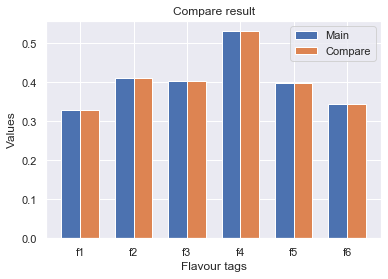

          0         1
0  0.330286  0.317845
1  0.410832  0.374132
2  0.404456  0.389211
3  0.531369  0.514295
4  0.397426  0.362831
5  0.343865  0.358336


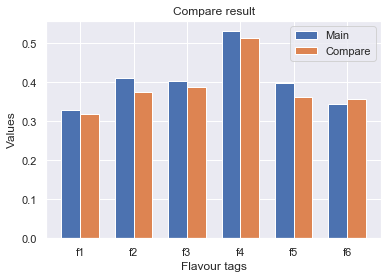

          0         1
0  0.330286  0.345280
1  0.410832  0.433808
2  0.404456  0.407720
3  0.531369  0.484783
4  0.397426  0.368802
5  0.343865  0.394116


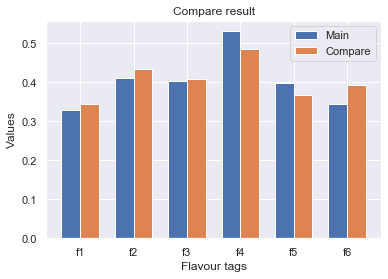

          0         1
0  0.330286  0.330283
1  0.410832  0.457790
2  0.404456  0.363548
3  0.531369  0.486350
4  0.397426  0.401346
5  0.343865  0.389306


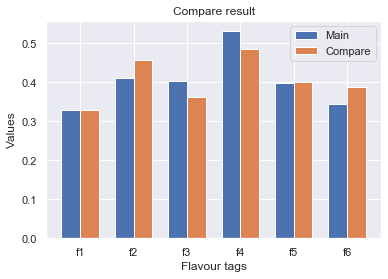

          0         1
0  0.330286  0.335967
1  0.410832  0.386570
2  0.404456  0.351220
3  0.531369  0.484258
4  0.397426  0.395037
5  0.343865  0.410528


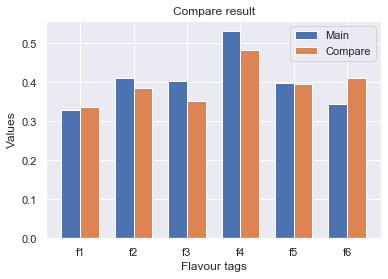

          0         1
0  0.330286  0.322337
1  0.410832  0.423851
2  0.404456  0.360204
3  0.531369  0.480454
4  0.397426  0.360508
5  0.343865  0.390836


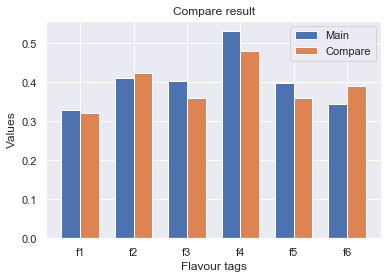

In [534]:
entry_record = df_nan_cleared.iloc[entry_id]
liquor_main = entry_record[flavour_colums]

for idx, row in enumerate(results):
#     if idx == 0: continue
    liquor_compared = row
    plot_results(liquor_main, liquor_compared)

In [545]:
def compare_with_sakenowa(list_str_products):
    results = []
    
    for i in list_str_products:
        liquor = df_nan_cleared[df_nan_cleared.name == i]
        results.append(liquor[flavour_colums].values[0])
        
    for i in results:
        plot_results(results[0], i)

          0         1
0  0.330286  0.330286
1  0.410832  0.410832
2  0.404456  0.404456
3  0.531369  0.531369
4  0.397426  0.397426
5  0.343865  0.343865


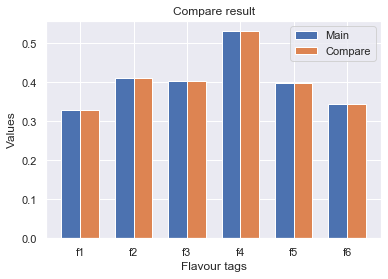

          0         1
0  0.330286  0.345280
1  0.410832  0.433808
2  0.404456  0.407720
3  0.531369  0.484783
4  0.397426  0.368802
5  0.343865  0.394116


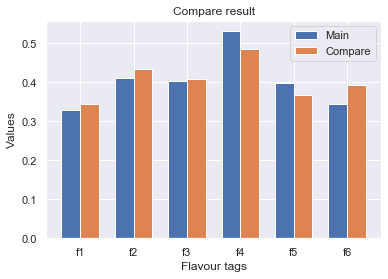

          0         1
0  0.330286  0.428593
1  0.410832  0.402555
2  0.404456  0.364314
3  0.531369  0.450689
4  0.397426  0.390983
5  0.343865  0.406872


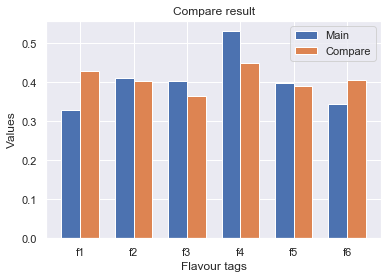

          0         1
0  0.330286  0.367470
1  0.410832  0.387574
2  0.404456  0.372121
3  0.531369  0.485931
4  0.397426  0.400708
5  0.343865  0.423772


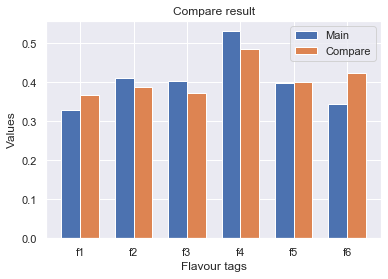

          0         1
0  0.330286  0.402908
1  0.410832  0.365395
2  0.404456  0.352201
3  0.531369  0.544330
4  0.397426  0.378374
5  0.343865  0.375025


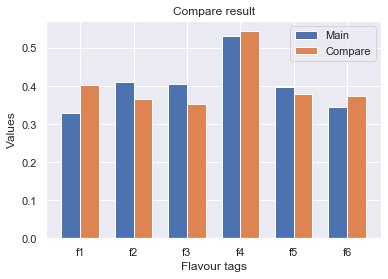

          0         1
0  0.330286  0.350828
1  0.410832  0.404954
2  0.404456  0.497279
3  0.531369  0.446931
4  0.397426  0.326797
5  0.343865  0.398877


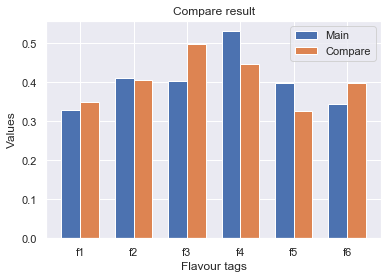

In [546]:
list_str_products = ['玉乃光', '龍力', '北雪', '一ノ蔵', '東北泉', '奥']

compare_with_sakenowa(list_str_products)

In [360]:
def compare_similar_percent(entry_record, results):
    similar_brands = entry_record.similar_brands
    if pd.isnull(similar_brands): return 0
    similar_brands = similar_brands.split('|')
#     similar_brands = similar_brands.replace('|', ' ')
#     print(similar_brands)
    similar_brands_result = [i[8] for i in results]
#     print(similar_brands_result)
    
    count = 0
    for i in similar_brands:
        if i in similar_brands_result: count += 1
    
    return count/len(similar_brands)

In [213]:
compare_similar_percent(entry_record, results)

0.0

In [45]:
def compare_similar_percent_all_records():
    sum_percent = 0.0
    
    for i in df_nan_cleared.index.values:
        _results = recommand(df_nan_cleared, i)
        entry_r = df_nan_cleared.iloc[i]
        sum_percent += compare_similar_percent(entry_r, _results)
        
    return sum_percent

In [46]:
compare_similar_percent_all_records()

/Users/datnguyen/Documents/Git/env/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.637367923896367 --- 0.62
fc1-6 ---- 4.879436389073992 --- 0.65
fc1-6 ---- 4.390293894518514 --- 0.59
fc1-6 ---- 1.6458311617372259 --- 0.56
fc1-6 ---- 2.8204274895136643 --- 0.64
fc1-6 ---- 3.827467692737957 --- 0.43
fc1-6 ---- 3.955450460856508 --- 0.43
fc1-6 ---- 3.9721621518914896 --- 0.57
fc1-6 ---- 3.4098640150261934 --- 0.51
fc1-6 ---- 3.3473282798318906 --- 0.52
fc1-6 ---- 1.6973524677467144 --- 0.51
fc1-6 ---- 3.6761104520825842 --- 0.43
fc1-6 ---- 2.0197658153501616 --- 0.46
fc1-6 ---- 3.74647990117214 --- 0.64
fc1-6 ---- 3.254840250791592 --- 0.4
fc1-6 ---- 4.502505399944111 --- 0.63
fc1-6 ---- 2.1125711214252982 --- 0.54
fc1-6 ---- 3.99720713147818 --- 0.54
fc1-6 ---- 1.5666839115910756 --- 0.55
fc1-6 ---- 3.7483624925939556 --- 0.42
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.3282584311879595 --- 0.44
fc1-6 ---- 2.720950715816927 --- 0.52
fc1-6 ---- 3.197203495441681 --- 0.46
fc1-6 ---- 3.647054600426352 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ----

fc1-6 ---- 4.762862809866979 --- 0.42
fc1-6 ---- 3.0466127541103702 --- 0.44
fc1-6 ---- 4.667359094365875 --- 0.5
fc1-6 ---- 1.635699821761903 --- 0.6
fc1-6 ---- 4.101733098396872 --- 0.53
fc1-6 ---- 4.899490052052984 --- 0.6
fc1-6 ---- 4.9358295768546405 --- 0.61
fc1-6 ---- 4.353355653859872 --- 0.57
fc1-6 ---- 4.714201178183028 --- 0.53
fc1-6 ---- 4.177864651144814 --- 0.5
fc1-6 ---- 3.080231188817884 --- 0.33
fc1-6 ---- 5.247486355745549 --- 0.53
fc1-6 ---- 2.5972296327614246 --- 0.28
fc1-6 ---- 4.352848491524788 --- 0.47
fc1-6 ---- 5.1318088161707 --- 0.46
fc1-6 ---- 5.038755586936281 --- 0.54
fc1-6 ---- 3.8450773844722907 --- 0.52
fc1-6 ---- 4.881029271635669 --- 0.3
fc1-6 ---- 4.206913319008539 --- 0.24
fc1-6 ---- 2.410000083052057 --- 0.46
fc1-6 ---- 3.800518198660152 --- 0.52
fc1-6 ---- 3.6738051292083003 --- 0.44
fc1-6 ---- 3.2504342352068747 --- 0.57
fc1-6 ---- 4.516898749486177 --- 0.53
fc1-6 ---- 5.048994031962058 --- 0.52
fc1-6 ---- 4.8077348487284 --- 0.49
fc1-6 ---- 4.88

fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.8295862560835778 --- 0.47
fc1-6 ---- 2.7043239037386773 --- 0.41
fc1-6 ---- 3.400403109823896 --- 0.46
fc1-6 ---- 2.255897002709297 --- 0.38
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.887304925010356 --- 0.41
fc1-6 ---- 3.16168113445865 --- 0.38
fc1-6 ---- 1.9813917491685469 --- 0.35
fc1-6 ---- 2.152791525381717 --- 0.43
fc1-6 ---- 2.369821837870474 --- 0.39
fc1-6 ---- 3.326994776243654 --- 0.51
fc1-6 ---- 3.0263309732480304 --- 0.57
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.1243401497224728 --- 0.44
fc1-6 ---- 4.783999484330999 --- 0.42
fc1-6 ---- 2.863536322549321 --- 0.49
fc1-6 ---- 3.430837075971645 --- 0.52
fc1-6 ---- 3.1176365530475314 --- 0.37
fc1-6 ---- 4.63230669501367 --- 0.46
fc1-6 ---- 1.923259982932317 --- 0.27
fc1-6 ---- 4.300100013532135 --- 0.4
fc1-6 ---- 3.6804388916127317 --- 0.34
fc1-6 ---- 1.5480585365743575 --- 0.37
fc1-6 ---- 2.9307336492546834 --- 0.53
fc1-6 ---- 4.6404553612204795 --- 0.45
fc1-6 ---- 2.4472967499875873 --- 0.37
fc1-6 ---- 

/Users/datnguyen/Documents/Git/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.



fc1-6 ---- 3.3617873268575393 --- 0.58
fc1-6 ---- 4.121411407795507 --- 0.49
fc1-6 ---- 2.00396414788465 --- 0.52
fc1-6 ---- 1.9613298723641468 --- 0.37
fc1-6 ---- 1.3684265668454654 --- 0.42
fc1-6 ---- 3.8933066062087454 --- 0.38
fc1-6 ---- 1.7006727310066623 --- 0.47
fc1-6 ---- 2.0215354397053287 --- 0.43
fc1-6 ---- 2.8099816688864494 --- 0.45
fc1-6 ---- 2.9432722282829484 --- 0.44
fc1-6 ---- 2.2810432539798233 --- 0.47
fc1-6 ---- 2.769747868096029 --- 0.44
fc1-6 ---- 3.2115500744963255 --- 0.34
fc1-6 ---- 2.4872469820613343 --- 0.4
fc1-6 ---- 1.8555453838446665 --- 0.46
fc1-6 ---- 3.1880884820738724 --- 0.51
fc1-6 ---- 3.3786569026254885 --- 0.63
fc1-6 ---- 2.9417351549252704 --- 0.38
fc1-6 ---- 2.209429715063753 --- 0.38
fc1-6 ---- 2.529143045080338 --- 0.48
fc1-6 ---- 2.033198644179947 --- 0.47
fc1-6 ---- 2.1669769001199026 --- 0.4
fc1-6 ---- 3.4299059130853036 --- 0.41
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.7759397657756226 --- 0.33
fc1-6 ---- 1.8273496893391978 --- 0.54
fc1-6 ----

fc1-6 ---- 4.186497669538762 --- 0.41
fc1-6 ---- 1.8816262074336836 --- 0.44
fc1-6 ---- 2.9032571645699896 --- 0.4
fc1-6 ---- 2.6583375545426593 --- 0.39
fc1-6 ---- 3.016506667222288 --- 0.38
fc1-6 ---- 4.102154648723035 --- 0.48
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.343111081460057 --- 0.57
fc1-6 ---- 2.1187053251949313 --- 0.43
fc1-6 ---- 2.619589887547136 --- 0.57
fc1-6 ---- 4.340967352420958 --- 0.39
fc1-6 ---- 3.188428369147772 --- 0.55
fc1-6 ---- 2.975204555074523 --- 0.41
fc1-6 ---- 2.4424159566925914 --- 0.45
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.8583538034708535 --- 0.48
fc1-6 ---- 3.292748747829806 --- 0.44
fc1-6 ---- 3.295891605100906 --- 0.42
fc1-6 ---- 3.0528362267535556 --- 0.48
fc1-6 ---- 0.9198485044035927 --- 0.58
fc1-6 ---- 2.7684187334070933 --- 0.55
fc1-6 ---- 3.986806290642323 --- 0.64
fc1-6 ---- 1.3922837090313147 --- 0.54
fc1-6 ---- 3.7877036128242385 --- 0.61
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.826663983387257 --- 0.65
fc1-6 ---- 3.611504440950161 --- 0.48
fc1-6 ---

fc1-6 ---- 2.796985458840419 --- 0.53
fc1-6 ---- 4.322519214486069 --- 0.39
fc1-6 ---- 4.66558679645106 --- 0.32
fc1-6 ---- 5.19021409162716 --- 0.37
fc1-6 ---- 2.2059156289244566 --- 0.38
fc1-6 ---- 4.1899913156155435 --- 0.32
fc1-6 ---- 5.018939816110011 --- 0.31
fc1-6 ---- 2.813124090320015 --- 0.33
fc1-6 ---- 3.617971485246222 --- 0.35
fc1-6 ---- 4.425120406307099 --- 0.42
fc1-6 ---- 3.7434680639760494 --- 0.37
fc1-6 ---- 2.7629605211127712 --- 0.34
fc1-6 ---- 4.962836222629432 --- 0.51
fc1-6 ---- 3.9009772667547544 --- 0.45
fc1-6 ---- 4.192180194972562 --- 0.3
fc1-6 ---- 4.058907375189638 --- 0.4
fc1-6 ---- 5.016555407694843 --- 0.47
fc1-6 ---- 3.0930337769606178 --- 0.42
fc1-6 ---- 3.978233417605031 --- 0.46
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.266365289837854 --- 0.35
fc1-6 ---- 1.9171978465477006 --- 0.45
fc1-6 ---- 3.0255470196440655 --- 0.39
fc1-6 ---- 3.6506552895144075 --- 0.44
fc1-6 ---- 3.051857168490866 --- 0.39
fc1-6 ---- 2.90149477778773 --- 0.47
fc1-6 ---- 1.1725839743

fc1-6 ---- 2.937405100254831 --- 0.52
fc1-6 ---- 2.863685501550438 --- 0.32
fc1-6 ---- 3.6583182945984465 --- 0.48
fc1-6 ---- 2.6935312915815137 --- 0.52
fc1-6 ---- 4.592229163121111 --- 0.49
fc1-6 ---- 4.492782344207718 --- 0.59
fc1-6 ---- 3.195894541704741 --- 0.55
fc1-6 ---- 4.790775735754794 --- 0.55
fc1-6 ---- 4.5701233627363465 --- 0.55
fc1-6 ---- 4.055415713243949 --- 0.52
fc1-6 ---- 5.489473207366215 --- 0.72
fc1-6 ---- 3.2693405080874727 --- 0.3
fc1-6 ---- 3.1582680420357536 --- 0.61
fc1-6 ---- 3.9450911060131366 --- 0.43
fc1-6 ---- 4.34986086726249 --- 0.47
fc1-6 ---- 3.7432323133143575 --- 0.35
fc1-6 ---- 3.7569745194668918 --- 0.47
fc1-6 ---- 4.108234472258548 --- 0.2
fc1-6 ---- 2.5618236056087076 --- 0.44
fc1-6 ---- 5.277934312154266 --- 0.67
fc1-6 ---- 5.236314774342957 --- 0.61
fc1-6 ---- 3.2495460664562463 --- 0.62
fc1-6 ---- 4.108234472258547 --- 0.2
fc1-6 ---- 2.204670643140276 --- 0.58
fc1-6 ---- 2.3546556316910383 --- 0.58
fc1-6 ---- 1.4713660026501079 --- 0.48
fc1-

fc1-6 ---- 2.096883590617635 --- 0.54
fc1-6 ---- 3.839418240629605 --- 0.51
fc1-6 ---- 3.8937939861805684 --- 0.53
fc1-6 ---- 2.2501961780076027 --- 0.5
fc1-6 ---- 2.219821010224316 --- 0.5
fc1-6 ---- 2.4414909319410927 --- 0.6
fc1-6 ---- 1.5747489739173064 --- 0.43
fc1-6 ---- 1.942109014309396 --- 0.53
fc1-6 ---- 2.9690583319360027 --- 0.57
fc1-6 ---- 2.779529646314235 --- 0.54
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.5598821939555036 --- 0.53
fc1-6 ---- 2.6637456984250947 --- 0.5
fc1-6 ---- 1.818358097882811 --- 0.46
fc1-6 ---- 3.6842317700277585 --- 0.4
fc1-6 ---- 3.6842317700277585 --- 0.13
fc1-6 ---- 1.7648700738555032 --- 0.44
fc1-6 ---- 3.5076235765294146 --- 0.36
fc1-6 ---- 3.168504686338514 --- 0.55
fc1-6 ---- 2.8786442286149305 --- 0.46
fc1-6 ---- 2.23716512748192 --- 0.49
fc1-6 ---- 1.7691762637456163 --- 0.51
fc1-6 ---- 2.1638757333383567 --- 0.46
fc1-6 ---- 3.1522350380048807 --- 0.4
fc1-6 ---- 2.576775319626388 --- 0.55
fc1-6 ---- 3.491582451601788 --- 0.56
fc1-6 ---- 2.544620

fc1-6 ---- 3.559301490139401 --- 0.54
fc1-6 ---- 3.810201311370618 --- 0.52
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.378594533349292 --- 0.6
fc1-6 ---- 4.5758882737876005 --- 0.56
fc1-6 ---- 4.1392993224699595 --- 0.51
fc1-6 ---- 3.9289493789283734 --- 0.47
fc1-6 ---- 3.0755608626367974 --- 0.46
fc1-6 ---- 5.129088320486164 --- 0.39
fc1-6 ---- 4.01399918630317 --- 0.5
fc1-6 ---- 2.895562782247597 --- 0.33
fc1-6 ---- 3.763909364385864 --- 0.46
fc1-6 ---- 3.1239542730891054 --- 0.38
fc1-6 ---- 2.0612063433033874 --- 0.55
fc1-6 ---- 1.9056098598197693 --- 0.53
fc1-6 ---- 2.192590577729156 --- 0.5
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.131773788347245 --- 0.61
fc1-6 ---- 5.356797285950975 --- 0.47
fc1-6 ---- 2.489797591241562 --- 0.48
fc1-6 ---- 2.8912869447343557 --- 0.55
fc1-6 ---- 2.7341614195373274 --- 0.33
fc1-6 ---- 2.798390208880619 --- 0.51
fc1-6 ---- 2.5340970150167883 --- 0.49
fc1-6 ---- 4.120619744023732 --- 0.49
fc1-6 ---- 3.6511643815173582 --- 0.43
fc1-6 ---- 3.06559708414323 --- 0.3

fc1-6 ---- 1.7530047170863423 --- 0.29
fc1-6 ---- 4.077811411354943 --- 0.55
fc1-6 ---- 3.356283639141618 --- 0.57
fc1-6 ---- 5.073777386026033 --- 0.63
fc1-6 ---- 2.2999127332723104 --- 0.69
fc1-6 ---- 2.0863110833590888 --- 0.52
fc1-6 ---- 2.379710030555849 --- 0.5
fc1-6 ---- 4.048845679742194 --- 0.61
fc1-6 ---- 5.713485547162647 --- 0.59
fc1-6 ---- 3.3125054070805007 --- 0.67
fc1-6 ---- 1.8424171052216816 --- 0.31
fc1-6 ---- 3.0058033167938927 --- 0.61
fc1-6 ---- 5.781299954430192 --- 0.49
fc1-6 ---- 2.6721448606453917 --- 0.47
fc1-6 ---- 2.9722411235478328 --- 0.34
fc1-6 ---- 1.9553889516087093 --- 0.43
fc1-6 ---- 4.693360764519243 --- 0.19
fc1-6 ---- 1.0673401886769907 --- 0.43
fc1-6 ---- 3.4395169055181904 --- 0.59
fc1-6 ---- 3.6787062386674494 --- 0.63
fc1-6 ---- 2.1838692050207262 --- 0.59
fc1-6 ---- 4.693360764519244 --- 0.19
fc1-6 ---- 1.6221947562880763 --- 0.51
fc1-6 ---- 2.504087489981803 --- 0.52
fc1-6 ---- 1.4012905137230256 --- 0.45
fc1-6 ---- 1.1965206532104755 --- 0.

fc1-6 ---- 3.7185415105707698 --- 0.51
fc1-6 ---- 4.2154624264323965 --- 0.39
fc1-6 ---- 5.035793294960639 --- 0.36
fc1-6 ---- 2.1309744104458668 --- 0.34
fc1-6 ---- 2.4989802335011206 --- 0.6
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.5604048254136753 --- 0.76
fc1-6 ---- 2.6708407750712904 --- 0.71
fc1-6 ---- 3.212072142182234 --- 0.63
fc1-6 ---- 3.2357048798745955 --- 0.49
fc1-6 ---- 0.9467524263267769 --- 0.29
fc1-6 ---- 1.1566648674116176 --- 0.63
fc1-6 ---- 4.8761121191458745 --- 0.68
fc1-6 ---- 1.6763257119290111 --- 0.39
fc1-6 ---- 2.6489675237168395 --- 0.49
fc1-6 ---- 3.299305525771781 --- 0.41
fc1-6 ---- 1.5608498815059206 --- 0.0
fc1-6 ---- 2.6273127416343263 --- 0.31
fc1-6 ---- 2.8543621365043843 --- 0.77
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.2841099754237333 --- 0.68
fc1-6 ---- 3.796952647984156 --- 0.48
fc1-6 ---- 3.311813311033931 --- 0.55
fc1-6 ---- 3.3018065936666683 --- 0.38
fc1-6 ---- 3.6790747340382923 --- 0.38
fc1-6 ---- 2.9258834871541333 --- 0.71
fc1-6 ---- 3.637367923896

fc1-6 ---- 3.524989960234008 --- 0.47
fc1-6 ---- 4.085058759574211 --- 0.34
fc1-6 ---- 2.136126983757576 --- 0.32
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.92230337028522 --- 0.32
fc1-6 ---- 3.3541962615250593 --- 0.3
fc1-6 ---- 3.569024747616588 --- 0.33
fc1-6 ---- 2.136126983757576 --- 0.23
fc1-6 ---- 2.700512843959968 --- 0.36
fc1-6 ---- 2.9291612049810265 --- 0.25
fc1-6 ---- 3.0243235657633294 --- 0.16
fc1-6 ---- 2.739164863281582 --- 0.43
fc1-6 ---- 3.147663744392287 --- 0.27
fc1-6 ---- 4.6209478844210174 --- 0.41
fc1-6 ---- 1.03808520890092 --- 0.31
fc1-6 ---- 1.4377788894488495 --- 0.27
fc1-6 ---- 2.7043239037386773 --- 0.43
fc1-6 ---- 2.3691283269302077 --- 0.42
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.02721873818834 --- 0.39
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.330257667637171 --- 0.26
fc1-6 ---- 1.687046108743911 --- 0.49
fc1-6 ---- 2.2979712099183507 --- 0.39
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.9986742828917468 --- 0.36
fc1-6 ---- 4.020882968070428 --- 0.54
fc1-6 ---- 2.386715390381371 

fc1-6 ---- 4.371716014321905 --- 0.29
fc1-6 ---- 4.750937877855032 --- 0.36
fc1-6 ---- 3.5286011928176664 --- 0.21
fc1-6 ---- 4.076645342760823 --- 0.18
fc1-6 ---- 0.49629208685294846 --- 0.27
fc1-6 ---- 1.8181808473344707 --- 0.25
fc1-6 ---- 2.8690233482192156 --- 0.23
fc1-6 ---- 0.46327256941552175 --- 0.2
fc1-6 ---- 5.575683751023219 --- 0.26
fc1-6 ---- 3.629204042772512 --- 0.15
fc1-6 ---- 3.6842317700277585 --- 0.16
fc1-6 ---- 4.5174013131584205 --- 0.25
fc1-6 ---- 3.9282853259997865 --- 0.26
fc1-6 ---- 3.5631230414604325 --- 0.22
fc1-6 ---- 6.0 --- 0.5
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.5156289085409225 --- 0.23
fc1-6 ---- 3.8116982558799064 --- 0.22
fc1-6 ---- 3.781612216960222 --- 0.14
fc1-6 ---- 3.0445912131978226 --- 0.19
fc1-6 ---- 4.756204722989836 --- 0.17
fc1-6 ---- 4.4560359162625 --- 0.17
fc1-6 ---- 1.8473641543219566 --- 0.21
fc1-6 ---- 3.4092735141155477 --- 0.24
fc1-6 ---- 3.7654532246678727 --- 0.26
fc1-6 ---- 2.185996580141312 --- 0.18
fc1-6 ---- 2.309977714939823

fc1-6 ---- 3.8147000236964566 --- 0.52
fc1-6 ---- 4.117416992144556 --- 0.53
fc1-6 ---- 2.982984356031263 --- 0.58
fc1-6 ---- 3.594044826153634 --- 0.49
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 5.320537129015123 --- 0.54
fc1-6 ---- 4.359126938333471 --- 0.69
fc1-6 ---- 2.614065789530249 --- 0.63
fc1-6 ---- 2.6864719412213667 --- 0.39
fc1-6 ---- 3.882249591273512 --- 0.57
fc1-6 ---- 4.949204911978078 --- 0.37
fc1-6 ---- 3.1742030441489266 --- 0.55
fc1-6 ---- 4.837065655433783 --- 0.58
fc1-6 ---- 3.6018325389241657 --- 0.5
fc1-6 ---- 4.450709843320546 --- 0.6
fc1-6 ---- 3.594002278152454 --- 0.61
fc1-6 ---- 5.190276736951731 --- 0.7
fc1-6 ---- 3.3366621858717505 --- 0.65
fc1-6 ---- 3.293098793704984 --- 0.62
fc1-6 ---- 3.2492216132553873 --- 0.42
fc1-6 ---- 3.7631757869846143 --- 0.56
fc1-6 ---- 3.3085420526418594 --- 0.48
fc1-6 ---- 3.7105635268968777 --- 0.54
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.545986123335907 --- 0.59
fc1-6 ---- 1.8817893998668758 --- 0.55
fc1-6 ---- 3.910966801333877 --- 0.

fc1-6 ---- 2.3076864778740207 --- 0.37
fc1-6 ---- 1.9035760896199996 --- 0.33
fc1-6 ---- 3.212182984684527 --- 0.55
fc1-6 ---- 2.63102574505818 --- 0.47
fc1-6 ---- 2.2709055399013893 --- 0.52
fc1-6 ---- 1.302992285003008 --- 0.52
fc1-6 ---- 2.390883302562303 --- 0.29
fc1-6 ---- 2.24687755749578 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.94772162206971 --- 0.46
fc1-6 ---- 1.5110827166576848 --- 0.25
fc1-6 ---- 4.20718438561816 --- 0.51
fc1-6 ---- 3.6583606407676634 --- 0.33
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.895458694254602 --- 0.36
fc1-6 ---- 2.648562423008177 --- 0.55
fc1-6 ---- 2.1143031020185963 --- 0.5
fc1-6 ---- 3.09185146746933 --- 0.47
fc1-6 ---- 1.9126876619740223 --- 0.48
fc1-6 ---- 2.6158670401274358 --- 0.38
fc1-6 ---- 3.0648119865513426 --- 0.34
fc1-6 ---- 3.7266928685027256 --- 0.49
fc1-6 ---- 3.4981991131425785 --- 0.52
fc1-6 ---- 1.7249441127962402 --- 0.39
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.787560024927707 --- 0.43
fc1-6 ---- 1.5184782370369372 --- 0.48
fc1-6 ---- 2

fc1-6 ---- 1.0834894352405668 --- 0.52
fc1-6 ---- 0.08739920467507847 --- 0.31
fc1-6 ---- 2.9622674877303155 --- 0.53
fc1-6 ---- 3.0083474823977365 --- 0.59
fc1-6 ---- 4.448695170165961 --- 0.47
fc1-6 ---- 4.043030382620944 --- 0.45
fc1-6 ---- 2.796985458840419 --- 0.53
fc1-6 ---- 3.1395224103457786 --- 0.43
fc1-6 ---- 1.2610700887789175 --- 0.39
fc1-6 ---- 3.0083474823977365 --- 0.27
fc1-6 ---- 3.339828483449995 --- 0.38
fc1-6 ---- 2.796985458840419 --- 0.3
fc1-6 ---- 2.7432902256086824 --- 0.53
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.2626342912563016 --- 0.39
fc1-6 ---- 3.1409441603871238 --- 0.49
fc1-6 ---- 3.9597754935758362 --- 0.54
fc1-6 ---- 2.876582066687176 --- 0.28
fc1-6 ---- 2.1067935705476097 --- 0.49
fc1-6 ---- 2.7743789028516903 --- 0.54
fc1-6 ---- 4.072663932736454 --- 0.63
fc1-6 ---- 3.7100198263123523 --- 0.34
fc1-6 ---- 4.0113479260191385 --- 0.56
fc1-6 ---- 3.795605967261248 --- 0.46
fc1-6 ---- 1.497333834140557 --- 0.46
fc1-6 ---- 3.243395299371993 --- 0.39
fc1-6 ---- 2

fc1-6 ---- 3.350743072605288 --- 0.49
fc1-6 ---- 5.1206605897166355 --- 0.3
fc1-6 ---- 5.1046880600453255 --- 0.58
fc1-6 ---- 5.130636563762869 --- 0.33
fc1-6 ---- 4.604754599867129 --- 0.52
fc1-6 ---- 5.299638168263172 --- 0.46
fc1-6 ---- 4.564878563865394 --- 0.62
fc1-6 ---- 4.57005325251532 --- 0.37
fc1-6 ---- 2.1433442950301638 --- 0.46
fc1-6 ---- 3.336581806651071 --- 0.5
fc1-6 ---- 4.133339594356907 --- 0.51
fc1-6 ---- 4.004798876767146 --- 0.57
fc1-6 ---- 3.3928530381878703 --- 0.55
fc1-6 ---- 3.908030764975007 --- 0.45
fc1-6 ---- 3.7113850598097855 --- 0.49
fc1-6 ---- 2.646601040380024 --- 0.52
fc1-6 ---- 4.733469555595091 --- 0.55
fc1-6 ---- 4.48314132629173 --- 0.29
fc1-6 ---- 5.2071596416570545 --- 0.52
fc1-6 ---- 4.209455037097368 --- 0.24
fc1-6 ---- 5.171174449122299 --- 0.47
fc1-6 ---- 4.032453404187418 --- 0.54
fc1-6 ---- 5.279421101443829 --- 0.53
fc1-6 ---- 5.020487820083991 --- 0.3
fc1-6 ---- 4.348534243458072 --- 0.29
fc1-6 ---- 1.8137657665004925 --- 0.16
fc1-6 ----

fc1-6 ---- 4.446600076127577 --- 0.42
fc1-6 ---- 2.018726833002456 --- 0.46
fc1-6 ---- 4.759833598658516 --- 0.56
fc1-6 ---- 1.6250632306255597 --- 0.52
fc1-6 ---- 2.1093435177124276 --- 0.45
fc1-6 ---- 4.3705792354409505 --- 0.52
fc1-6 ---- 2.235679458307466 --- 0.39
fc1-6 ---- 2.0608160197141 --- 0.49
fc1-6 ---- 3.6094484283335238 --- 0.51
fc1-6 ---- 4.676651002833172 --- 0.62
fc1-6 ---- 1.972180581889849 --- 0.34
fc1-6 ---- 2.900907854447212 --- 0.51
fc1-6 ---- 1.8195353996657921 --- 0.27
fc1-6 ---- 2.6310989624528296 --- 0.56
fc1-6 ---- 2.7133149886605255 --- 0.5
fc1-6 ---- 2.6956988217181292 --- 0.53
fc1-6 ---- 2.698741040857226 --- 0.3
fc1-6 ---- 3.1951390035791416 --- 0.31
fc1-6 ---- 2.7875773213906543 --- 0.23
fc1-6 ---- 2.074656059456768 --- 0.53
fc1-6 ---- 3.519526804306399 --- 0.67
fc1-6 ---- 4.379504068319952 --- 0.54
fc1-6 ---- 2.282692056686008 --- 0.57
fc1-6 ---- 4.141083745348717 --- 0.53
fc1-6 ---- 3.224653417646048 --- 0.35
fc1-6 ---- 2.765080425962071 --- 0.48
fc1-6 

fc1-6 ---- 4.537046411571277 --- 0.45
fc1-6 ---- 1.898727846897215 --- 0.52
fc1-6 ---- 2.9674386842892324 --- 0.43
fc1-6 ---- 3.9296632371610882 --- 0.53
fc1-6 ---- 5.656159612706382 --- 0.52
fc1-6 ---- 4.265232168028379 --- 0.51
fc1-6 ---- 2.3862266058880497 --- 0.45
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.423755427518 --- 0.6
fc1-6 ---- 3.475522581555214 --- 0.54
fc1-6 ---- 4.0925104496609634 --- 0.59
fc1-6 ---- 2.952417461308707 --- 0.54
fc1-6 ---- 4.137957634866804 --- 0.51
fc1-6 ---- 4.640237596388708 --- 0.56
fc1-6 ---- 3.650630854206617 --- 0.43
fc1-6 ---- 3.122129641625363 --- 0.51
fc1-6 ---- 2.737582985784037 --- 0.37
fc1-6 ---- 4.284844442702441 --- 0.59
fc1-6 ---- 2.335865080051081 --- 0.49
fc1-6 ---- 2.5290042205616 --- 0.45
fc1-6 ---- 2.607312617429128 --- 0.42
fc1-6 ---- 3.403654144614 --- 0.4
fc1-6 ---- 2.2475123988420167 --- 0.41
fc1-6 ---- 3.3798290424021107 --- 0.52
fc1-6 ---- 2.617410468365776 --- 0.34
fc1-6 ---- 2.9648332396295634 --- 0.52
fc1-6 ---- 4.631644904439976 -

fc1-6 ---- 4.777762606326296 --- 0.32
fc1-6 ---- 1.9613071899450845 --- 0.31
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.168243129824835 --- 0.39
fc1-6 ---- 2.595939907587062 --- 0.4
fc1-6 ---- 1.8306135815509628 --- 0.34
fc1-6 ---- 2.995521115408917 --- 0.41
fc1-6 ---- 3.2470909247486337 --- 0.44
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.6096125581724428 --- 0.46
fc1-6 ---- 3.348151148987791 --- 0.31
fc1-6 ---- 4.362356578744053 --- 0.34
fc1-6 ---- 3.308758929086637 --- 0.47
fc1-6 ---- 2.6703806776692995 --- 0.49
fc1-6 ---- 2.4541478351513333 --- 0.45
fc1-6 ---- 3.310197634774745 --- 0.52
fc1-6 ---- 3.325578318289519 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.4453737134897904 --- 0.3
fc1-6 ---- 2.9409192534424173 --- 0.4
fc1-6 ---- 4.403332580086123 --- 0.35
fc1-6 ---- 3.8558634476348046 --- 0.41
fc1-6 ---- 3.4520558480002426 --- 0.5
fc1-6 ---- 2.7467530777982905 --- 0.43
fc1-6 ---- 5.40397065667508 --- 0.54
fc1-6 ---- 3.854932174984103 --- 0.41
fc1-6 ---- 3.475522581555214 --- 0.54
fc1-6 ---- 3.

fc1-6 ---- 2.015612146182679 --- 0.52
fc1-6 ---- 3.827528755439888 --- 0.34
fc1-6 ---- 3.1820627554548486 --- 0.38
fc1-6 ---- 2.1187053251949313 --- 0.42
fc1-6 ---- 3.7596242437422935 --- 0.45
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.4055014939986346 --- 0.41
fc1-6 ---- 2.575245901052541 --- 0.4
fc1-6 ---- 2.8947845817878655 --- 0.32
fc1-6 ---- 2.5032800254323155 --- 0.5
fc1-6 ---- 3.1389045727626916 --- 0.3
fc1-6 ---- 1.52487221256158 --- 0.43
fc1-6 ---- 1.487495605874883 --- 0.4
fc1-6 ---- 3.167522799678598 --- 0.41
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.296550836684579 --- 0.41
fc1-6 ---- 2.870406951743896 --- 0.27
fc1-6 ---- 3.30470220494771 --- 0.32
fc1-6 ---- 1.92219385810073 --- 0.4
fc1-6 ---- 3.7823020189940153 --- 0.46
fc1-6 ---- 3.2710628495156975 --- 0.3
fc1-6 ---- 4.436893988851578 --- 0.46
fc1-6 ---- 2.467290103836596 --- 0.43
fc1-6 ---- 3.9756536591605087 --- 0.37
fc1-6 ---- 4.0313000115099165 --- 0.41
fc1-6 ---- 2.390082208030444 --- 0.52
fc1-6 ---- 2.6002449662159157 --- 0.4
fc

fc1-6 ---- 1.1473320043609025 --- 0.62
fc1-6 ---- 3.997538790669935 --- 0.56
fc1-6 ---- 5.149832716611963 --- 0.5
fc1-6 ---- 1.0229606003020824 --- 0.5
fc1-6 ---- 3.9895189808363503 --- 0.57
fc1-6 ---- 4.847979121794219 --- 0.48
fc1-6 ---- 2.2324797124869495 --- 0.54
fc1-6 ---- 3.7328229724829622 --- 0.51
fc1-6 ---- 2.154939257012506 --- 0.5
fc1-6 ---- 3.9066014188289784 --- 0.5
fc1-6 ---- 3.491582451601788 --- 0.55
fc1-6 ---- 2.3546118821418736 --- 0.48
fc1-6 ---- 3.734851795814369 --- 0.39
fc1-6 ---- 2.3548802386920604 --- 0.43
fc1-6 ---- 2.185996580141312 --- 0.39
fc1-6 ---- 2.185996580141312 --- 0.16
fc1-6 ---- 1.148296797553401 --- 0.53
fc1-6 ---- 3.5667882205792183 --- 0.56
fc1-6 ---- 4.671686352731507 --- 0.57
fc1-6 ---- 4.453548642981959 --- 0.5
fc1-6 ---- 2.0098900323097144 --- 0.47
fc1-6 ---- 1.7667978565332638 --- 0.61
fc1-6 ---- 3.7935593982925933 --- 0.43
fc1-6 ---- 4.224315260467651 --- 0.49
fc1-6 ---- 3.728989912553288 --- 0.58
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.9933773

fc1-6 ---- 2.2677149463641353 --- 0.42
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.057072174152484 --- 0.44
fc1-6 ---- 3.0482508317131565 --- 0.41
fc1-6 ---- 2.8270468018209027 --- 0.35
fc1-6 ---- 2.7428600000878354 --- 0.47
fc1-6 ---- 2.2592969167380557 --- 0.38
fc1-6 ---- 2.3598313703434846 --- 0.39
fc1-6 ---- 2.7593877226327757 --- 0.42
fc1-6 ---- 3.282737362141303 --- 0.45
fc1-6 ---- 3.5846617203718827 --- 0.31
fc1-6 ---- 1.6659501531725138 --- 0.29
fc1-6 ---- 1.0252865297838225 --- 0.47
fc1-6 ---- 2.4105802310393267 --- 0.39
fc1-6 ---- 3.0696740214981566 --- 0.4
fc1-6 ---- 2.574415105791743 --- 0.46
fc1-6 ---- 3.920923416209296 --- 0.49
fc1-6 ---- 2.9920729047868693 --- 0.42
fc1-6 ---- 3.1675161046054927 --- 0.53
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.780417954841863 --- 0.42
fc1-6 ---- 2.2931195523823926 --- 0.43
fc1-6 ---- 3.8790681599851826 --- 0.51
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.4304307903459208 --- 0.46
fc1-6 ---- 3.8950183112939696 --- 0.3
fc1-6 ---- 4.156138980875252 --- 0.26
fc1

fc1-6 ---- 2.019394005589496 --- 0.64
fc1-6 ---- 4.172266064935859 --- 0.63
fc1-6 ---- 5.515464807998281 --- 0.68
fc1-6 ---- 2.1302585702024017 --- 0.58
fc1-6 ---- 3.110560064141299 --- 0.46
fc1-6 ---- 4.705624658675667 --- 0.62
fc1-6 ---- 2.9626785280382157 --- 0.62
fc1-6 ---- 2.917417103553351 --- 0.64
fc1-6 ---- 3.17568744215678 --- 0.65
fc1-6 ---- 3.9280944699782054 --- 0.63
fc1-6 ---- 3.3470219900999845 --- 0.62
fc1-6 ---- 2.5381609782788503 --- 0.68
fc1-6 ---- 3.642898497104764 --- 0.54
fc1-6 ---- 3.318953734373641 --- 0.49
fc1-6 ---- 2.9209697400797934 --- 0.34
fc1-6 ---- 2.9209697400797934 --- 0.15
fc1-6 ---- 1.4747916183185972 --- 0.55
fc1-6 ---- 4.840564718776057 --- 0.68
fc1-6 ---- 5.169673605353381 --- 0.64
fc1-6 ---- 5.301476285226102 --- 0.57
fc1-6 ---- 2.948234146803455 --- 0.66
fc1-6 ---- 2.311788906418291 --- 0.57
fc1-6 ---- 3.3676095992604447 --- 0.5
fc1-6 ---- 5.544012867362394 --- 0.52
fc1-6 ---- 4.566245267387451 --- 0.68
fc1-6 ---- 5.193978953154006 --- 0.6
fc1-6 

fc1-6 ---- 3.474938836594943 --- 0.56
fc1-6 ---- 4.986271448734296 --- 0.52
fc1-6 ---- 4.84666796016684 --- 0.69
fc1-6 ---- 3.4638189567371582 --- 0.57
fc1-6 ---- 1.2823364060306928 --- 0.58
fc1-6 ---- 2.5714167218381188 --- 0.52
fc1-6 ---- 3.0894566066510247 --- 0.56
fc1-6 ---- 1.3841020060239182 --- 0.48
fc1-6 ---- 4.7945901295947015 --- 0.61
fc1-6 ---- 4.231758813209672 --- 0.57
fc1-6 ---- 3.689019656152041 --- 0.54
fc1-6 ---- 3.3049042444788608 --- 0.62
fc1-6 ---- 3.6553639986008584 --- 0.38
fc1-6 ---- 4.2762485550548615 --- 0.56
fc1-6 ---- 4.943162223422053 --- 0.34
fc1-6 ---- 4.943162223422053 --- 0.11
fc1-6 ---- 2.7218418407643235 --- 0.46
fc1-6 ---- 5.374099885101743 --- 0.6
fc1-6 ---- 4.908370191167513 --- 0.64
fc1-6 ---- 4.650828753055397 --- 0.57
fc1-6 ---- 4.8491289571164335 --- 0.6
fc1-6 ---- 3.9126727219485926 --- 0.54
fc1-6 ---- 2.0630842338710167 --- 0.36
fc1-6 ---- 5.066419587918416 --- 0.5
fc1-6 ---- 4.855902357330628 --- 0.54
fc1-6 ---- 3.0773264519048635 --- 0.62
fc

fc1-6 ---- 4.039973164284019 --- 0.51
fc1-6 ---- 3.9748701219700693 --- 0.4
fc1-6 ---- 3.7683746051156444 --- 0.29
fc1-6 ---- 4.403332580086123 --- 0.35
fc1-6 ---- 4.362811193696499 --- 0.47
fc1-6 ---- 3.263988215090462 --- 0.31
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.3923287102587247 --- 0.45
fc1-6 ---- 3.932238688825842 --- 0.45
fc1-6 ---- 3.4224565373153455 --- 0.45
fc1-6 ---- 2.0355410804899856 --- 0.36
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.0225256079221463 --- 0.4
fc1-6 ---- 1.986728445314903 --- 0.4
fc1-6 ---- 3.56235094275024 --- 0.43
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.6151445071951183 --- 0.47
fc1-6 ---- 4.085029492074938 --- 0.38
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 0.8120116994196762 --- 0.52
fc1-6 ---- 3.5490830033771648 --- 0.48
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.4206434816782307 --- 0.47
fc1-6 ---- 2.014945082389274 --- 0.5
fc1-6 ---- 2.269600200679802 --- 0.43
fc1-6 ---- 5.550798097304082 --- 0.46
fc1-6 ---- 2.0215354397053287 --- 0.43
fc1-6 ---- 2.2452106922015638 --- 0.51
fc1-

fc1-6 ---- 3.8579324392870706 --- 0.44
fc1-6 ---- 2.994952785563257 --- 0.47
fc1-6 ---- 2.2191570040985007 --- 0.5
fc1-6 ---- 3.3029747459653844 --- 0.43
fc1-6 ---- 2.8644745554717197 --- 0.44
fc1-6 ---- 3.358711728681374 --- 0.44
fc1-6 ---- 2.6151445071951183 --- 0.48
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.6396159410607414 --- 0.39
fc1-6 ---- 2.9821754051764313 --- 0.4
fc1-6 ---- 1.2271659000489674 --- 0.46
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.8624340217496642 --- 0.6
fc1-6 ---- 2.7967924220281093 --- 0.54
fc1-6 ---- 3.068241876092463 --- 0.41
fc1-6 ---- 2.3657810037567755 --- 0.42
fc1-6 ---- 2.749987382892813 --- 0.53
fc1-6 ---- 2.8756264670685514 --- 0.47
fc1-6 ---- 3.7274936906466065 --- 0.62
fc1-6 ---- 1.8197759104555806 --- 0.57
fc1-6 ---- 2.833771158091823 --- 0.43
fc1-6 ---- 2.9826436922404955 --- 0.55
fc1-6 ---- 3.957580922969759 --- 0.57
fc1-6 ---- 2.7876225614142656 --- 0.36
fc1-6 ---- 3.189098419947449 --- 0.51
fc1-6 ---- 3.019498446003096 --- 0.47
fc1-6 ---- 2.2227809074234823

fc1-6 ---- 3.0840949172413663 --- 0.56
fc1-6 ---- 2.035757700136084 --- 0.44
fc1-6 ---- 4.111446711973297 --- 0.24
fc1-6 ---- 3.963950972630233 --- 0.51
fc1-6 ---- 2.9634220123145525 --- 0.55
fc1-6 ---- 3.608882075709489 --- 0.58
fc1-6 ---- 3.8151257643233416 --- 0.36
fc1-6 ---- 2.912969482064726 --- 0.61
fc1-6 ---- 2.8841012084788606 --- 0.65
fc1-6 ---- 2.9524566275780013 --- 0.54
fc1-6 ---- 4.60925385355643 --- 0.61
fc1-6 ---- 4.10223258066711 --- 0.57
fc1-6 ---- 2.919453707381197 --- 0.58
fc1-6 ---- 3.5338998471140095 --- 0.19
fc1-6 ---- 2.3491407728554963 --- 0.58
fc1-6 ---- 1.7464474183681231 --- 0.58
fc1-6 ---- 3.107984997264184 --- 0.56
fc1-6 ---- 2.502224669976028 --- 0.59
fc1-6 ---- 4.268992650895451 --- 0.2
fc1-6 ---- 2.8856229368093347 --- 0.55
fc1-6 ---- 3.737471514175345 --- 0.14
fc1-6 ---- 1.4967584089428343 --- 0.5
fc1-6 ---- 3.0989618090618722 --- 0.58
fc1-6 ---- 2.4610029265728404 --- 0.51
fc1-6 ---- 2.8430655810854084 --- 0.54
fc1-6 ---- 2.9429240263770247 --- 0.5
fc1

fc1-6 ---- 3.0488596226848417 --- 0.47
fc1-6 ---- 3.9789989265444965 --- 0.56
fc1-6 ---- 1.8624340217496642 --- 0.6
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.122280968039092 --- 0.51
fc1-6 ---- 1.9027629556339059 --- 0.51
fc1-6 ---- 3.3476947065202403 --- 0.47
fc1-6 ---- 3.248661503891874 --- 0.56
fc1-6 ---- 3.085688755393611 --- 0.52
fc1-6 ---- 2.3271948926070483 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.112849533897033 --- 0.54
fc1-6 ---- 1.6112374557945284 --- 0.37
fc1-6 ---- 3.2033091510619807 --- 0.55
fc1-6 ---- 3.1688923332716468 --- 0.41
fc1-6 ---- 2.131214007362412 --- 0.46
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.4163630585256333 --- 0.44
fc1-6 ---- 2.938345156416112 --- 0.52
fc1-6 ---- 4.2801584357106 --- 0.35
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.8281243314809794 --- 0.59
fc1-6 ---- 0.5126099168580154 --- 0.49
fc1-6 ---- 3.9411653238595843 --- 0.45
fc1-6 ---- 2.933084193854746 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.7020497456925625 --- 0.38
fc1-6 ---- 3.449961479528115 --- 0.4
f

fc1-6 ---- 3.223592533023911 --- 0.5
fc1-6 ---- 1.6096125581724428 --- 0.44
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.640353547435409 --- 0.39
fc1-6 ---- 0.9626230864953362 --- 0.49
fc1-6 ---- 2.563020080140298 --- 0.44
fc1-6 ---- 2.719913486739112 --- 0.53
fc1-6 ---- 3.884183111774586 --- 0.0
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 0.6547951887544299 --- 0.33
fc1-6 ---- 2.6254511469453967 --- 0.34
fc1-6 ---- 4.72244110246937 --- 0.5
fc1-6 ---- 3.25351111531519 --- 0.47
fc1-6 ---- 3.8153954725107377 --- 0.6
fc1-6 ---- 4.118677155261436 --- 0.49
fc1-6 ---- 2.743072790637525 --- 0.4
fc1-6 ---- 5.131271471102082 --- 0.5
fc1-6 ---- 3.9338533343641684 --- 0.41
fc1-6 ---- 3.198334284826995 --- 0.54
fc1-6 ---- 2.88408778922797 --- 0.4
fc1-6 ---- 4.2365811296382185 --- 0.54
fc1-6 ---- 4.532515853377879 --- 0.34
fc1-6 ---- 2.9625644638259745 --- 0.35
fc1-6 ---- 1.9177812080566023 --- 0.38
fc1-6 ---- 3.5177057975552923 --- 0.38
fc1-6 ---- 4.027522479764363 --- 0.48
fc1-6 ---- 2.080551343089753 --- 0.31
fc1-

fc1-6 ---- 4.48288485280363 --- 0.55
fc1-6 ---- 5.768290858357129 --- 0.64
fc1-6 ---- 3.7142300149492162 --- 0.67
fc1-6 ---- 3.9621382436570314 --- 0.64
fc1-6 ---- 3.85280596950883 --- 0.28
fc1-6 ---- 2.4757929692685123 --- 0.38
fc1-6 ---- 4.736087775298394 --- 0.36
fc1-6 ---- 4.633040087188438 --- 0.67
fc1-6 ---- 3.880377152384286 --- 0.49
fc1-6 ---- 4.999342709632819 --- 0.69
fc1-6 ---- 4.481418498038369 --- 0.27
fc1-6 ---- 4.272702378155292 --- 0.57
fc1-6 ---- 3.0774958248889375 --- 0.58
fc1-6 ---- 3.185300848367147 --- 0.35
fc1-6 ---- 4.537352519509718 --- 0.45
fc1-6 ---- 2.5967535504299732 --- 0.48
fc1-6 ---- 4.494870660431935 --- 0.41
fc1-6 ---- 4.146273108635198 --- 0.58
fc1-6 ---- 3.784913621977202 --- 0.53
fc1-6 ---- 4.755568849118469 --- 0.62
fc1-6 ---- 5.513109018786095 --- 0.58
fc1-6 ---- 3.6418138428254667 --- 0.65
fc1-6 ---- 5.495692441405499 --- 0.61
fc1-6 ---- 3.4992989737230835 --- 0.29
fc1-6 ---- 4.29678970687358 --- 0.51
fc1-6 ---- 3.54296134983903 --- 0.48
fc1-6 ---

fc1-6 ---- 5.139155400993022 --- 0.57
fc1-6 ---- 3.8572045995899877 --- 0.46
fc1-6 ---- 5.314548601257868 --- 0.59
fc1-6 ---- 4.770772677320834 --- 0.35
fc1-6 ---- 4.073895017747967 --- 0.26
fc1-6 ---- 2.662777723603952 --- 0.18
fc1-6 ---- 3.1175602134811893 --- 0.48
fc1-6 ---- 3.728231190932064 --- 0.5
fc1-6 ---- 2.3665109015326804 --- 0.46
fc1-6 ---- 4.267501825997962 --- 0.45
fc1-6 ---- 3.519376110717286 --- 0.51
fc1-6 ---- 4.656789513961168 --- 0.41
fc1-6 ---- 4.644931645633711 --- 0.57
fc1-6 ---- 2.454885899632368 --- 0.46
fc1-6 ---- 4.855716219872681 --- 0.41
fc1-6 ---- 3.6772938480708084 --- 0.45
fc1-6 ---- 4.656590861076793 --- 0.31
fc1-6 ---- 4.485674601015104 --- 0.62
fc1-6 ---- 5.055427767744786 --- 0.55
fc1-6 ---- 4.326827718912582 --- 0.53
fc1-6 ---- 3.518323433831384 --- 0.51
fc1-6 ---- 5.088825760363359 --- 0.55
fc1-6 ---- 4.834324192385811 --- 0.57
fc1-6 ---- 4.583700217472733 --- 0.25
fc1-6 ---- 4.50250191270057 --- 0.34
fc1-6 ---- 2.4903734728968234 --- 0.38
fc1-6 ---

fc1-6 ---- 2.5853678613055004 --- 0.5
fc1-6 ---- 2.736940951183518 --- 0.3
fc1-6 ---- 2.7751338442284763 --- 0.37
fc1-6 ---- 4.047076508634528 --- 0.6
fc1-6 ---- 4.296799669187614 --- 0.52
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.3647228031492045 --- 0.51
fc1-6 ---- 3.7321755246765744 --- 0.35
fc1-6 ---- 3.0875890710739813 --- 0.33
fc1-6 ---- 3.4936244938891416 --- 0.34
fc1-6 ---- 3.937158904192401 --- 0.45
fc1-6 ---- 3.2677107633291067 --- 0.46
fc1-6 ---- 2.789932961822108 --- 0.48
fc1-6 ---- 3.700081405136231 --- 0.56
fc1-6 ---- 1.9813917491685469 --- 0.35
fc1-6 ---- 3.307323854469606 --- 0.36
fc1-6 ---- 4.012680649630795 --- 0.51
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.791543082905772 --- 0.38
fc1-6 ---- 2.3388210207728912 --- 0.41
fc1-6 ---- 3.8281243314809794 --- 0.57
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.652300502617452 --- 0.6
fc1-6 ---- 2.3384851690206583 --- 0.44
fc1-6 ---- 3.8386625561178973 --- 0.46
fc1-6 ---- 4.146222663754298 --- 0.41
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.3573847783074

fc1-6 ---- 2.6238211496132404 --- 0.52
fc1-6 ---- 2.3132260854457822 --- 0.62
fc1-6 ---- 3.8680358928797602 --- 0.45
fc1-6 ---- 4.852905026747952 --- 0.53
fc1-6 ---- 3.842938551730529 --- 0.34
fc1-6 ---- 3.842938551730529 --- 0.28
fc1-6 ---- 2.2827466181439773 --- 0.44
fc1-6 ---- 5.221481099808443 --- 0.69
fc1-6 ---- 5.294108332879208 --- 0.64
fc1-6 ---- 5.336238840099241 --- 0.52
fc1-6 ---- 4.659720016032957 --- 0.56
fc1-6 ---- 3.967721162794718 --- 0.54
fc1-6 ---- 2.2692513975341844 --- 0.45
fc1-6 ---- 5.5711635510844895 --- 0.6
fc1-6 ---- 5.437438044354282 --- 0.64
fc1-6 ---- 3.5567786066919 --- 0.58
fc1-6 ---- 3.564494308300008 --- 0.54
fc1-6 ---- 4.49848761467007 --- 0.55
fc1-6 ---- 4.801719744714889 --- 0.66
fc1-6 ---- 4.465753797076647 --- 0.62
fc1-6 ---- 5.350460408281351 --- 0.6
fc1-6 ---- 3.882180785619178 --- 0.48
fc1-6 ---- 4.772216764000576 --- 0.66
fc1-6 ---- 0.8969902992606539 --- 0.4
fc1-6 ---- 2.5584322452446484 --- 0.58
fc1-6 ---- 4.702188065173509 --- 0.55
fc1-6 ----

fc1-6 ---- 4.746446416805267 --- 0.58
fc1-6 ---- 4.461833922446391 --- 0.57
fc1-6 ---- 4.191030237590715 --- 0.68
fc1-6 ---- 3.460695263535362 --- 0.5
fc1-6 ---- 3.0086026282867673 --- 0.57
fc1-6 ---- 3.737352064554072 --- 0.45
fc1-6 ---- 3.4444745352756985 --- 0.48
fc1-6 ---- 1.4094125236994284 --- 0.55
fc1-6 ---- 2.576850118460831 --- 0.6
fc1-6 ---- 4.308669749912727 --- 0.49
fc1-6 ---- 2.784831327076839 --- 0.26
fc1-6 ---- 2.348065095455199 --- 0.36
fc1-6 ---- 3.354834543577929 --- 0.51
fc1-6 ---- 4.656814213539451 --- 0.6
fc1-6 ---- 3.6108700296632894 --- 0.38
fc1-6 ---- 2.883985218489895 --- 0.36
fc1-6 ---- 4.927064804924632 --- 0.43
fc1-6 ---- 1.9229587412415148 --- 0.48
fc1-6 ---- 4.777218919276021 --- 0.4
fc1-6 ---- 2.9632384790593167 --- 0.58
fc1-6 ---- 3.085939787441947 --- 0.43
fc1-6 ---- 3.403478040660528 --- 0.56
fc1-6 ---- 2.5573277486701183 --- 0.44
fc1-6 ---- 2.903108600447427 --- 0.52
fc1-6 ---- 3.8653947478906394 --- 0.57
fc1-6 ---- 4.474528550317435 --- 0.46
fc1-6 --

fc1-6 ---- 3.6426253420043673 --- 0.45
fc1-6 ---- 4.096322847178172 --- 0.51
fc1-6 ---- 3.119604337546273 --- 0.36
fc1-6 ---- 3.5171997919225064 --- 0.35
fc1-6 ---- 5.779242315596578 --- 0.41
fc1-6 ---- 3.575350709466126 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.789256315917429 --- 0.41
fc1-6 ---- 2.6095147026065364 --- 0.41
fc1-6 ---- 2.623880828228017 --- 0.46
fc1-6 ---- 4.000778653770101 --- 0.59
fc1-6 ---- 3.2341745495475984 --- 0.38
fc1-6 ---- 2.659834255151367 --- 0.43
fc1-6 ---- 3.0570316034060077 --- 0.39
fc1-6 ---- 3.717391121349731 --- 0.5
fc1-6 ---- 4.585016453554315 --- 0.5
fc1-6 ---- 3.253287670502573 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 0.8280383547430391 --- 0.46
fc1-6 ---- 3.210367163112561 --- 0.41
fc1-6 ---- 4.113617816239055 --- 0.5
fc1-6 ---- 1.9131812839839029 --- 0.57
fc1-6 ---- 3.346653316596114 --- 0.48
fc1-6 ---- 3.435312906591883 --- 0.51
fc1-6 ---- 3.1084944928304483 --- 0.48
fc1-6 ---- 0.6533686690969236 --- 0.45
fc1-6 ---- 2.8637595366799813 --- 0.

fc1-6 ---- 3.368778021414788 --- 0.27
fc1-6 ---- 4.548377702978441 --- 0.22
fc1-6 ---- 2.394302775130966 --- 0.41
fc1-6 ---- 2.9350139376243676 --- 0.34
fc1-6 ---- 2.6694126722448175 --- 0.26
fc1-6 ---- 2.6058336837250318 --- 0.28
fc1-6 ---- 3.3944100793935297 --- 0.3
fc1-6 ---- 3.295273511357961 --- 0.36
fc1-6 ---- 0.8968700027876159 --- 0.34
fc1-6 ---- 3.9363283092334544 --- 0.42
fc1-6 ---- 1.7508392182670125 --- 0.26
fc1-6 ---- 2.7604117211765242 --- 0.27
fc1-6 ---- 2.2602970737740513 --- 0.46
fc1-6 ---- 1.6680755373501421 --- 0.35
fc1-6 ---- 3.3503351035414917 --- 0.38
fc1-6 ---- 4.076241140394695 --- 0.26
fc1-6 ---- 2.196389513647398 --- 0.37
fc1-6 ---- 2.8193994740761816 --- 0.32
fc1-6 ---- 3.344804423535659 --- 0.24
fc1-6 ---- 3.263818173742073 --- 0.36
fc1-6 ---- 0.4437235521572017 --- 0.39
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.252002851518293 --- 0.27
fc1-6 ---- 2.7846388379360354 --- 0.25
fc1-6 ---- 2.813729191473254 --- 0.27
fc1-6 ---- 4.1986584199326655 --- 0.24
fc1-6 ---- 2.

fc1-6 ---- 4.534017215414233 --- 0.41
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.3200762496206915 --- 0.38
fc1-6 ---- 2.6940510968233204 --- 0.36
fc1-6 ---- 4.50574766902653 --- 0.39
fc1-6 ---- 5.288017498344937 --- 0.31
fc1-6 ---- 3.5858611470372224 --- 0.42
fc1-6 ---- 4.328784860776986 --- 0.31
fc1-6 ---- 3.4862176302557466 --- 0.39
fc1-6 ---- 4.6888606031344295 --- 0.4
fc1-6 ---- 2.3001748502975032 --- 0.32
fc1-6 ---- 3.5631583311527435 --- 0.42
fc1-6 ---- 5.001455621388384 --- 0.49
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.0393982566200015 --- 0.42
fc1-6 ---- 2.650800999658425 --- 0.53
fc1-6 ---- 3.603073106525442 --- 0.35
fc1-6 ---- 2.4171699044289565 --- 0.5
fc1-6 ---- 4.205597702877921 --- 0.55
fc1-6 ---- 3.8676103104005755 --- 0.57
fc1-6 ---- 3.7321755246765744 --- 0.35
fc1-6 ---- 3.1007103178846793 --- 0.47
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.5821003347115266 --- 0.49
fc1-6 ---- 4.0042649090274995 --- 0.38
fc1-6 ---- 4.29686241794274 --- 0.53
fc1-6 ---- 2.320193375830918 --- 0.45
fc1-6 ---

fc1-6 ---- 1.0841675900244563 --- 0.5
fc1-6 ---- 2.790329040554052 --- 0.46
fc1-6 ---- 3.5058377676443975 --- 0.55
fc1-6 ---- 0.5456679277178189 --- 0.37
fc1-6 ---- 4.646685850029822 --- 0.56
fc1-6 ---- 3.488683785129952 --- 0.54
fc1-6 ---- 1.3903000165219472 --- 0.47
fc1-6 ---- 3.8249253456570784 --- 0.6
fc1-6 ---- 1.7051362834628367 --- 0.49
fc1-6 ---- 2.606888082254841 --- 0.43
fc1-6 ---- 3.5477562558206746 --- 0.56
fc1-6 ---- 1.2203827431758012 --- 0.49
fc1-6 ---- 3.11986228724956 --- 0.4
fc1-6 ---- 2.046550023868678 --- 0.36
fc1-6 ---- 1.6399397941572709 --- 0.21
fc1-6 ---- 1.6399397941572709 --- 0.16
fc1-6 ---- 1.3450142488912216 --- 0.36
fc1-6 ---- 2.7392146307027376 --- 0.51
fc1-6 ---- 3.1031639088782708 --- 0.51
fc1-6 ---- 2.8843731365618828 --- 0.55
fc1-6 ---- 1.710639294571148 --- 0.45
fc1-6 ---- 1.72631063787566 --- 0.35
fc1-6 ---- 3.359355268088478 --- 0.4
fc1-6 ---- 3.13391975374196 --- 0.43
fc1-6 ---- 2.486365624803403 --- 0.52
fc1-6 ---- 4.69530311386591 --- 0.48
fc1-6 

fc1-6 ---- 3.9289493789283734 --- 0.47
fc1-6 ---- 3.440340869694737 --- 0.43
fc1-6 ---- 3.174739595228448 --- 0.44
fc1-6 ---- 4.776342667004094 --- 0.51
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.9055796171192063 --- 0.37
fc1-6 ---- 2.5676802333931343 --- 0.48
fc1-6 ---- 2.4588246667000937 --- 0.44
fc1-6 ---- 2.358529951234251 --- 0.37
fc1-6 ---- 3.130052257313914 --- 0.37
fc1-6 ---- 1.8630889342886554 --- 0.46
fc1-6 ---- 2.755707640319037 --- 0.51
fc1-6 ---- 3.22693630128959 --- 0.45
fc1-6 ---- 2.345787107063949 --- 0.39
fc1-6 ---- 3.64093135241384 --- 0.37
fc1-6 ---- 3.8740294059762324 --- 0.4
fc1-6 ---- 5.018939816110011 --- 0.25
fc1-6 ---- 4.2365730398536545 --- 0.46
fc1-6 ---- 2.3108465853421567 --- 0.45
fc1-6 ---- 2.345787107063949 --- 0.18
fc1-6 ---- 2.8399265988452287 --- 0.2
fc1-6 ---- 5.018939816110011 --- 0.13
fc1-6 ---- 1.935377506287919 --- 0.46
fc1-6 ---- 2.7743789028516903 --- 0.54
fc1-6 ---- 4.260499175683801 --- 0.42
fc1-6 ---- 3.584670602850308 --- 0.47
fc1-6 ---- 4.71386941

fc1-6 ---- 2.754579936277293 --- 0.54
fc1-6 ---- 3.7216465541304466 --- 0.47
fc1-6 ---- 2.9066230800924493 --- 0.67
fc1-6 ---- 2.2306433386572633 --- 0.48
fc1-6 ---- 3.625236566013808 --- 0.59
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.6548846002666706 --- 0.51
fc1-6 ---- 4.350075173117943 --- 0.6
fc1-6 ---- 4.860551868242859 --- 0.65
fc1-6 ---- 2.226347423197295 --- 0.43
fc1-6 ---- 2.7452340379433564 --- 0.47
fc1-6 ---- 2.209239045160249 --- 0.59
fc1-6 ---- 3.3912230377606662 --- 0.3
fc1-6 ---- 4.459763802506363 --- 0.58
fc1-6 ---- 4.739822111716266 --- 0.52
fc1-6 ---- 3.661288565332251 --- 0.54
fc1-6 ---- 4.41022710430349 --- 0.54
fc1-6 ---- 3.8573092456054114 --- 0.4
fc1-6 ---- 3.0493013066756687 --- 0.55
fc1-6 ---- 4.609925765957105 --- 0.61
fc1-6 ---- 2.545732134005058 --- 0.42
fc1-6 ---- 3.1319208146899826 --- 0.42
fc1-6 ---- 2.876658342481376 --- 0.53
fc1-6 ---- 4.8420361943033114 --- 0.7
fc1-6 ---- 3.0819008787440665 --- 0.58
fc1-6 ---- 2.389880636448924 --- 0.52
fc1-6 ---- 3.60257868

fc1-6 ---- 3.121933334995547 --- 0.51
fc1-6 ---- 4.1290050773503 --- 0.57
fc1-6 ---- 1.3554257758341877 --- 0.59
fc1-6 ---- 2.955849185481122 --- 0.62
fc1-6 ---- 5.248350887376921 --- 0.25
fc1-6 ---- 2.6595154040882756 --- 0.35
fc1-6 ---- 5.135355455868165 --- 0.59
fc1-6 ---- 3.7687357664021075 --- 0.51
fc1-6 ---- 2.7533399268129743 --- 0.47
fc1-6 ---- 2.3954680269211504 --- 0.42
fc1-6 ---- 4.5373312176927705 --- 0.46
fc1-6 ---- 1.4768928586311159 --- 0.44
fc1-6 ---- 4.046779617852928 --- 0.39
fc1-6 ---- 3.0863021794968697 --- 0.56
fc1-6 ---- 1.9223229860508189 --- 0.4
fc1-6 ---- 1.9318723791055694 --- 0.41
fc1-6 ---- 2.116003645759131 --- 0.44
fc1-6 ---- 2.11926374555068 --- 0.64
fc1-6 ---- 2.4084562069666475 --- 0.51
fc1-6 ---- 3.0776015199066817 --- 0.41
fc1-6 ---- 0.7467151197200992 --- 0.35
fc1-6 ---- 3.176875007825121 --- 0.27
fc1-6 ---- 4.024101282875228 --- 0.57
fc1-6 ---- 1.5177016402386094 --- 0.46
fc1-6 ---- 2.799212059661651 --- 0.51
fc1-6 ---- 3.5212114382828155 --- 0.31
f

fc1-6 ---- 2.757057696828106 --- 0.47
fc1-6 ---- 2.1181966558581475 --- 0.3
fc1-6 ---- 2.1181966558581475 --- 0.22
fc1-6 ---- 0.8272736515779894 --- 0.52
fc1-6 ---- 4.040148073420808 --- 0.45
fc1-6 ---- 4.748262831302874 --- 0.47
fc1-6 ---- 5.345928970921009 --- 0.51
fc1-6 ---- 2.1944591237834623 --- 0.5
fc1-6 ---- 1.6799896765063647 --- 0.48
fc1-6 ---- 3.9957444758973257 --- 0.44
fc1-6 ---- 4.913698958226378 --- 0.49
fc1-6 ---- 4.544497361700227 --- 0.56
fc1-6 ---- 5.085851915983449 --- 0.57
fc1-6 ---- 4.335741853064618 --- 0.65
fc1-6 ---- 2.7283894321670545 --- 0.53
fc1-6 ---- 5.576771769456156 --- 0.49
fc1-6 ---- 3.0289098069844496 --- 0.42
fc1-6 ---- 3.397044674272894 --- 0.53
fc1-6 ---- 2.8987741639893647 --- 0.51
fc1-6 ---- 3.917526669838842 --- 0.52
fc1-6 ---- 0.4444937222993221 --- 0.38
fc1-6 ---- 3.3293822940934783 --- 0.44
fc1-6 ---- 4.992135322507054 --- 0.63
fc1-6 ---- 3.631496715586452 --- 0.67
fc1-6 ---- 1.8470279820439588 --- 0.51
fc1-6 ---- 3.228120942886589 --- 0.55
fc

fc1-6 ---- 4.368513198498502 --- 0.36
fc1-6 ---- 2.326839669720642 --- 0.55
fc1-6 ---- 1.9850965386446744 --- 0.6
fc1-6 ---- 2.815915070097534 --- 0.56
fc1-6 ---- 2.5010110138774913 --- 0.45
fc1-6 ---- 1.5788604723018902 --- 0.47
fc1-6 ---- 2.899679440611493 --- 0.57
fc1-6 ---- 1.999785505479054 --- 0.48
fc1-6 ---- 1.9553461167807644 --- 0.51
fc1-6 ---- 0.6671702350209757 --- 0.67
fc1-6 ---- 1.1344868985497385 --- 0.52
fc1-6 ---- 0.7475295752879519 --- 0.46
fc1-6 ---- 2.492648309284905 --- 0.52
fc1-6 ---- 2.4271955139062973 --- 0.57
fc1-6 ---- 1.6514103819594617 --- 0.57
fc1-6 ---- 0.6350847178329956 --- 0.47
fc1-6 ---- 1.4236733137637014 --- 0.59
fc1-6 ---- 1.1143983719975243 --- 0.4
fc1-6 ---- 2.4941708726632665 --- 0.53
fc1-6 ---- 1.145834406059702 --- 0.42
fc1-6 ---- 1.7384078006650139 --- 0.47
fc1-6 ---- 1.4094125236994284 --- 0.55
fc1-6 ---- 0.7994676679051583 --- 0.43
fc1-6 ---- 1.1422866997378447 --- 0.46
fc1-6 ---- 2.8622517902193487 --- 0.28
fc1-6 ---- 1.4534232805172733 --- 

fc1-6 ---- 1.537617625909325 --- 0.42
fc1-6 ---- 3.609080544000449 --- 0.44
fc1-6 ---- 4.093777039198103 --- 0.38
fc1-6 ---- 5.037417917429977 --- 0.44
fc1-6 ---- 4.304597455685102 --- 0.29
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.535331616498409 --- 0.19
fc1-6 ---- 2.793766465598159 --- 0.29
fc1-6 ---- 2.730520381403839 --- 0.41
fc1-6 ---- 4.026850974520749 --- 0.56
fc1-6 ---- 3.9080415084814084 --- 0.59
fc1-6 ---- 4.6404553612204795 --- 0.49
fc1-6 ---- 3.646848295772945 --- 0.46
fc1-6 ---- 5.306351467172853 --- 0.44
fc1-6 ---- 3.7122679831570817 --- 0.3
fc1-6 ---- 3.737976598549177 --- 0.51
fc1-6 ---- 3.092746983294887 --- 0.43
fc1-6 ---- 4.5848442622404075 --- 0.47
fc1-6 ---- 2.2592969167380557 --- 0.39
fc1-6 ---- 4.539921013255154 --- 0.36
fc1-6 ---- 4.955633216158309 --- 0.38
fc1-6 ---- 2.112172230949673 --- 0.4
fc1-6 ---- 3.148688109416192 --- 0.49
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.7806104022915124 --- 0.41
fc1-6 ---- 4.380886300999126 --- 0.61
fc1-6 ---- 3.3622489805784865 --- 0.46

fc1-6 ---- 3.6037685227443914 --- 0.56
fc1-6 ---- 3.4006509157548015 --- 0.54
fc1-6 ---- 1.999891113212815 --- 0.48
fc1-6 ---- 4.195712969342255 --- 0.68
fc1-6 ---- 5.245098213316636 --- 0.47
fc1-6 ---- 3.2325477822134494 --- 0.59
fc1-6 ---- 2.692156694927771 --- 0.6
fc1-6 ---- 4.718518704601836 --- 0.38
fc1-6 ---- 3.459612680117962 --- 0.48
fc1-6 ---- 4.264109207798261 --- 0.47
fc1-6 ---- 4.264109207798261 --- 0.27
fc1-6 ---- 2.074783680080399 --- 0.52
fc1-6 ---- 4.273406967107535 --- 0.57
fc1-6 ---- 5.860389723043098 --- 0.56
fc1-6 ---- 5.306576648253168 --- 0.57
fc1-6 ---- 3.996918299526967 --- 0.52
fc1-6 ---- 3.52352141966556 --- 0.55
fc1-6 ---- 2.903877178870185 --- 0.46
fc1-6 ---- 4.775240777173934 --- 0.55
fc1-6 ---- 5.451735147849353 --- 0.67
fc1-6 ---- 4.249708416116464 --- 0.65
fc1-6 ---- 3.218686977853403 --- 0.42
fc1-6 ---- 4.734339300826045 --- 0.56
fc1-6 ---- 4.70342163940231 --- 0.61
fc1-6 ---- 5.111874663662682 --- 0.6
fc1-6 ---- 5.025396889535221 --- 0.53
fc1-6 ---- 3.

fc1-6 ---- 2.6595154040882756 --- 0.35
fc1-6 ---- 3.169117252077057 --- 0.44
fc1-6 ---- 3.968651223765716 --- 0.32
fc1-6 ---- 2.963367811285182 --- 0.34
fc1-6 ---- 2.6628217569122468 --- 0.36
fc1-6 ---- 3.246194164287845 --- 0.33
fc1-6 ---- 3.4860825852691724 --- 0.57
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.966987759166165 --- 0.41
fc1-6 ---- 2.5805668468483165 --- 0.38
fc1-6 ---- 4.414929542047756 --- 0.47
fc1-6 ---- 2.815308857746169 --- 0.26
fc1-6 ---- 2.8675069151335815 --- 0.55
fc1-6 ---- 1.5465645959335477 --- 0.49
fc1-6 ---- 3.189804131866475 --- 0.33
fc1-6 ---- 3.763501940285746 --- 0.38
fc1-6 ---- 2.7490137571751756 --- 0.31
fc1-6 ---- 2.4000164675957785 --- 0.45
fc1-6 ---- 4.007504494083272 --- 0.5
fc1-6 ---- 2.2989898375773063 --- 0.4
fc1-6 ---- 2.7521776518428496 --- 0.45
fc1-6 ---- 2.778805185151154 --- 0.3
fc1-6 ---- 1.461287518485631 --- 0.45
fc1-6 ---- 2.725864459505844 --- 0.41
fc1-6 ---- 2.8410819544343537 --- 0.55
fc1-6 ---- 1.8283472989314502 --- 0.29
fc1-6 ---- 3.30367

fc1-6 ---- 3.432312021341632 --- 0.56
fc1-6 ---- 4.049124470186347 --- 0.58
fc1-6 ---- 4.851893064832242 --- 0.29
fc1-6 ---- 4.700037954679671 --- 0.56
fc1-6 ---- 2.5479318653612926 --- 0.46
fc1-6 ---- 3.9262815929244628 --- 0.37
fc1-6 ---- 2.9910477822192005 --- 0.63
fc1-6 ---- 5.506066639373012 --- 0.5
fc1-6 ---- 4.485850359183726 --- 0.47
fc1-6 ---- 4.637673352081321 --- 0.56
fc1-6 ---- 2.557233533020547 --- 0.51
fc1-6 ---- 3.429904928328075 --- 0.52
fc1-6 ---- 4.84952114256288 --- 0.39
fc1-6 ---- 4.5706884111527595 --- 0.51
fc1-6 ---- 2.738255592853616 --- 0.55
fc1-6 ---- 3.2492273377995797 --- 0.43
fc1-6 ---- 5.298485476993435 --- 0.43
fc1-6 ---- 4.374811351447978 --- 0.34
fc1-6 ---- 3.8099182975857193 --- 0.18
fc1-6 ---- 3.7351617345332926 --- 0.47
fc1-6 ---- 3.256119028689058 --- 0.5
fc1-6 ---- 4.470342622192221 --- 0.62
fc1-6 ---- 5.584442870381394 --- 0.56
fc1-6 ---- 3.8099182975857184 --- 0.18
fc1-6 ---- 4.244454403092572 --- 0.46
fc1-6 ---- 4.985912688041743 --- 0.57
fc1-6 -

fc1-6 ---- 3.3938783112866426 --- 0.44
fc1-6 ---- 3.2733639578530793 --- 0.46
fc1-6 ---- 3.007866893445982 --- 0.48
fc1-6 ---- 3.2679523103220793 --- 0.47
fc1-6 ---- 3.993720631127541 --- 0.51
fc1-6 ---- 4.552013167504321 --- 0.49
fc1-6 ---- 1.6173655476592825 --- 0.51
fc1-6 ---- 4.957583877424071 --- 0.39
fc1-6 ---- 5.785334904576025 --- 0.67
fc1-6 ---- 2.022352829102948 --- 0.4
fc1-6 ---- 4.303408382253606 --- 0.48
fc1-6 ---- 5.520788338723194 --- 0.72
fc1-6 ---- 2.7520300814481904 --- 0.59
fc1-6 ---- 3.6547919968463383 --- 0.57
fc1-6 ---- 3.5530754201650225 --- 0.64
fc1-6 ---- 5.375473678779849 --- 0.55
fc1-6 ---- 4.89147205468981 --- 0.54
fc1-6 ---- 3.2947339851069497 --- 0.44
fc1-6 ---- 4.317933429062985 --- 0.28
fc1-6 ---- 4.300386051839968 --- 0.44
fc1-6 ---- 1.8858680524933935 --- 0.43
fc1-6 ---- 4.594768682981421 --- 0.45
fc1-6 ---- 2.6260887520030622 --- 0.51
fc1-6 ---- 5.721255602960743 --- 0.16
fc1-6 ---- 3.1232803372798608 --- 0.66
fc1-6 ---- 5.069804364342288 --- 0.23
fc1

fc1-6 ---- 2.454755431926975 --- 0.39
fc1-6 ---- 3.393813552889933 --- 0.38
fc1-6 ---- 3.620404317252614 --- 0.46
fc1-6 ---- 2.619696106408847 --- 0.42
fc1-6 ---- 2.0635077551575374 --- 0.46
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.879065614910771 --- 0.33
fc1-6 ---- 3.452940311502517 --- 0.36
fc1-6 ---- 2.450240969111005 --- 0.42
fc1-6 ---- 2.4281580797660713 --- 0.34
fc1-6 ---- 2.424758221420929 --- 0.2
fc1-6 ---- 1.0434932978240183 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.7140409750856782 --- 0.43
fc1-6 ---- 2.424758221420929 --- 0.27
fc1-6 ---- 2.424758221420929 --- 0.15
fc1-6 ---- 2.589824106113783 --- 0.37
fc1-6 ---- 2.6196314044512574 --- 0.45
fc1-6 ---- 1.5745906244368981 --- 0.47
fc1-6 ---- 0.8120116994196762 --- 0.55
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.885161922378467 --- 0.32
fc1-6 ---- 2.899628410948816 --- 0.47
fc1-6 ---- 2.2748201727423774 --- 0.45
fc1-6 ---- 4.045015967425901 --- 0.42
fc1-6 ---- 4.436893988851578 --- 0.46
fc1-6 ---- 4.15185047433511 --- 0.47
fc1-6 ---- 4.

fc1-6 ---- 4.21838974208428 --- 0.52
fc1-6 ---- 3.5528816562056758 --- 0.62
fc1-6 ---- 3.1333581533734245 --- 0.51
fc1-6 ---- 4.2252558981988715 --- 0.82
fc1-6 ---- 3.2742821480661126 --- 0.3
fc1-6 ---- 4.74223861357423 --- 0.66
fc1-6 ---- 3.1382218093595955 --- 0.57
fc1-6 ---- 5.6424342376911705 --- 0.67
fc1-6 ---- 4.07164310124212 --- 0.59
fc1-6 ---- 4.209504783351817 --- 0.15
fc1-6 ---- 2.9859319631965695 --- 0.44
fc1-6 ---- 3.4189260969372794 --- 0.13
fc1-6 ---- 4.2952092754131685 --- 0.54
fc1-6 ---- 2.7126301205123475 --- 0.58
fc1-6 ---- 2.559528871433241 --- 0.43
fc1-6 ---- 4.268135946136276 --- 0.6
fc1-6 ---- 5.039898189085717 --- 0.57
fc1-6 ---- 4.311412412223854 --- 0.69
fc1-6 ---- 3.2335580577164795 --- 0.55
fc1-6 ---- 2.028129835527336 --- 0.42
fc1-6 ---- 4.262405604203381 --- 0.44
fc1-6 ---- 2.579563718459729 --- 0.59
fc1-6 ---- 4.19546680478943 --- 0.4
fc1-6 ---- 4.613135310159945 --- 0.67
fc1-6 ---- 4.886615625982792 --- 0.37
fc1-6 ---- 3.7839666813733612 --- 0.67
fc1-6 -

fc1-6 ---- 2.0423392337650195 --- 0.62
fc1-6 ---- 3.450890575297748 --- 0.78
fc1-6 ---- 3.6991682643099963 --- 0.68
fc1-6 ---- 3.6522235178926237 --- 0.69
fc1-6 ---- 0.5511424774600785 --- 0.53
fc1-6 ---- 3.575934363875265 --- 0.55
fc1-6 ---- 2.787862243170083 --- 0.57
fc1-6 ---- 3.635356781811696 --- 0.54
fc1-6 ---- 1.7181191969162657 --- 0.52
fc1-6 ---- 1.116282300444239 --- 0.37
fc1-6 ---- 2.4453025458334494 --- 0.5
fc1-6 ---- 1.8306135815509628 --- 0.37
fc1-6 ---- 2.576434536719355 --- 0.44
fc1-6 ---- 5.149501896559754 --- 0.4
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.531074419454442 --- 0.42
fc1-6 ---- 1.8420678933061203 --- 0.39
fc1-6 ---- 2.269600200679802 --- 0.41
fc1-6 ---- 4.693378994250834 --- 0.42
fc1-6 ---- 2.6616677632819403 --- 0.38
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.197203495441681 --- 0.46
fc1-6 ---- 3.063005190829591 --- 0.51
fc1-6 ---- 2.995998927927212 --- 0.57
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.7980391960075894 --- 0.39
fc1-6 ---- 3.454858555269402 --- 0.61
fc1-6 ---- 

fc1-6 ---- 2.5961706969613227 --- 0.0
fc1-6 ---- 3.532966593521925 --- 0.49
fc1-6 ---- 3.4635994469835585 --- 0.53
fc1-6 ---- 2.228451760550863 --- 0.49
fc1-6 ---- 3.0575983548545915 --- 0.45
fc1-6 ---- 3.882249591273512 --- 0.57
fc1-6 ---- 3.3480182765133284 --- 0.54
fc1-6 ---- 3.085453192203052 --- 0.58
fc1-6 ---- 2.3715717600748714 --- 0.58
fc1-6 ---- 2.4831620381877717 --- 0.34
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.7529312020935226 --- 0.38
fc1-6 ---- 2.774506453421229 --- 0.51
fc1-6 ---- 3.050639668573216 --- 0.57
fc1-6 ---- 1.4648447950016013 --- 0.43
fc1-6 ---- 2.315876116699786 --- 0.54
fc1-6 ---- 2.101117764161293 --- 0.62
fc1-6 ---- 3.401150823460358 --- 0.57
fc1-6 ---- 3.4600305067936974 --- 0.57
fc1-6 ---- 1.977837990873062 --- 0.48
fc1-6 ---- 1.4366726945467867 --- 0.38
fc1-6 ---- 3.1602521050573897 --- 0.57
fc1-6 ---- 4.069467909475699 --- 0.43
fc1-6 ---- 3.480550901866021 --- 0.68
fc1-6 ---- 1.9838303832380233 --- 0.48
fc1-6 ---- 4.317181202459039 --- 0.41
fc1-6 ---- 3.608

fc1-6 ---- 3.1496356484346237 --- 0.35
fc1-6 ---- 1.1791216538154898 --- 0.33
fc1-6 ---- 3.6761104520825842 --- 0.43
fc1-6 ---- 2.995404882111259 --- 0.37
fc1-6 ---- 3.179319723114915 --- 0.52
fc1-6 ---- 2.409356970310876 --- 0.38
fc1-6 ---- 2.1332173512780086 --- 0.3
fc1-6 ---- 2.9627270908891945 --- 0.49
fc1-6 ---- 2.6468610448818564 --- 0.32
fc1-6 ---- 3.4679614998412975 --- 0.37
fc1-6 ---- 3.5545705297472217 --- 0.34
fc1-6 ---- 3.408347114408545 --- 0.35
fc1-6 ---- 3.3297938928386404 --- 0.53
fc1-6 ---- 1.9748390125344828 --- 0.47
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.356299895441948 --- 0.42
fc1-6 ---- 2.780008563296209 --- 0.4
fc1-6 ---- 2.7694575133625037 --- 0.44
fc1-6 ---- 3.612349183590532 --- 0.5
fc1-6 ---- 2.5287321802197016 --- 0.37
fc1-6 ---- 2.173477207935037 --- 0.42
fc1-6 ---- 2.5598776175228646 --- 0.42
fc1-6 ---- 3.62906680185019 --- 0.35
fc1-6 ---- 4.021127686179232 --- 0.69
fc1-6 ---- 4.5741375495910805 --- 0.54
fc1-6 ---- 4.223038406119975 --- 0.57
fc1-6 ---- 3.3237

fc1-6 ---- 2.343273430967402 --- 0.39
fc1-6 ---- 3.9231839879680663 --- 0.49
fc1-6 ---- 2.995521115408917 --- 0.41
fc1-6 ---- 3.1413475924390433 --- 0.42
fc1-6 ---- 5.063036244976514 --- 0.55
fc1-6 ---- 4.531074419454442 --- 0.43
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.499579729289639 --- 0.41
fc1-6 ---- 1.4396508181577474 --- 0.52
fc1-6 ---- 4.355314451602642 --- 0.44
fc1-6 ---- 2.183084279577478 --- 0.47
fc1-6 ---- 3.1742030441489266 --- 0.55
fc1-6 ---- 2.621103871239123 --- 0.48
fc1-6 ---- 4.2039122267242925 --- 0.58
fc1-6 ---- 1.3401381654297413 --- 0.51
fc1-6 ---- 1.0745697139966204 --- 0.47
fc1-6 ---- 2.774506453421229 --- 0.51
fc1-6 ---- 3.040120062645071 --- 0.41
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.351245846089334 --- 0.5
fc1-6 ---- 2.9781262026595736 --- 0.47
fc1-6 ---- 2.5902981905664277 --- 0.51
fc1-6 ---- 3.0669790328979523 --- 0.54
fc1-6 ---- 3.0544100102952143 --- 0.56
fc1-6 ---- 2.0339866858226845 --- 0.52
fc1-6 ---- 3.057982914888654 --- 0.48
fc1-6 ---- 3.27929581576566 ---

fc1-6 ---- 5.481632364413455 --- 0.46
fc1-6 ---- 2.2932395989025536 --- 0.28
fc1-6 ---- 2.7521776518428496 --- 0.45
fc1-6 ---- 3.1052605784724476 --- 0.52
fc1-6 ---- 4.908652408851334 --- 0.44
fc1-6 ---- 3.93790903395524 --- 0.39
fc1-6 ---- 4.564237632202273 --- 0.44
fc1-6 ---- 3.993720631127541 --- 0.51
fc1-6 ---- 4.029308704082548 --- 0.54
fc1-6 ---- 4.775114584804987 --- 0.52
fc1-6 ---- 3.6904316795098215 --- 0.63
fc1-6 ---- 5.462140897012191 --- 0.45
fc1-6 ---- 5.419608795644372 --- 0.71
fc1-6 ---- 3.1689149946986763 --- 0.48
fc1-6 ---- 4.758527850276814 --- 0.6
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.358318784703577 --- 0.53
fc1-6 ---- 3.34498266444511 --- 0.53
fc1-6 ---- 5.5869141288612605 --- 0.42
fc1-6 ---- 3.9724126321673054 --- 0.61
fc1-6 ---- 4.5410375334649515 --- 0.45
fc1-6 ---- 5.096267002355162 --- 0.62
fc1-6 ---- 4.383853263415874 --- 0.42
fc1-6 ---- 3.5190251045747423 --- 0.62
fc1-6 ---- 5.658452832348698 --- 0.71
fc1-6 ---- 3.1549810299304326 --- 0.53
fc1-6 ---- 4.9945677

fc1-6 ---- 5.6311600812329266 --- 0.24
fc1-6 ---- 4.639558574982745 --- 0.26
fc1-6 ---- 3.7850777995180054 --- 0.2
fc1-6 ---- 3.1869918844661873 --- 0.23
fc1-6 ---- 2.7286698315493063 --- 0.41
fc1-6 ---- 4.5574725926286215 --- 0.28
fc1-6 ---- 4.640441479270203 --- 0.24
fc1-6 ---- 4.6427793938014466 --- 0.33
fc1-6 ---- 2.5149296658192073 --- 0.32
fc1-6 ---- 4.124903664046225 --- 0.29
fc1-6 ---- 4.816126090227236 --- 0.26
fc1-6 ---- 4.638879289262387 --- 0.36
fc1-6 ---- 4.721243304369628 --- 0.22
fc1-6 ---- 2.607398235424552 --- 0.27
fc1-6 ---- 3.143241601709474 --- 0.2
fc1-6 ---- 0.5346237949689967 --- 0.33
fc1-6 ---- 4.111446711973297 --- 0.27
fc1-6 ---- 4.159147962521149 --- 0.2
fc1-6 ---- 4.601261324372932 --- 0.22
fc1-6 ---- 3.3099589471558026 --- 0.16
fc1-6 ---- 4.646108284318949 --- 0.26
fc1-6 ---- 2.8358577475564006 --- 0.25
fc1-6 ---- 4.478895837263752 --- 0.27
fc1-6 ---- 3.612585583162125 --- 0.33
fc1-6 ---- 4.828325324311189 --- 0.22
fc1-6 ---- 4.718464451286346 --- 0.27
fc1-6

fc1-6 ---- 4.340967352420958 --- 0.39
fc1-6 ---- 4.536819982952215 --- 0.46
fc1-6 ---- 2.575245901052541 --- 0.4
fc1-6 ---- 1.8927472830772705 --- 0.43
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.7341187928385144 --- 0.35
fc1-6 ---- 3.7037789463762643 --- 0.46
fc1-6 ---- 2.991648054270017 --- 0.48
fc1-6 ---- 2.769747868096029 --- 0.42
fc1-6 ---- 3.393350144356005 --- 0.46
fc1-6 ---- 3.847502411832888 --- 0.5
fc1-6 ---- 4.649502757348815 --- 0.47
fc1-6 ---- 4.1591066963135805 --- 0.33
fc1-6 ---- 4.054226679807442 --- 0.37
fc1-6 ---- 3.0720804962114037 --- 0.46
fc1-6 ---- 3.3751865388423004 --- 0.37
fc1-6 ---- 2.7127101915702942 --- 0.39
fc1-6 ---- 3.6277721846804494 --- 0.39
fc1-6 ---- 2.490460387047779 --- 0.36
fc1-6 ---- 3.0950209966048154 --- 0.35
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.765307371589351 --- 0.38
fc1-6 ---- 2.946364361212595 --- 0.46
fc1-6 ---- 4.473736574787552 --- 0.46
fc1-6 ---- 3.0648557940761414 --- 0.45
fc1-6 ---- 2.7013873448305494 --- 0.43
fc1-6 ---- 3.6917956287355778 ---

fc1-6 ---- 3.449832962462882 --- 0.48
fc1-6 ---- 4.794066677203317 --- 0.7
fc1-6 ---- 4.531145971490998 --- 0.69
fc1-6 ---- 4.867748592831573 --- 0.58
fc1-6 ---- 4.9026896482581135 --- 0.56
fc1-6 ---- 3.63178089649435 --- 0.44
fc1-6 ---- 4.021290977119574 --- 0.53
fc1-6 ---- 0.8202941840917954 --- 0.42
fc1-6 ---- 3.608882075709489 --- 0.58
fc1-6 ---- 4.07097862376263 --- 0.5
fc1-6 ---- 3.6502206588618287 --- 0.5
fc1-6 ---- 3.4479214245356817 --- 0.54
fc1-6 ---- 4.85820811494941 --- 0.59
fc1-6 ---- 4.417230225406363 --- 0.6
fc1-6 ---- 4.133335853193225 --- 0.65
fc1-6 ---- 4.205337341992318 --- 0.56
fc1-6 ---- 5.376891193472912 --- 0.66
fc1-6 ---- 3.6962111296708855 --- 0.56
fc1-6 ---- 4.069501299238907 --- 0.4
fc1-6 ---- 2.268244719246605 --- 0.49
fc1-6 ---- 3.0809446996386 --- 0.4
fc1-6 ---- 1.6024583426006678 --- 0.52
fc1-6 ---- 2.3992898643583387 --- 0.49
fc1-6 ---- 2.425701236784456 --- 0.51
fc1-6 ---- 4.08967073955849 --- 0.57
fc1-6 ---- 4.460466516852015 --- 0.52
fc1-6 ---- 2.7992

fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 0.87919047760575 --- 0.44
fc1-6 ---- 1.6571992654660788 --- 0.39
fc1-6 ---- 2.1815435555621945 --- 0.43
fc1-6 ---- 2.0453209780796047 --- 0.3
fc1-6 ---- 3.082197715322795 --- 0.43
fc1-6 ---- 3.5303588086815654 --- 0.55
fc1-6 ---- 5.238310887196053 --- 0.51
fc1-6 ---- 4.929821180771992 --- 0.58
fc1-6 ---- 3.0538529015934315 --- 0.56
fc1-6 ---- 1.401943957964933 --- 0.47
fc1-6 ---- 2.660969487609236 --- 0.62
fc1-6 ---- 3.5006440387585367 --- 0.66
fc1-6 ---- 1.3576370022593045 --- 0.65
fc1-6 ---- 5.204362735923975 --- 0.65
fc1-6 ---- 4.597409731879498 --- 0.6
fc1-6 ---- 3.129316332496957 --- 0.54
fc1-6 ---- 3.2027892216042537 --- 0.69
fc1-6 ---- 4.49498301650834 --- 0.57
fc1-6 ---- 4.084501766947984 --- 0.51
fc1-6 ---- 5.089223945084748 --- 0.35
fc1-6 ---- 5.089223945084748 --- 0.16
fc1-6 ---- 2.8128549460577523 --- 0.45
fc1-6 ---- 4.630007367446555 --- 0.59
fc1-6 ---- 5.365858212081001 --- 0.65
fc1-6 ---- 4.716539910575139 --- 0.54
fc1-6 ---- 4.875598721

fc1-6 ---- 2.714429734735308 --- 0.63
fc1-6 ---- 2.4329103873681976 --- 0.64
fc1-6 ---- 3.083886910654774 --- 0.58
fc1-6 ---- 4.91741223198062 --- 0.61
fc1-6 ---- 3.233120071914227 --- 0.49
fc1-6 ---- 2.553601660479328 --- 0.58
fc1-6 ---- 4.778343427650774 --- 0.49
fc1-6 ---- 2.8362997330554585 --- 0.39
fc1-6 ---- 3.384480509829731 --- 0.31
fc1-6 ---- 3.384480509829731 --- 0.16
fc1-6 ---- 1.7213752121333168 --- 0.54
fc1-6 ---- 3.5929268516659487 --- 0.55
fc1-6 ---- 5.509036062512482 --- 0.63
fc1-6 ---- 4.607675672590175 --- 0.51
fc1-6 ---- 3.321255127057123 --- 0.59
fc1-6 ---- 2.9403200441465627 --- 0.55
fc1-6 ---- 3.109392438512682 --- 0.51
fc1-6 ---- 4.038288060915582 --- 0.42
fc1-6 ---- 4.5050580890672185 --- 0.53
fc1-6 ---- 4.937471342395007 --- 0.54
fc1-6 ---- 2.4099802449496 --- 0.46
fc1-6 ---- 3.6755281311475905 --- 0.67
fc1-6 ---- 4.4646953708034065 --- 0.68
fc1-6 ---- 4.2649095453371 --- 0.5
fc1-6 ---- 4.0376155624943015 --- 0.54
fc1-6 ---- 2.590805843385484 --- 0.56
fc1-6 ---

fc1-6 ---- 2.237062339559717 --- 0.54
fc1-6 ---- 3.5624339451154086 --- 0.35
fc1-6 ---- 3.655476446637277 --- 0.51
fc1-6 ---- 2.947215340434484 --- 0.29
fc1-6 ---- 3.3193619930662126 --- 0.47
fc1-6 ---- 2.5583666368830293 --- 0.52
fc1-6 ---- 3.9244099314859957 --- 0.59
fc1-6 ---- 4.010817767372333 --- 0.3
fc1-6 ---- 3.7677794836537557 --- 0.34
fc1-6 ---- 1.641462332046084 --- 0.28
fc1-6 ---- 2.264124571016398 --- 0.44
fc1-6 ---- 3.2140967919117456 --- 0.52
fc1-6 ---- 1.4220521133233188 --- 0.41
fc1-6 ---- 3.1691825726279284 --- 0.61
fc1-6 ---- 2.4733859150298794 --- 0.46
fc1-6 ---- 3.521292179099179 --- 0.47
fc1-6 ---- 3.782794104997749 --- 0.51
fc1-6 ---- 1.285724478295554 --- 0.51
fc1-6 ---- 3.838020205092134 --- 0.57
fc1-6 ---- 2.945281411294756 --- 0.33
fc1-6 ---- 4.002526611098042 --- 0.43
fc1-6 ---- 3.0294407822712306 --- 0.55
fc1-6 ---- 3.493824370547553 --- 0.53
fc1-6 ---- 3.065560219435259 --- 0.5
fc1-6 ---- 2.3174572754347906 --- 0.47
fc1-6 ---- 4.039127158126959 --- 0.61
fc1

fc1-6 ---- 1.5697972847586885 --- 0.17
fc1-6 ---- 2.131264894455913 --- 0.14
fc1-6 ---- 3.6511399329680616 --- 0.29
fc1-6 ---- 1.7437910754787018 --- 0.21
fc1-6 ---- 4.899917872007926 --- 0.27
fc1-6 ---- 3.649189966039504 --- 0.31
fc1-6 ---- 2.951895994632003 --- 0.34
fc1-6 ---- 3.88699731746048 --- 0.37
fc1-6 ---- 4.2043785839636 --- 0.3
fc1-6 ---- 3.8119678530567267 --- 0.3
fc1-6 ---- 4.439511774783823 --- 0.15
fc1-6 ---- 1.4903697113517622 --- 0.25
fc1-6 ---- 3.74647990117214 --- 0.63
fc1-6 ---- 4.347322585048393 --- 0.87
fc1-6 ---- 4.657847310961853 --- 0.75
fc1-6 ---- 3.1070033895147477 --- 0.83
fc1-6 ---- 2.7999245045278904 --- 0.6
fc1-6 ---- 4.6627213468171425 --- 0.74
fc1-6 ---- 2.746122607267677 --- 0.53
fc1-6 ---- 2.8117920284835307 --- 0.46
fc1-6 ---- 4.992778499997864 --- 0.7
fc1-6 ---- 5.086433623574159 --- 0.48
fc1-6 ---- 4.36869375349819 --- 0.59
fc1-6 ---- 4.577698236939729 --- 0.51
fc1-6 ---- 2.780008563296209 --- 0.41
fc1-6 ---- 3.1655684183886734 --- 0.55
fc1-6 ---- 

fc1-6 ---- 4.096934856596469 --- 0.6
fc1-6 ---- 3.2939822007854236 --- 0.43
fc1-6 ---- 4.736759370345338 --- 0.61
fc1-6 ---- 2.896801207989161 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.3886218206021397 --- 0.55
fc1-6 ---- 4.9336956759829915 --- 0.66
fc1-6 ---- 3.8369953536602344 --- 0.58
fc1-6 ---- 4.653435910613651 --- 0.12
fc1-6 ---- 4.021068712166889 --- 0.49
fc1-6 ---- 4.408718561033941 --- 0.13
fc1-6 ---- 2.8139606491234983 --- 0.45
fc1-6 ---- 4.064541374206236 --- 0.51
fc1-6 ---- 3.869804160775514 --- 0.42
fc1-6 ---- 3.4268491118286963 --- 0.55
fc1-6 ---- 5.623223920893523 --- 0.56
fc1-6 ---- 5.070270493266328 --- 0.62
fc1-6 ---- 4.817554673056022 --- 0.54
fc1-6 ---- 1.6423337966947948 --- 0.39
fc1-6 ---- 3.5519270549844935 --- 0.38
fc1-6 ---- 3.788429551079839 --- 0.58
fc1-6 ---- 5.094146774531898 --- 0.4
fc1-6 ---- 5.058485022028938 --- 0.59
fc1-6 ---- 4.180828615716024 --- 0.35
fc1-6 ---- 3.9896289370418274 --- 0.51
fc1-6 ---- 5.27993461518843 --- 0.45
fc1-6 ---- 3.91686602

fc1-6 ---- 4.661982683171003 --- 0.47
fc1-6 ---- 3.827928431750737 --- 0.62
fc1-6 ---- 4.597961635241097 --- 0.7
fc1-6 ---- 4.001603396101501 --- 0.64
fc1-6 ---- 4.510249875125172 --- 0.56
fc1-6 ---- 4.183416548538297 --- 0.57
fc1-6 ---- 4.7127255552777445 --- 0.53
fc1-6 ---- 0.977421800223081 --- 0.4
fc1-6 ---- 3.107984997264184 --- 0.56
fc1-6 ---- 3.936699631120124 --- 0.54
fc1-6 ---- 3.466507917542509 --- 0.57
fc1-6 ---- 3.200781518762584 --- 0.54
fc1-6 ---- 3.9339005156525713 --- 0.69
fc1-6 ---- 4.545972943208786 --- 0.53
fc1-6 ---- 4.124162193591897 --- 0.72
fc1-6 ---- 3.6528828492202297 --- 0.51
fc1-6 ---- 5.3001679002625925 --- 0.73
fc1-6 ---- 3.525711847372631 --- 0.64
fc1-6 ---- 4.514615174254929 --- 0.45
fc1-6 ---- 1.6397274325270652 --- 0.5
fc1-6 ---- 4.219591259917231 --- 0.34
fc1-6 ---- 1.642238673985571 --- 0.5
fc1-6 ---- 2.2769314290024174 --- 0.56
fc1-6 ---- 2.424802238743153 --- 0.55
fc1-6 ---- 4.622074159892573 --- 0.65
fc1-6 ---- 3.3524224383331616 --- 0.56
fc1-6 ---

fc1-6 ---- 4.775288059049896 --- 0.1
fc1-6 ---- 5.594973752553346 --- 0.2
fc1-6 ---- 4.601509660876966 --- 0.23
fc1-6 ---- 3.0052551147117628 --- 0.13
fc1-6 ---- 3.6242586506271945 --- 0.57
fc1-6 ---- 4.305786237995201 --- 0.62
fc1-6 ---- 1.8444087381341387 --- 0.4
fc1-6 ---- 4.234582739637647 --- 0.53
fc1-6 ---- 5.543461309237884 --- 0.5
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.358208698410488 --- 0.46
fc1-6 ---- 3.6094082263511376 --- 0.52
fc1-6 ---- 2.929744515289928 --- 0.43
fc1-6 ---- 2.2039779433499396 --- 0.55
fc1-6 ---- 3.1062814956751152 --- 0.45
fc1-6 ---- 5.088712972571531 --- 0.53
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.624399236731678 --- 0.63
fc1-6 ---- 3.555250848182691 --- 0.5
fc1-6 ---- 3.690876937791559 --- 0.46
fc1-6 ---- 4.036192572767095 --- 0.5
fc1-6 ---- 4.084836816814502 --- 0.45
fc1-6 ---- 2.849507610767558 --- 0.37
fc1-6 ---- 4.216858504854333 --- 0.43
fc1-6 ---- 1.8555453838446665 --- 0.47
fc1-6 ---- 3.420060048688076 --- 0.56
fc1-6 ---- 4.072119498966753 --- 0.53
fc1

fc1-6 ---- 2.2651336486071476 --- 0.42
fc1-6 ---- 3.0811092534448274 --- 0.46
fc1-6 ---- 1.9031906494900817 --- 0.44
fc1-6 ---- 2.2763161255328503 --- 0.46
fc1-6 ---- 2.6465497384478316 --- 0.5
fc1-6 ---- 2.7922760709031005 --- 0.3
fc1-6 ---- 2.8139606491234983 --- 0.47
fc1-6 ---- 2.2555703346964386 --- 0.38
fc1-6 ---- 3.4488815553425933 --- 0.53
fc1-6 ---- 2.9605081308004904 --- 0.49
fc1-6 ---- 2.1681985109715547 --- 0.1
fc1-6 ---- 1.5987430294053189 --- 0.46
fc1-6 ---- 1.6623928715262222 --- 0.07
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.862830311233659 --- 0.45
fc1-6 ---- 1.5702074176728795 --- 0.24
fc1-6 ---- 3.3205152484865175 --- 0.47
fc1-6 ---- 2.9355988731014158 --- 0.35
fc1-6 ---- 2.5885382424922456 --- 0.43
fc1-6 ---- 1.553359017711243 --- 0.43
fc1-6 ---- 1.919749752988988 --- 0.37
fc1-6 ---- 3.0772113791118985 --- 0.48
fc1-6 ---- 1.6294869651662396 --- 0.46
fc1-6 ---- 2.141903860837403 --- 0.35
fc1-6 ---- 2.7821666576070143 --- 0.44
fc1-6 ---- 3.1429501166490117 --- 0.39
fc1-6 ---

fc1-6 ---- 4.3967718319741715 --- 0.56
fc1-6 ---- 4.2153943269894505 --- 0.54
fc1-6 ---- 2.2598774433272104 --- 0.54
fc1-6 ---- 4.405539540133232 --- 0.43
fc1-6 ---- 2.758442244677658 --- 0.53
fc1-6 ---- 2.7380396394031017 --- 0.44
fc1-6 ---- 0.6446016669272236 --- 0.38
fc1-6 ---- 1.7521707858539028 --- 0.4
fc1-6 ---- 1.9432878419642512 --- 0.37
fc1-6 ---- 2.47652456553235 --- 0.52
fc1-6 ---- 4.146674756828178 --- 0.6
fc1-6 ---- 1.991807910849885 --- 0.44
fc1-6 ---- 3.1468956987528607 --- 0.45
fc1-6 ---- 4.3340155097262585 --- 0.58
fc1-6 ---- 1.1826859774381462 --- 0.46
fc1-6 ---- 5.3793788457559115 --- 0.57
fc1-6 ---- 3.8445704904845623 --- 0.49
fc1-6 ---- 1.9398978428972407 --- 0.31
fc1-6 ---- 2.9834467838795407 --- 0.49
fc1-6 ---- 2.5501671673731723 --- 0.53
fc1-6 ---- 2.8126466894199273 --- 0.52
fc1-6 ---- 4.2591123150747086 --- 0.52
fc1-6 ---- 5.344485936569367 --- 0.47
fc1-6 ---- 2.64343462972255 --- 0.48
fc1-6 ---- 3.3388327571796768 --- 0.59
fc1-6 ---- 2.993316461583932 --- 0.3

fc1-6 ---- 2.9959481556178593 --- 0.4
fc1-6 ---- 1.3328846548267872 --- 0.38
fc1-6 ---- 1.4961048866288482 --- 0.32
fc1-6 ---- 1.684113901682466 --- 0.39
fc1-6 ---- 1.6112374557945284 --- 0.35
fc1-6 ---- 2.2332151694450135 --- 0.45
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.6960940053510036 --- 0.34
fc1-6 ---- 5.502613865386689 --- 0.65
fc1-6 ---- 3.765613507871579 --- 0.54
fc1-6 ---- 3.00971423633806 --- 0.55
fc1-6 ---- 2.4986482077874217 --- 0.51
fc1-6 ---- 3.7409681582169787 --- 0.66
fc1-6 ---- 3.5287434562997446 --- 0.45
fc1-6 ---- 1.8676824909876129 --- 0.45
fc1-6 ---- 2.9580781623178725 --- 0.36
fc1-6 ---- 2.586829900402801 --- 0.43
fc1-6 ---- 3.9655862877168584 --- 0.46
fc1-6 ---- 2.0357336668857484 --- 0.35
fc1-6 ---- 5.1367826509255385 --- 0.51
fc1-6 ---- 4.4026668359811785 --- 0.52
fc1-6 ---- 3.2348633727685616 --- 0.48
fc1-6 ---- 3.8029248028615372 --- 0.51
fc1-6 ---- 2.662481340363305 --- 0.52
fc1-6 ---- 3.906224562655482 --- 0.43
fc1-6 ---- 4.41022710430349 --- 0.54
fc1-6 ---- 3.

fc1-6 ---- 1.5273109545178607 --- 0.5
fc1-6 ---- 3.6460375498478994 --- 0.55
fc1-6 ---- 5.025446894773262 --- 0.59
fc1-6 ---- 1.797617993380117 --- 0.45
fc1-6 ---- 3.37339679216529 --- 0.57
fc1-6 ---- 5.301586935546873 --- 0.62
fc1-6 ---- 3.093285176460512 --- 0.57
fc1-6 ---- 3.102125926320296 --- 0.55
fc1-6 ---- 2.639427863370846 --- 0.5
fc1-6 ---- 3.9934620730997215 --- 0.52
fc1-6 ---- 3.0279096240755297 --- 0.57
fc1-6 ---- 2.216311528578138 --- 0.52
fc1-6 ---- 3.620424128097213 --- 0.42
fc1-6 ---- 2.843830959900699 --- 0.45
fc1-6 ---- 2.5084617205916464 --- 0.31
fc1-6 ---- 2.5084617205916464 --- 0.21
fc1-6 ---- 0.9495686865060962 --- 0.46
fc1-6 ---- 4.038634721496728 --- 0.58
fc1-6 ---- 4.920619761948591 --- 0.56
fc1-6 ---- 5.321168252908916 --- 0.48
fc1-6 ---- 2.2304283536237173 --- 0.58
fc1-6 ---- 1.7994149307792746 --- 0.51
fc1-6 ---- 4.201070320834548 --- 0.53
fc1-6 ---- 5.0183052416089575 --- 0.42
fc1-6 ---- 4.566751792822789 --- 0.68
fc1-6 ---- 5.106633783153744 --- 0.58
fc1-6

fc1-6 ---- 2.710398700503455 --- 0.39
fc1-6 ---- 0.8577108615799786 --- 0.41
fc1-6 ---- 3.978350645157879 --- 0.57
fc1-6 ---- 1.2963019844416614 --- 0.26
fc1-6 ---- 2.028129835527336 --- 0.42
fc1-6 ---- 2.915248575398681 --- 0.49
fc1-6 ---- 2.6263826730120154 --- 0.5
fc1-6 ---- 2.4787198268557433 --- 0.4
fc1-6 ---- 2.947102816399428 --- 0.43
fc1-6 ---- 2.514978194800168 --- 0.42
fc1-6 ---- 1.217481488282127 --- 0.42
fc1-6 ---- 5.346977537201039 --- 0.59
fc1-6 ---- 1.7709681109473148 --- 0.31
fc1-6 ---- 1.1222589403145855 --- 0.43
fc1-6 ---- 3.4364669655431324 --- 0.5
fc1-6 ---- 2.1751043301282165 --- 0.39
fc1-6 ---- 1.5879585872813509 --- 0.33
fc1-6 ---- 2.7518012866705335 --- 0.67
fc1-6 ---- 2.764323917518678 --- 0.5
fc1-6 ---- 1.5991576056820018 --- 0.46
fc1-6 ---- 1.4611972261262411 --- 0.39
fc1-6 ---- 0.3296740222591028 --- 0.47
fc1-6 ---- 2.945038437004353 --- 0.42
fc1-6 ---- 0.8067566827357705 --- 0.16
fc1-6 ---- 1.6423337966947948 --- 0.39
fc1-6 ---- 4.316217237870763 --- 0.39
f

fc1-6 ---- 4.755838329967217 --- 0.38
fc1-6 ---- 3.0357703557513975 --- 0.31
fc1-6 ---- 4.561181243440685 --- 0.46
fc1-6 ---- 4.9043095935696615 --- 0.45
fc1-6 ---- 5.82995918988268 --- 0.54
fc1-6 ---- 4.94539359402422 --- 0.41
fc1-6 ---- 4.029432799363743 --- 0.43
fc1-6 ---- 5.566331725878603 --- 0.45
fc1-6 ---- 4.68990802534902 --- 0.33
fc1-6 ---- 4.772809296407316 --- 0.33
fc1-6 ---- 5.434887428399496 --- 0.4
fc1-6 ---- 5.094017003789831 --- 0.47
fc1-6 ---- 5.63536809177795 --- 0.42
fc1-6 ---- 4.725966463715321 --- 0.4
fc1-6 ---- 5.306072432330376 --- 0.4
fc1-6 ---- 5.372107329762179 --- 0.34
fc1-6 ---- 5.883069746164614 --- 0.47
fc1-6 ---- 4.808673243978307 --- 0.41
fc1-6 ---- 3.311127903428644 --- 0.53
fc1-6 ---- 3.2060106166074727 --- 0.35
fc1-6 ---- 5.115062513615819 --- 0.3
fc1-6 ---- 2.8929972228363487 --- 0.35
fc1-6 ---- 5.7162608171885605 --- 0.52
fc1-6 ---- 3.7490140940934897 --- 0.31
fc1-6 ---- 4.455666253187519 --- 0.37
fc1-6 ---- 5.399363941731522 --- 0.43
fc1-6 ---- 4.6

fc1-6 ---- 2.5393959035434843 --- 0.43
fc1-6 ---- 2.5282094031468514 --- 0.46
fc1-6 ---- 2.5754653357455766 --- 0.54
fc1-6 ---- 3.207624398995271 --- 0.45
fc1-6 ---- 0.38784704947363885 --- 0.4
fc1-6 ---- 4.188584351000057 --- 0.6
fc1-6 ---- 3.7246678424307618 --- 0.5
fc1-6 ---- 3.4316742190093685 --- 0.52
fc1-6 ---- 1.3928293892095938 --- 0.43
fc1-6 ---- 2.3025073221947467 --- 0.57
fc1-6 ---- 2.4538958431134357 --- 0.48
fc1-6 ---- 4.96506764094673 --- 0.51
fc1-6 ---- 1.2309565000993756 --- 0.49
fc1-6 ---- 3.160882618244849 --- 0.5
fc1-6 ---- 4.157943614730254 --- 0.49
fc1-6 ---- 2.363810905912555 --- 0.42
fc1-6 ---- 1.1422948086975582 --- 0.59
fc1-6 ---- 4.522977983893338 --- 0.35
fc1-6 ---- 2.7909296624348547 --- 0.44
fc1-6 ---- 3.7857369136693575 --- 0.59
fc1-6 ---- 3.495295632862744 --- 0.42
fc1-6 ---- 5.742631818981416 --- 0.56
fc1-6 ---- 2.660611232063762 --- 0.55
fc1-6 ---- 5.370121204613609 --- 0.43
fc1-6 ---- 5.333861465475466 --- 0.46
fc1-6 ---- 4.031076821345279 --- 0.51
fc1

fc1-6 ---- 2.278262598072733 --- 0.5
fc1-6 ---- 1.666695521270211 --- 0.6
fc1-6 ---- 2.780153948869594 --- 0.5
fc1-6 ---- 2.1208515551737483 --- 0.47
fc1-6 ---- 2.0030315509956926 --- 0.26
fc1-6 ---- 2.0030315509956926 --- 0.18
fc1-6 ---- 0.6797466103767316 --- 0.41
fc1-6 ---- 3.102338474928897 --- 0.63
fc1-6 ---- 3.857189208224082 --- 0.6
fc1-6 ---- 4.564878563865394 --- 0.62
fc1-6 ---- 1.675122414024375 --- 0.53
fc1-6 ---- 1.2703062030445162 --- 0.52
fc1-6 ---- 5.30066222995212 --- 0.37
fc1-6 ---- 3.924733560211342 --- 0.48
fc1-6 ---- 3.8545685905679923 --- 0.55
fc1-6 ---- 4.433083024814447 --- 0.51
fc1-6 ---- 4.3833835661638805 --- 0.46
fc1-6 ---- 2.138286465801858 --- 0.56
fc1-6 ---- 4.60330003855896 --- 0.66
fc1-6 ---- 2.554826566617739 --- 0.52
fc1-6 ---- 2.730502601247342 --- 0.57
fc1-6 ---- 2.443915423235662 --- 0.62
fc1-6 ---- 3.0473693326525457 --- 0.5
fc1-6 ---- 0.7353688961030354 --- 0.39
fc1-6 ---- 3.6680579768574995 --- 0.58
fc1-6 ---- 3.6659834807777356 --- 0.41
fc1-6 --

fc1-6 ---- 2.86910558579187 --- 0.54
fc1-6 ---- 2.9241300700451864 --- 0.44
fc1-6 ---- 2.9769126631096072 --- 0.6
fc1-6 ---- 3.23073986682131 --- 0.54
fc1-6 ---- 2.484077196922978 --- 0.37
fc1-6 ---- 2.48182076363913 --- 0.44
fc1-6 ---- 4.174266582765034 --- 0.41
fc1-6 ---- 2.3937439515730903 --- 0.53
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 5.2888120647681065 --- 0.39
fc1-6 ---- 1.7200304852341908 --- 0.43
fc1-6 ---- 2.1111639067512082 --- 0.36
fc1-6 ---- 2.709220606508377 --- 0.32
fc1-6 ---- 3.135600073659124 --- 0.46
fc1-6 ---- 3.7243900066984628 --- 0.45
fc1-6 ---- 4.155157433604653 --- 0.44
fc1-6 ---- 3.253222722290444 --- 0.46
fc1-6 ---- 3.3064981602228154 --- 0.55
fc1-6 ---- 2.851727240503527 --- 0.51
fc1-6 ---- 3.555250848182691 --- 0.51
fc1-6 ---- 2.7582279587203704 --- 0.5
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.551100886687286 --- 0.4
fc1-6 ---- 5.2156269811468405 --- 0.38
fc1-6 ---- 3.0598858879690622 --- 0.37
fc1-6 ---- 2.6253899284107804 --- 0.38
fc1-6 ---- 3.753706765606149 --- 0.5

fc1-6 ---- 3.2240077325369128 --- 0.5
fc1-6 ---- 4.413431487907564 --- 0.39
fc1-6 ---- 3.8904657657250503 --- 0.4
fc1-6 ---- 3.4300633247624237 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.385798222872805 --- 0.36
fc1-6 ---- 4.226559108254292 --- 0.37
fc1-6 ---- 2.118528017537244 --- 0.36
fc1-6 ---- 3.1635659586192344 --- 0.48
fc1-6 ---- 3.8476829326359074 --- 0.58
fc1-6 ---- 3.436122732472213 --- 0.4
fc1-6 ---- 4.316479670584778 --- 0.43
fc1-6 ---- 2.6354498423679735 --- 0.46
fc1-6 ---- 3.217470159242643 --- 0.4
fc1-6 ---- 3.452940311502517 --- 0.39
fc1-6 ---- 2.4182775727846124 --- 0.5
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.2502888432934185 --- 0.47
fc1-6 ---- 2.1452904348783064 --- 0.44
fc1-6 ---- 3.076836309042941 --- 0.5
fc1-6 ---- 2.523052020524179 --- 0.53
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.658496957588442 --- 0.43
fc1-6 ---- 2.487763273254824 --- 0.42
fc1-6 ---- 1.9935704277594717 --- 0.55
fc1-6 ---- 3.321858529734128 --- 0.34
fc1-6 ---- 2.568921394058461 --- 0.45
fc1-6 ---- 4.16

fc1-6 ---- 3.3868945211731165 --- 0.54
fc1-6 ---- 2.142254601483828 --- 0.43
fc1-6 ---- 1.1943608203400262 --- 0.41
fc1-6 ---- 2.3463797926537793 --- 0.44
fc1-6 ---- 4.304514539753418 --- 0.45
fc1-6 ---- 1.651567630134035 --- 0.39
fc1-6 ---- 1.0234877670929496 --- 0.52
fc1-6 ---- 1.6593934480386932 --- 0.51
fc1-6 ---- 2.453154908830166 --- 0.43
fc1-6 ---- 4.027279099759873 --- 0.39
fc1-6 ---- 1.245465254531895 --- 0.25
fc1-6 ---- 5.349903720217541 --- 0.45
fc1-6 ---- 2.1694601164501774 --- 0.42
fc1-6 ---- 2.4627724668105797 --- 0.62
fc1-6 ---- 3.9950895737308247 --- 0.63
fc1-6 ---- 1.2454652545318947 --- 0.25
fc1-6 ---- 5.090387038811063 --- 0.56
fc1-6 ---- 3.8284565333921874 --- 0.5
fc1-6 ---- 2.0083207550704807 --- 0.45
fc1-6 ---- 5.400472736469932 --- 0.64
fc1-6 ---- 4.613079106118954 --- 0.44
fc1-6 ---- 4.068528354289816 --- 0.32
fc1-6 ---- 4.480228113746553 --- 0.55
fc1-6 ---- 2.140004487354372 --- 0.39
fc1-6 ---- 1.0780526066055516 --- 0.41
fc1-6 ---- 4.101733098396872 --- 0.53
f

fc1-6 ---- 3.0762071836371967 --- 0.59
fc1-6 ---- 3.800788780824266 --- 0.51
fc1-6 ---- 2.3358534285916206 --- 0.33
fc1-6 ---- 4.272615413457883 --- 0.47
fc1-6 ---- 3.576644423776017 --- 0.34
fc1-6 ---- 4.841527993090978 --- 0.59
fc1-6 ---- 2.974508249059566 --- 0.41
fc1-6 ---- 1.8833463756026607 --- 0.52
fc1-6 ---- 4.575812510214307 --- 0.39
fc1-6 ---- 2.1406486768972313 --- 0.55
fc1-6 ---- 4.800300319258885 --- 0.51
fc1-6 ---- 2.8482505627905557 --- 0.41
fc1-6 ---- 5.352868451479045 --- 0.62
fc1-6 ---- 1.7358057423750857 --- 0.49
fc1-6 ---- 2.5519721025894824 --- 0.36
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.269610522635646 --- 0.54
fc1-6 ---- 2.598664456723239 --- 0.5
fc1-6 ---- 5.093211912847062 --- 0.53
fc1-6 ---- 4.413432391059437 --- 0.49
fc1-6 ---- 2.4685091998276008 --- 0.26
fc1-6 ---- 3.8978891272792335 --- 0.48
fc1-6 ---- 2.450892152725095 --- 0.22
fc1-6 ---- 3.658746414469623 --- 0.42
fc1-6 ---- 4.83371724102619 --- 0.46
fc1-6 ---- 3.621433733299419 --- 0.46
fc1-6 ---- 2.6097510

fc1-6 ---- 3.6632493180219496 --- 0.39
fc1-6 ---- 2.653625068235526 --- 0.49
fc1-6 ---- 2.200018193532914 --- 0.57
fc1-6 ---- 4.579435081881405 --- 0.43
fc1-6 ---- 1.9721710918101019 --- 0.5
fc1-6 ---- 4.864967550356695 --- 0.27
fc1-6 ---- 2.426918523363378 --- 0.45
fc1-6 ---- 3.0439233883219723 --- 0.61
fc1-6 ---- 3.9021511255641053 --- 0.29
fc1-6 ---- 4.778525480803366 --- 0.56
fc1-6 ---- 3.927419230533844 --- 0.48
fc1-6 ---- 3.69714637657113 --- 0.59
fc1-6 ---- 1.8929268478397798 --- 0.55
fc1-6 ---- 4.221511381670009 --- 0.47
fc1-6 ---- 3.4640108956402926 --- 0.49
fc1-6 ---- 3.9698255293337903 --- 0.59
fc1-6 ---- 2.2421547915825615 --- 0.54
fc1-6 ---- 2.5548564858738594 --- 0.52
fc1-6 ---- 3.4985584854690153 --- 0.33
fc1-6 ---- 5.381468223983522 --- 0.69
fc1-6 ---- 2.5413851774959397 --- 0.37
fc1-6 ---- 2.624002837648363 --- 0.41
fc1-6 ---- 4.634027765893255 --- 0.25
fc1-6 ---- 3.3524053120900725 --- 0.32
fc1-6 ---- 4.006495772446684 --- 0.18
fc1-6 ---- 2.953763176846953 --- 0.55
fc

fc1-6 ---- 3.494834876680095 --- 0.34
fc1-6 ---- 5.232419897517962 --- 0.61
fc1-6 ---- 4.142520361072033 --- 0.31
fc1-6 ---- 3.5624339451154086 --- 0.38
fc1-6 ---- 2.625726241534036 --- 0.29
fc1-6 ---- 4.72468618783202 --- 0.38
fc1-6 ---- 3.6471376716769317 --- 0.3
fc1-6 ---- 1.6165893737147816 --- 0.24
fc1-6 ---- 4.89887481807743 --- 0.34
fc1-6 ---- 2.6229386458163915 --- 0.35
fc1-6 ---- 4.949002526737445 --- 0.17
fc1-6 ---- 2.9956190134671505 --- 0.43
fc1-6 ---- 3.840712288552747 --- 0.36
fc1-6 ---- 2.9191809366171677 --- 0.35
fc1-6 ---- 2.2683085050496334 --- 0.3
fc1-6 ---- 1.50392862051322 --- 0.4
fc1-6 ---- 2.9820762456503678 --- 0.36
fc1-6 ---- 3.8849930498310714 --- 0.39
fc1-6 ---- 4.234325637855784 --- 0.3
fc1-6 ---- 2.8916105294320635 --- 0.19
fc1-6 ---- 1.4375042525015558 --- 0.21
fc1-6 ---- 5.846247012599298 --- 0.47
fc1-6 ---- 2.967722193556907 --- 0.28
fc1-6 ---- 4.541271438076184 --- 0.36
fc1-6 ---- 3.295762590127962 --- 0.29
fc1-6 ---- 5.394783810310879 --- 0.43
fc1-6 --

fc1-6 ---- 3.100824176918777 --- 0.3
fc1-6 ---- 3.668854160861965 --- 0.26
fc1-6 ---- 0.6475384496505413 --- 0.38
fc1-6 ---- 3.620247409408334 --- 0.33
fc1-6 ---- 3.1191406683006973 --- 0.3
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.846008444014906 --- 0.32
fc1-6 ---- 3.1697927041634695 --- 0.32
fc1-6 ---- 1.7117876431346657 --- 0.36
fc1-6 ---- 2.7032963124683813 --- 0.34
fc1-6 ---- 1.4647640978634322 --- 0.39
fc1-6 ---- 2.6002449662159157 --- 0.39
fc1-6 ---- 2.3760433379336625 --- 0.35
fc1-6 ---- 1.6857418488499998 --- 0.41
fc1-6 ---- 2.4782387201508134 --- 0.41
fc1-6 ---- 2.065460604549973 --- 0.27
fc1-6 ---- 2.0663488584522125 --- 0.35
fc1-6 ---- 3.2032521089193478 --- 0.27
fc1-6 ---- 2.663781132798135 --- 0.36
fc1-6 ---- 3.3364326867053125 --- 0.22
fc1-6 ---- 2.7979005914987876 --- 0.38
fc1-6 ---- 2.644977820295975 --- 0.42
fc1-6 ---- 1.1010053360774632 --- 0.3
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.0540014946754337 --- 0.23
fc1-6 ---- 2.180293895781118 --- 0.3
fc1-6 ---- 4.5679014589466655 

fc1-6 ---- 4.3938769113459255 --- 0.59
fc1-6 ---- 2.266566871006188 --- 0.43
fc1-6 ---- 4.992571446600635 --- 0.23
fc1-6 ---- 4.630681168834796 --- 0.49
fc1-6 ---- 3.07830775631806 --- 0.54
fc1-6 ---- 5.287284571075736 --- 0.64
fc1-6 ---- 4.596922482797636 --- 0.34
fc1-6 ---- 3.639551499852793 --- 0.51
fc1-6 ---- 4.653421096294207 --- 0.56
fc1-6 ---- 4.157351667363835 --- 0.49
fc1-6 ---- 5.23615644877627 --- 0.51
fc1-6 ---- 3.3193619930662126 --- 0.47
fc1-6 ---- 4.023472079709274 --- 0.51
fc1-6 ---- 3.7069569911750935 --- 0.23
fc1-6 ---- 4.097705980443881 --- 0.63
fc1-6 ---- 2.3315863706967943 --- 0.48
fc1-6 ---- 5.031895336824462 --- 0.61
fc1-6 ---- 3.4986918518547943 --- 0.57
fc1-6 ---- 5.36777521090262 --- 0.11
fc1-6 ---- 3.8314382598066756 --- 0.53
fc1-6 ---- 4.4165871215105845 --- 0.11
fc1-6 ---- 2.375829474185967 --- 0.42
fc1-6 ---- 3.631768329147594 --- 0.49
fc1-6 ---- 2.911759680189708 --- 0.48
fc1-6 ---- 3.5490590674312408 --- 0.54
fc1-6 ---- 4.719084311709332 --- 0.49
fc1-6 -

fc1-6 ---- 4.434728785463656 --- 0.5
fc1-6 ---- 4.198520585514518 --- 0.39
fc1-6 ---- 3.378609977782849 --- 0.48
fc1-6 ---- 3.981661322363512 --- 0.5
fc1-6 ---- 2.797371729550055 --- 0.34
fc1-6 ---- 2.955209112662166 --- 0.48
fc1-6 ---- 1.9035760896199996 --- 0.33
fc1-6 ---- 3.066725832605526 --- 0.36
fc1-6 ---- 2.2087833271345376 --- 0.5
fc1-6 ---- 2.7756614049744415 --- 0.37
fc1-6 ---- 2.5324594567745007 --- 0.41
fc1-6 ---- 3.5581736566483504 --- 0.41
fc1-6 ---- 2.952044248802946 --- 0.51
fc1-6 ---- 1.5920818296645058 --- 0.5
fc1-6 ---- 3.2112303510478366 --- 0.51
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.073684772853221 --- 0.41
fc1-6 ---- 3.1414022970441584 --- 0.51
fc1-6 ---- 3.4068804360810416 --- 0.44
fc1-6 ---- 3.4303110641534693 --- 0.48
fc1-6 ---- 2.4848333839268193 --- 0.31
fc1-6 ---- 4.630603878759429 --- 0.3
fc1-6 ---- 2.4848333839268193 --- 0.36
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.707960014350086 --- 0.45
fc1-6 ---- 1.646897126193928 --- 0.23
fc1-6 ---- 4.037174126249134 --- 0.

fc1-6 ---- 4.6722940005270885 --- 0.43
fc1-6 ---- 5.568839316693905 --- 0.72
fc1-6 ---- 5.518988958795384 --- 0.76
fc1-6 ---- 5.455404489811597 --- 0.68
fc1-6 ---- 4.733877594895246 --- 0.6
fc1-6 ---- 5.584099101181959 --- 0.66
fc1-6 ---- 5.531942684996081 --- 0.66
fc1-6 ---- 5.455774756722179 --- 0.31
fc1-6 ---- 4.652012778112203 --- 0.45
fc1-6 ---- 3.168974001291811 --- 0.42
fc1-6 ---- 2.9887857364403816 --- 0.61
fc1-6 ---- 5.621493412998479 --- 0.51
fc1-6 ---- 2.6138489266515457 --- 0.67
fc1-6 ---- 5.245626205098196 --- 0.42
fc1-6 ---- 3.573940778703925 --- 0.47
fc1-6 ---- 4.467423849802662 --- 0.6
fc1-6 ---- 5.297820635704404 --- 0.37
fc1-6 ---- 4.7395385273328205 --- 0.53
fc1-6 ---- 2.9005625333059957 --- 0.51
fc1-6 ---- 3.9588928845978724 --- 0.62
fc1-6 ---- 3.4079875414642413 --- 0.58
fc1-6 ---- 5.578299879504912 --- 0.62
fc1-6 ---- 4.816109016650167 --- 0.55
fc1-6 ---- 4.849388118801873 --- 0.63
fc1-6 ---- 2.4467177500131205 --- 0.57
fc1-6 ---- 3.7616711692411355 --- 0.57
fc1-6

fc1-6 ---- 0.7803265751100056 --- 0.45
fc1-6 ---- 3.190032431930278 --- 0.35
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.291897241743745 --- 0.48
fc1-6 ---- 2.6782299768272315 --- 0.52
fc1-6 ---- 4.059872266074034 --- 0.38
fc1-6 ---- 2.5023060193858715 --- 0.44
fc1-6 ---- 1.8062655761858246 --- 0.45
fc1-6 ---- 3.4263684239328254 --- 0.49
fc1-6 ---- 1.0807731308272626 --- 0.43
fc1-6 ---- 4.220328457665117 --- 0.43
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.670156756661509 --- 0.54
fc1-6 ---- 3.9755852712866107 --- 0.51
fc1-6 ---- 1.9388390908523172 --- 0.59
fc1-6 ---- 4.476279493688026 --- 0.65
fc1-6 ---- 2.7695786543333454 --- 0.59
fc1-6 ---- 3.927175904639592 --- 0.64
fc1-6 ---- 1.6963821730183484 --- 0.45
fc1-6 ---- 3.7598446445949025 --- 0.61
fc1-6 ---- 2.805322333158225 --- 0.36
fc1-6 ---- 2.0461790808912754 --- 0.39
fc1-6 ---- 4.27109305621614 --- 0.47
fc1-6 ---- 2.7442700098773005 --- 0.6
fc1-6 ---- 4.4146805529772974 --- 0.61
fc1-6 ---- 2.2386512554133353 --- 0.39
fc1-6 ---- 3.893750570793018 

fc1-6 ---- 3.2753225008541733 --- 0.43
fc1-6 ---- 4.6009359395774565 --- 0.32
fc1-6 ---- 3.6917956287355778 --- 0.46
fc1-6 ---- 2.572127656095664 --- 0.34
fc1-6 ---- 2.253323879887509 --- 0.37
fc1-6 ---- 2.81866430911705 --- 0.46
fc1-6 ---- 2.6506341837829965 --- 0.47
fc1-6 ---- 3.655141943458572 --- 0.39
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.5224933608812563 --- 0.44
fc1-6 ---- 2.552188494729864 --- 0.43
fc1-6 ---- 4.27818317891204 --- 0.45
fc1-6 ---- 5.10188431724242 --- 0.46
fc1-6 ---- 3.5712836288478567 --- 0.3
fc1-6 ---- 2.8788654589490186 --- 0.58
fc1-6 ---- 3.800518198660152 --- 0.52
fc1-6 ---- 4.715324238103769 --- 0.7
fc1-6 ---- 2.4588735459244297 --- 0.64
fc1-6 ---- 2.6450108102581806 --- 0.59
fc1-6 ---- 3.50751296372362 --- 0.66
fc1-6 ---- 3.8626409528649264 --- 0.66
fc1-6 ---- 2.6115468327549998 --- 0.52
fc1-6 ---- 3.8054129410774395 --- 0.66
fc1-6 ---- 4.102082836338123 --- 0.66
fc1-6 ---- 2.556993226267745 --- 0.56
fc1-6 ---- 1.7221320812428278 --- 0.63
fc1-6 ---- 3.7794732

fc1-6 ---- 3.9259680375458728 --- 0.4
fc1-6 ---- 3.1971226088133218 --- 0.5
fc1-6 ---- 2.6059729845031105 --- 0.48
fc1-6 ---- 2.8576718939612826 --- 0.45
fc1-6 ---- 2.5177351001996473 --- 0.3
fc1-6 ---- 3.143793430697825 --- 0.52
fc1-6 ---- 3.9755852712866107 --- 0.51
fc1-6 ---- 4.297487175106912 --- 0.54
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.597899504835129 --- 0.61
fc1-6 ---- 2.0453209780796047 --- 0.3
fc1-6 ---- 4.108722725351244 --- 0.42
fc1-6 ---- 4.3787055270606166 --- 0.29
fc1-6 ---- 3.6664260138609417 --- 0.33
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.01048345094284 --- 0.49
fc1-6 ---- 2.770495912799663 --- 0.4
fc1-6 ---- 1.8816262074336836 --- 0.44
fc1-6 ---- 2.607312617429128 --- 0.42
fc1-6 ---- 3.105795694571242 --- 0.41
fc1-6 ---- 2.663335654079714 --- 0.53
fc1-6 ---- 2.094015660483192 --- 0.42
fc1-6 ---- 4.096322847178172 --- 0.51
fc1-6 ---- 2.3543372323469782 --- 0.45
fc1-6 ---- 2.323070681527162 --- 0.49
fc1-6 ---- 2.1574534062635196 --- 0.44
fc1-6 ---- 3.1983128575249 --- 0.4
f

fc1-6 ---- 4.419394972523512 --- 0.36
fc1-6 ---- 2.209429715063753 --- 0.39
fc1-6 ---- 3.1242120184095215 --- 0.58
fc1-6 ---- 4.018054059505045 --- 0.51
fc1-6 ---- 3.6484519273048286 --- 0.45
fc1-6 ---- 3.0708190626937406 --- 0.45
fc1-6 ---- 3.6815166584606223 --- 0.35
fc1-6 ---- 4.310730288194668 --- 0.42
fc1-6 ---- 4.038471246130085 --- 0.48
fc1-6 ---- 4.641056012984118 --- 0.37
fc1-6 ---- 3.9871395825088465 --- 0.42
fc1-6 ---- 3.073930974009084 --- 0.45
fc1-6 ---- 4.582940380741684 --- 0.38
fc1-6 ---- 3.792216431371653 --- 0.33
fc1-6 ---- 4.082528748580884 --- 0.32
fc1-6 ---- 3.145738112972447 --- 0.39
fc1-6 ---- 5.2530417410232015 --- 0.36
fc1-6 ---- 4.116833910843976 --- 0.5
fc1-6 ---- 3.892161098759377 --- 0.55
fc1-6 ---- 3.5224933608812563 --- 0.48
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.265373167357815 --- 0.43
fc1-6 ---- 4.27382502903676 --- 0.58
fc1-6 ---- 4.741026364681027 --- 0.43
fc1-6 ---- 3.6622297315638708 --- 0.26
fc1-6 ---- 2.1616178212481088 --- 0.37
fc1-6 ---- 5.0489940

fc1-6 ---- 4.129722726805923 --- 0.41
fc1-6 ---- 4.884466028452883 --- 0.43
fc1-6 ---- 3.611403688389697 --- 0.46
fc1-6 ---- 3.826320380752065 --- 0.52
fc1-6 ---- 0.751567401525818 --- 0.48
fc1-6 ---- 1.9860949579840188 --- 0.45
fc1-6 ---- 2.6704719864399173 --- 0.41
fc1-6 ---- 0.7255673408091013 --- 0.41
fc1-6 ---- 5.194355845233415 --- 0.5
fc1-6 ---- 3.720142314055573 --- 0.54
fc1-6 ---- 3.4446357227155 --- 0.5
fc1-6 ---- 4.454126970949128 --- 0.51
fc1-6 ---- 4.564939827301543 --- 0.49
fc1-6 ---- 3.250553408047156 --- 0.42
fc1-6 ---- 5.702600184847132 --- 0.29
fc1-6 ---- 5.702600184847132 --- 0.18
fc1-6 ---- 3.4507992003786425 --- 0.32
fc1-6 ---- 3.8882329716556345 --- 0.33
fc1-6 ---- 3.818722326180125 --- 0.5
fc1-6 ---- 2.970960683866649 --- 0.35
fc1-6 ---- 4.7105929873765655 --- 0.39
fc1-6 ---- 4.382050870832971 --- 0.41
fc1-6 ---- 2.095862469106059 --- 0.49
fc1-6 ---- 3.3291763981156777 --- 0.36
fc1-6 ---- 3.49860677102867 --- 0.41
fc1-6 ---- 2.5683628283929583 --- 0.41
fc1-6 ----

fc1-6 ---- 2.7989208560349548 --- 0.0
fc1-6 ---- 2.40706395990976 --- 0.0
fc1-6 ---- 1.8168785700554142 --- 0.0
fc1-6 ---- 1.703087673133695 --- 0.0
fc1-6 ---- 3.1848753869868505 --- 0.0
fc1-6 ---- 2.5961706969613227 --- 0.0
fc1-6 ---- 2.533499795398907 --- 0.0
fc1-6 ---- 3.3500794756501104 --- 0.0
fc1-6 ---- 2.8596239396532113 --- 0.0
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.8131540458126325 --- 0.46
fc1-6 ---- 1.9223703133421106 --- 0.38
fc1-6 ---- 3.0781682979815743 --- 0.46
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.9676160671077287 --- 0.43
fc1-6 ---- 4.1705567331809075 --- 0.55
fc1-6 ---- 3.0212661168413177 --- 0.54
fc1-6 ---- 2.5014162234565296 --- 0.48
fc1-6 ---- 2.992603435763581 --- 0.38
fc1-6 ---- 2.4819980865007536 --- 0.37
fc1-6 ---- 1.8732014553629186 --- 0.56
fc1-6 ---- 2.0411308874243845 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.793029095287132 --- 0.48
fc1-6 ---- 3.844212120865656 --- 0.49
fc1-6 ---- 4.280166374101938 --- 0.46
fc1-6 ---- 2.562175827151304 --- 0.47
fc1-6 ---- 2.

fc1-6 ---- 4.178552186627018 --- 0.56
fc1-6 ---- 1.7523004704282552 --- 0.44
fc1-6 ---- 4.954622488380678 --- 0.55
fc1-6 ---- 2.6958235600339915 --- 0.47
fc1-6 ---- 4.154122027934633 --- 0.55
fc1-6 ---- 3.3587123461288546 --- 0.33
fc1-6 ---- 3.107471897200651 --- 0.45
fc1-6 ---- 4.321635718157981 --- 0.32
fc1-6 ---- 3.408309064440216 --- 0.48
fc1-6 ---- 4.578222303959273 --- 0.49
fc1-6 ---- 2.0418135757413136 --- 0.35
fc1-6 ---- 3.7015079840469007 --- 0.51
fc1-6 ---- 3.9989219823652693 --- 0.51
fc1-6 ---- 3.467997479733317 --- 0.49
fc1-6 ---- 2.2876667369229233 --- 0.58
fc1-6 ---- 3.487706101050987 --- 0.49
fc1-6 ---- 1.6330042132077636 --- 0.56
fc1-6 ---- 3.602578680971458 --- 0.65
fc1-6 ---- 3.2299359388312596 --- 0.4
fc1-6 ---- 3.065813753062769 --- 0.58
fc1-6 ---- 4.3504453734601904 --- 0.56
fc1-6 ---- 3.2331570933837424 --- 0.44
fc1-6 ---- 2.79226605624347 --- 0.4
fc1-6 ---- 3.5052398167619034 --- 0.41
fc1-6 ---- 3.385407170807291 --- 0.29
fc1-6 ---- 3.4248734147775686 --- 0.43
fc

fc1-6 ---- 3.937969776637676 --- 0.57
fc1-6 ---- 3.475884077374745 --- 0.64
fc1-6 ---- 4.307082986302642 --- 0.48
fc1-6 ---- 3.3027672458697688 --- 0.53
fc1-6 ---- 4.339901898462838 --- 0.27
fc1-6 ---- 4.339901898462838 --- 0.2
fc1-6 ---- 2.1521909528829406 --- 0.49
fc1-6 ---- 4.488173764985805 --- 0.56
fc1-6 ---- 5.591662103361744 --- 0.68
fc1-6 ---- 4.617718170855417 --- 0.59
fc1-6 ---- 3.98717881057732 --- 0.61
fc1-6 ---- 3.2791966325652186 --- 0.51
fc1-6 ---- 2.3594252251606616 --- 0.51
fc1-6 ---- 4.591547552013133 --- 0.45
fc1-6 ---- 4.541759275403177 --- 0.58
fc1-6 ---- 4.491376464712647 --- 0.44
fc1-6 ---- 2.6227695681014995 --- 0.51
fc1-6 ---- 4.428188992631291 --- 0.61
fc1-6 ---- 4.820498558831525 --- 0.68
fc1-6 ---- 4.869669570420736 --- 0.51
fc1-6 ---- 5.10328084965779 --- 0.59
fc1-6 ---- 2.4777645203765823 --- 0.51
fc1-6 ---- 3.0935890868690823 --- 0.51
fc1-6 ---- 0.41973296429927476 --- 0.44
fc1-6 ---- 3.6006147729383593 --- 0.62
fc1-6 ---- 4.3045589288820025 --- 0.5
fc1-6

fc1-6 ---- 4.305240161079057 --- 0.67
fc1-6 ---- 3.869890320686435 --- 0.56
fc1-6 ---- 3.913962465076275 --- 0.56
fc1-6 ---- 2.537837665552472 --- 0.58
fc1-6 ---- 4.000871623844451 --- 0.55
fc1-6 ---- 3.838252074339329 --- 0.55
fc1-6 ---- 5.055427767744786 --- 0.58
fc1-6 ---- 3.0450420785299075 --- 0.56
fc1-6 ---- 4.756427691740296 --- 0.57
fc1-6 ---- 4.050189483601904 --- 0.66
fc1-6 ---- 3.259329710290924 --- 0.47
fc1-6 ---- 1.7138785626776962 --- 0.48
fc1-6 ---- 4.095949335397069 --- 0.39
fc1-6 ---- 1.936537604567809 --- 0.5
fc1-6 ---- 2.5749461096976547 --- 0.58
fc1-6 ---- 2.9703724455732594 --- 0.5
fc1-6 ---- 4.82285689008092 --- 0.59
fc1-6 ---- 3.5457267798895473 --- 0.56
fc1-6 ---- 3.853504321116282 --- 0.48
fc1-6 ---- 4.965137844403064 --- 0.52
fc1-6 ---- 4.74014257862963 --- 0.65
fc1-6 ---- 2.561674182354572 --- 0.57
fc1-6 ---- 3.306026330680565 --- 0.55
fc1-6 ---- 5.397713633314007 --- 0.53
fc1-6 ---- 3.481876640212283 --- 0.33
fc1-6 ---- 3.8705648481709214 --- 0.41
fc1-6 ----

fc1-6 ---- 4.533868132081084 --- 0.56
fc1-6 ---- 4.194774009016514 --- 0.15
fc1-6 ---- 4.704532777138088 --- 0.51
fc1-6 ---- 4.414812892128971 --- 0.13
fc1-6 ---- 2.5234959333094187 --- 0.41
fc1-6 ---- 5.244092305781522 --- 0.74
fc1-6 ---- 4.835784949295306 --- 0.44
fc1-6 ---- 3.7333726021201654 --- 0.57
fc1-6 ---- 5.450963479490636 --- 0.58
fc1-6 ---- 3.7126239429261654 --- 0.75
fc1-6 ---- 4.174785234308261 --- 0.6
fc1-6 ---- 2.5632696964269064 --- 0.58
fc1-6 ---- 2.7578527315838284 --- 0.41
fc1-6 ---- 4.600940439005751 --- 0.61
fc1-6 ---- 4.725966463715321 --- 0.4
fc1-6 ---- 5.681739201992719 --- 0.7
fc1-6 ---- 3.661753088793775 --- 0.33
fc1-6 ---- 2.7102354899870225 --- 0.5
fc1-6 ---- 5.587832988180283 --- 0.57
fc1-6 ---- 2.640709251104931 --- 0.57
fc1-6 ---- 5.2348155675012915 --- 0.4
fc1-6 ---- 2.8376394847019375 --- 0.51
fc1-6 ---- 4.934412384172959 --- 0.57
fc1-6 ---- 2.229685503889747 --- 0.56
fc1-6 ---- 3.3638922704145706 --- 0.48
fc1-6 ---- 5.332904828423183 --- 0.58
fc1-6 --

fc1-6 ---- 3.7979433386811405 --- 0.6
fc1-6 ---- 2.3704212466675076 --- 0.56
fc1-6 ---- 3.1876740323796815 --- 0.49
fc1-6 ---- 4.240965966515094 --- 0.63
fc1-6 ---- 5.769525882474321 --- 0.66
fc1-6 ---- 5.058187226590702 --- 0.54
fc1-6 ---- 4.213749886616547 --- 0.59
fc1-6 ---- 1.9886526408534824 --- 0.59
fc1-6 ---- 3.919377017395588 --- 0.57
fc1-6 ---- 5.843755743330064 --- 0.33
fc1-6 ---- 3.92820073633177 --- 0.58
fc1-6 ---- 2.2669893645216574 --- 0.44
fc1-6 ---- 3.6160500637409436 --- 0.48
fc1-6 ---- 5.231560794802396 --- 0.37
fc1-6 ---- 5.760149448863551 --- 0.43
fc1-6 ---- 3.161196672288023 --- 0.19
fc1-6 ---- 4.733201998346338 --- 0.44
fc1-6 ---- 3.639335518077279 --- 0.58
fc1-6 ---- 4.703740833446091 --- 0.51
fc1-6 ---- 5.5686354681189485 --- 0.62
fc1-6 ---- 3.161196672288023 --- 0.19
fc1-6 ---- 4.694114030965256 --- 0.59
fc1-6 ---- 4.1165148621546255 --- 0.6
fc1-6 ---- 2.850250024450315 --- 0.51
fc1-6 ---- 3.750703687560611 --- 0.63
fc1-6 ---- 5.333112642762819 --- 0.53
fc1-6 -

fc1-6 ---- 3.2481434295461535 --- 0.31
fc1-6 ---- 4.01211858301413 --- 0.32
fc1-6 ---- 4.099657693756583 --- 0.37
fc1-6 ---- 3.581047032490603 --- 0.41
fc1-6 ---- 4.612528746850351 --- 0.29
fc1-6 ---- 3.1394746515771983 --- 0.25
fc1-6 ---- 2.7994663801573334 --- 0.49
fc1-6 ---- 3.1509185125783876 --- 0.41
fc1-6 ---- 4.79705808344477 --- 0.37
fc1-6 ---- 3.149378472049025 --- 0.26
fc1-6 ---- 3.115468299551447 --- 0.27
fc1-6 ---- 3.159106183353459 --- 0.13
fc1-6 ---- 2.872910165118789 --- 0.41
fc1-6 ---- 4.118258740449212 --- 0.46
fc1-6 ---- 3.7923017060646362 --- 0.43
fc1-6 ---- 3.270359344363727 --- 0.46
fc1-6 ---- 3.159106183353459 --- 0.13
fc1-6 ---- 2.3118364444115898 --- 0.38
fc1-6 ---- 1.8255975371339515 --- 0.33
fc1-6 ---- 1.9497342547539536 --- 0.41
fc1-6 ---- 2.474678110094025 --- 0.43
fc1-6 ---- 2.8009659907400097 --- 0.29
fc1-6 ---- 2.966557060920839 --- 0.1
fc1-6 ---- 1.7937154883738438 --- 0.37
fc1-6 ---- 4.671339630538618 --- 0.2
fc1-6 ---- 3.6131403408653133 --- 0.5
fc1-6 

fc1-6 ---- 2.186222031363365 --- 0.39
fc1-6 ---- 4.552990542084414 --- 0.56
fc1-6 ---- 2.8584814965441527 --- 0.56
fc1-6 ---- 1.9521281068186471 --- 0.39
fc1-6 ---- 1.397521510071489 --- 0.42
fc1-6 ---- 3.025187221730098 --- 0.43
fc1-6 ---- 2.7432623740455724 --- 0.32
fc1-6 ---- 2.020008662363996 --- 0.3
fc1-6 ---- 2.0101059542035795 --- 0.4
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 5.1780773125489095 --- 0.6
fc1-6 ---- 3.631526630041679 --- 0.6
fc1-6 ---- 3.1799670900711305 --- 0.55
fc1-6 ---- 4.0970971228062805 --- 0.56
fc1-6 ---- 1.2062473261613067 --- 0.42
fc1-6 ---- 1.566561838824136 --- 0.53
fc1-6 ---- 3.293943806344738 --- 0.66
fc1-6 ---- 1.1553822639819709 --- 0.51
fc1-6 ---- 5.291120967268586 --- 0.64
fc1-6 ---- 2.947465247280438 --- 0.48
fc1-6 ---- 1.6348306590995 --- 0.47
fc1-6 ---- 3.370539360595907 --- 0.7
fc1-6 ---- 3.965877123269471 --- 0.46
fc1-6 ---- 4.723552753403655 --- 0.51
fc1-6 ---- 4.48419511913246 --- 0.36
fc1-6 ---- 4.48419511913246 --- 0.29
fc1-6 ---- 4.18750085262284

fc1-6 ---- 4.4182178013346425 --- 0.33
fc1-6 ---- 4.934183721434117 --- 0.54
fc1-6 ---- 5.662179312289268 --- 0.39
fc1-6 ---- 3.4215016845665103 --- 0.21
fc1-6 ---- 3.1383773409518163 --- 0.35
fc1-6 ---- 3.834164611632099 --- 0.33
fc1-6 ---- 4.114928623004609 --- 0.25
fc1-6 ---- 5.438227837252985 --- 0.66
fc1-6 ---- 4.86347077898463 --- 0.47
fc1-6 ---- 5.0368000123839405 --- 0.32
fc1-6 ---- 5.204503153302602 --- 0.62
fc1-6 ---- 4.246117275541773 --- 0.47
fc1-6 ---- 5.043855769478897 --- 0.39
fc1-6 ---- 4.487527571915308 --- 0.47
fc1-6 ---- 3.287388671735541 --- 0.4
fc1-6 ---- 3.671371001658467 --- 0.24
fc1-6 ---- 4.080689631243367 --- 0.46
fc1-6 ---- 5.400406221786112 --- 0.57
fc1-6 ---- 4.805896122147365 --- 0.48
fc1-6 ---- 4.267885284601815 --- 0.58
fc1-6 ---- 4.34731464871436 --- 0.42
fc1-6 ---- 4.086098583754131 --- 0.46
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.9489747090063534 --- 0.3
fc1-6 ---- 5.121334679945214 --- 0.73
fc1-6 ---- 3.8872806359995127 --- 0.32
fc1-6 ---- 5.782721027278

fc1-6 ---- 2.4498942604128384 --- 0.32
fc1-6 ---- 5.239026402311332 --- 0.48
fc1-6 ---- 5.080460235526759 --- 0.27
fc1-6 ---- 1.9517039485205485 --- 0.37
fc1-6 ---- 2.1043398137784934 --- 0.39
fc1-6 ---- 3.148312427468955 --- 0.38
fc1-6 ---- 2.471527771463541 --- 0.41
fc1-6 ---- 1.8619935313601013 --- 0.35
fc1-6 ---- 3.5955697087149154 --- 0.32
fc1-6 ---- 4.65432639799858 --- 0.26
fc1-6 ---- 3.550724641468058 --- 0.28
fc1-6 ---- 2.622541487240123 --- 0.31
fc1-6 ---- 4.76972890083069 --- 0.32
fc1-6 ---- 3.3146515551587377 --- 0.31
fc1-6 ---- 4.034187747857271 --- 0.41
fc1-6 ---- 4.034187747857271 --- 0.24
fc1-6 ---- 2.2591997592650324 --- 0.32
fc1-6 ---- 4.299769262668457 --- 0.26
fc1-6 ---- 5.3117181254655685 --- 0.29
fc1-6 ---- 4.395574240759172 --- 0.25
fc1-6 ---- 3.890665646025562 --- 0.23
fc1-6 ---- 3.3351517119696226 --- 0.29
fc1-6 ---- 2.8735353156176022 --- 0.6
fc1-6 ---- 4.474930074976501 --- 0.32
fc1-6 ---- 4.41764512672567 --- 0.36
fc1-6 ---- 4.331521564588859 --- 0.38
fc1-6 

fc1-6 ---- 2.4902829590310143 --- 0.49
fc1-6 ---- 3.346159582041187 --- 0.32
fc1-6 ---- 4.7789869149153485 --- 0.48
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.5949527431231476 --- 0.42
fc1-6 ---- 3.157870854458325 --- 0.38
fc1-6 ---- 2.8797636859346056 --- 0.33
fc1-6 ---- 3.1521822259202636 --- 0.19
fc1-6 ---- 3.189239197399496 --- 0.39
fc1-6 ---- 1.5745906244368981 --- 0.48
fc1-6 ---- 3.8910981687602586 --- 0.49
fc1-6 ---- 3.1521822259202636 --- 0.24
fc1-6 ---- 3.1521822259202636 --- 0.15
fc1-6 ---- 2.6140798735062334 --- 0.29
fc1-6 ---- 1.9748774423614388 --- 0.29
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.674933443578321 --- 0.63
fc1-6 ---- 3.2979637264724264 --- 0.46
fc1-6 ---- 4.080030744024592 --- 0.59
fc1-6 ---- 2.09457850249985 --- 0.47
fc1-6 ---- 4.819804377853038 --- 0.6
fc1-6 ---- 4.779014988026926 --- 0.53
fc1-6 ---- 3.852905864216991 --- 0.48
fc1-6 ---- 2.6494830395484152 --- 0.5
fc1-6 ---- 3.7773207088694623 --- 0.35
fc1-6 ---- 4.508273403122467 --- 0.51
fc1-6 ---- 2.2750601249056768 -

fc1-6 ---- 4.142618491469091 --- 0.58
fc1-6 ---- 5.4820935527176085 --- 0.33
fc1-6 ---- 4.261463664174465 --- 0.59
fc1-6 ---- 5.454238305655183 --- 0.39
fc1-6 ---- 5.130207085513474 --- 0.57
fc1-6 ---- 3.2138163204859094 --- 0.62
fc1-6 ---- 4.467423849802662 --- 0.6
fc1-6 ---- 5.059446319806591 --- 0.4
fc1-6 ---- 3.7255939096798754 --- 0.26
fc1-6 ---- 1.394315375389479 --- 0.22
fc1-6 ---- 4.906036372747703 --- 0.65
fc1-6 ---- 4.943553050072709 --- 0.64
fc1-6 ---- 3.095063192751331 --- 0.4
fc1-6 ---- 5.7434749910795935 --- 0.52
fc1-6 ---- 4.573080172092919 --- 0.65
fc1-6 ---- 4.332449662226145 --- 0.45
fc1-6 ---- 4.250897756289169 --- 0.45
fc1-6 ---- 2.5844407431210263 --- 0.42
fc1-6 ---- 5.324690786327121 --- 0.5
fc1-6 ---- 5.198463892988864 --- 0.51
fc1-6 ---- 5.604769561152009 --- 0.24
fc1-6 ---- 3.6860153249982024 --- 0.59
fc1-6 ---- 5.347620415326802 --- 0.58
fc1-6 ---- 4.965433262559483 --- 0.56
fc1-6 ---- 3.649818368152993 --- 0.61
fc1-6 ---- 5.307501337292116 --- 0.68
fc1-6 ----

fc1-6 ---- 3.170820742549508 --- 0.59
fc1-6 ---- 2.287324941492298 --- 0.54
fc1-6 ---- 2.2115030060568643 --- 0.62
fc1-6 ---- 3.1957160183790254 --- 0.44
fc1-6 ---- 2.2676386423267396 --- 0.42
fc1-6 ---- 2.727222465443791 --- 0.62
fc1-6 ---- 2.680181887231978 --- 0.45
fc1-6 ---- 2.831039775779462 --- 0.59
fc1-6 ---- 3.3337512084018597 --- 0.54
fc1-6 ---- 3.06262886031195 --- 0.52
fc1-6 ---- 3.9806294487687945 --- 0.37
fc1-6 ---- 2.9959481556178593 --- 0.39
fc1-6 ---- 3.607788261472444 --- 0.49
fc1-6 ---- 3.134616998870189 --- 0.61
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.3883150778729387 --- 0.51
fc1-6 ---- 2.8303810290319444 --- 0.42
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.833000597482954 --- 0.38
fc1-6 ---- 2.769874371121613 --- 0.58
fc1-6 ---- 2.559759094192125 --- 0.33
fc1-6 ---- 2.623200217761869 --- 0.48
fc1-6 ---- 3.6437037422630945 --- 0.52
fc1-6 ---- 2.718168145114475 --- 0.42
fc1-6 ---- 3.3970793291753534 --- 0.59
fc1-6 ---- 2.5858450574597374 --- 0.49
fc1-6 ---- 2.095297003459951 ---

fc1-6 ---- 2.542308970273877 --- 0.33
fc1-6 ---- 4.968738408182119 --- 0.41
fc1-6 ---- 4.665521716476395 --- 0.44
fc1-6 ---- 4.714410430440306 --- 0.56
fc1-6 ---- 3.1052948708189776 --- 0.45
fc1-6 ---- 3.2521137120768597 --- 0.39
fc1-6 ---- 3.1470133837171317 --- 0.42
fc1-6 ---- 4.1098536846759055 --- 0.61
fc1-6 ---- 4.527879788149101 --- 0.35
fc1-6 ---- 5.017359167579029 --- 0.54
fc1-6 ---- 5.399251577944156 --- 0.47
fc1-6 ---- 3.5052475260057236 --- 0.39
fc1-6 ---- 3.022642272757188 --- 0.51
fc1-6 ---- 3.497825218911153 --- 0.49
fc1-6 ---- 4.220982354353909 --- 0.35
fc1-6 ---- 5.612587620957458 --- 0.59
fc1-6 ---- 4.7624264690657725 --- 0.35
fc1-6 ---- 5.057403290522297 --- 0.45
fc1-6 ---- 5.170536949986344 --- 0.54
fc1-6 ---- 4.031142440451116 --- 0.39
fc1-6 ---- 5.159560585085725 --- 0.59
fc1-6 ---- 4.797681694409797 --- 0.57
fc1-6 ---- 3.3580626292162448 --- 0.34
fc1-6 ---- 4.1815181343635555 --- 0.36
fc1-6 ---- 4.338529931970332 --- 0.47
fc1-6 ---- 4.877364315270215 --- 0.51
fc1-

fc1-6 ---- 1.6723014775751093 --- 0.45
fc1-6 ---- 3.0924112605367577 --- 0.47
fc1-6 ---- 3.898555269999091 --- 0.27
fc1-6 ---- 3.275069595928971 --- 0.4
fc1-6 ---- 2.443868219151697 --- 0.52
fc1-6 ---- 3.898555269999091 --- 0.39
fc1-6 ---- 4.755717648120627 --- 0.43
fc1-6 ---- 2.8219951797854317 --- 0.5
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.977520194316995 --- 0.55
fc1-6 ---- 4.822264784212579 --- 0.62
fc1-6 ---- 2.454213602040609 --- 0.54
fc1-6 ---- 3.546032167420311 --- 0.51
fc1-6 ---- 3.790092115430972 --- 0.56
fc1-6 ---- 4.856559956446862 --- 0.48
fc1-6 ---- 4.351800728107723 --- 0.58
fc1-6 ---- 1.9774407330717017 --- 0.53
fc1-6 ---- 3.657686982984001 --- 0.6
fc1-6 ---- 3.920923416209296 --- 0.49
fc1-6 ---- 2.395988962956 --- 0.38
fc1-6 ---- 4.589873751785833 --- 0.44
fc1-6 ---- 2.7572633234097874 --- 0.48
fc1-6 ---- 2.257310102317322 --- 0.6
fc1-6 ---- 3.770997269746843 --- 0.61
fc1-6 ---- 2.9596116626754836 --- 0.46
fc1-6 ---- 3.7985620318690936 --- 0.64
fc1-6 ---- 3.30541833747247

fc1-6 ---- 5.055453299794286 --- 0.19
fc1-6 ---- 3.114316367255785 --- 0.42
fc1-6 ---- 4.591852702595859 --- 0.53
fc1-6 ---- 1.092266158614239 --- 0.57
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.9328825593965115 --- 0.49
fc1-6 ---- 2.3276524910896113 --- 0.56
fc1-6 ---- 2.0225256079221463 --- 0.4
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.554560581983753 --- 0.57
fc1-6 ---- 3.275557956765847 --- 0.44
fc1-6 ---- 3.0028715466279734 --- 0.39
fc1-6 ---- 2.8908480524373332 --- 0.39
fc1-6 ---- 3.739339636837415 --- 0.39
fc1-6 ---- 3.2151066578214684 --- 0.32
fc1-6 ---- 4.156641244280206 --- 0.39
fc1-6 ---- 1.8751120997142439 --- 0.4
fc1-6 ---- 2.682448917291599 --- 0.51
fc1-6 ---- 3.676295868626046 --- 0.37
fc1-6 ---- 1.608828724755622 --- 0.33
fc1-6 ---- 4.537090936143274 --- 0.46
fc1-6 ---- 4.388788751996093 --- 0.48
fc1-6 ---- 3.2030151020918325 --- 0.34
fc1-6 ---- 3.9963490537401145 --- 0.45
fc1-6 ---- 2.322910906504079 --- 0.38
fc1-6 ---- 3.892523731260718 --- 0.49
fc1-6 ---- 2.7478676481804847 --- 0

fc1-6 ---- 3.646391012399721 --- 0.4
fc1-6 ---- 5.07949802534221 --- 0.37
fc1-6 ---- 3.609720039168226 --- 0.52
fc1-6 ---- 2.9488388870090314 --- 0.49
fc1-6 ---- 3.3649916531001836 --- 0.48
fc1-6 ---- 4.239260041380962 --- 0.55
fc1-6 ---- 4.437934599386823 --- 0.47
fc1-6 ---- 5.489345398566074 --- 0.47
fc1-6 ---- 4.835949555706046 --- 0.4
fc1-6 ---- 5.1686823353007485 --- 0.56
fc1-6 ---- 3.6484692541608132 --- 0.4
fc1-6 ---- 4.889070391976581 --- 0.37
fc1-6 ---- 2.85056993897041 --- 0.39
fc1-6 ---- 5.149636701196372 --- 0.39
fc1-6 ---- 2.98565784609237 --- 0.33
fc1-6 ---- 4.6649121274970975 --- 0.38
fc1-6 ---- 3.4348119090717892 --- 0.56
fc1-6 ---- 3.6032174943382884 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.699526926986443 --- 0.5
fc1-6 ---- 3.274033429096794 --- 0.41
fc1-6 ---- 3.9377861980909517 --- 0.35
fc1-6 ---- 4.3928301631469395 --- 0.57
fc1-6 ---- 3.6252355040736095 --- 0.43
fc1-6 ---- 2.9096016743670683 --- 0.53
fc1-6 ---- 4.992807294624853 --- 0.46
fc1-6 ---- 0.6362056967

fc1-6 ---- 3.391668718415543 --- 0.35
fc1-6 ---- 2.663597125456465 --- 0.31
fc1-6 ---- 3.8428387717915093 --- 0.41
fc1-6 ---- 4.183556733493791 --- 0.41
fc1-6 ---- 4.263401110762976 --- 0.43
fc1-6 ---- 3.798905067649529 --- 0.35
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.896127946218704 --- 0.37
fc1-6 ---- 3.8413711659846284 --- 0.41
fc1-6 ---- 4.717214247607983 --- 0.31
fc1-6 ---- 2.098025991165365 --- 0.39
fc1-6 ---- 2.7015975207793614 --- 0.45
fc1-6 ---- 4.517024903055757 --- 0.42
fc1-6 ---- 3.891558917107855 --- 0.42
fc1-6 ---- 2.578401950859682 --- 0.27
fc1-6 ---- 3.2693405080874727 --- 0.3
fc1-6 ---- 5.073162697017031 --- 0.31
fc1-6 ---- 2.787510689229499 --- 0.33
fc1-6 ---- 1.8424171052216816 --- 0.31
fc1-6 ---- 3.8928347803348835 --- 0.25
fc1-6 ---- 3.7754119667470274 --- 0.38
fc1-6 ---- 3.333387714817084 --- 0.48
fc1-6 ---- 3.333387714817084 --- 0.4
fc1-6 ---- 1.3873695281867153 --- 0.36
fc1-6 ---- 3.826338553166974 --- 0.32
fc1-6 ---- 5.39500437967775 --- 0.39
fc1-6 ---- 5.687942214

fc1-6 ---- 3.7033862795470274 --- 0.53
fc1-6 ---- 2.3366017218527264 --- 0.4
fc1-6 ---- 2.9400802382446654 --- 0.51
fc1-6 ---- 3.177945634673937 --- 0.34
fc1-6 ---- 1.5027327551700875 --- 0.58
fc1-6 ---- 5.269847938028033 --- 0.46
fc1-6 ---- 2.7581948692496754 --- 0.46
fc1-6 ---- 1.6087183438188146 --- 0.45
fc1-6 ---- 2.573591062397821 --- 0.47
fc1-6 ---- 3.2672091357532698 --- 0.49
fc1-6 ---- 1.4893684123401594 --- 0.45
fc1-6 ---- 2.74830865929989 --- 0.54
fc1-6 ---- 1.4215366439500836 --- 0.48
fc1-6 ---- 3.4065848878118428 --- 0.48
fc1-6 ---- 1.259291687638381 --- 0.33
fc1-6 ---- 2.7326253516310395 --- 0.51
fc1-6 ---- 4.1350435429315775 --- 0.43
fc1-6 ---- 1.8088520326121698 --- 0.5
fc1-6 ---- 2.8729108677790456 --- 0.59
fc1-6 ---- 2.268356666118891 --- 0.07
fc1-6 ---- 4.244149646724125 --- 0.59
fc1-6 ---- 2.120974633239327 --- 0.15
fc1-6 ---- 1.2790486658806823 --- 0.47
fc1-6 ---- 4.870062392981825 --- 0.45
fc1-6 ---- 4.7081133606218115 --- 0.4
fc1-6 ---- 2.6709607073179336 --- 0.47

fc1-6 ---- 1.4430969112018652 --- 0.64
fc1-6 ---- 3.9374262290537674 --- 0.75
fc1-6 ---- 3.152095546396193 --- 0.57
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.725132836209791 --- 0.56
fc1-6 ---- 4.536022368293603 --- 0.62
fc1-6 ---- 3.9538787557067483 --- 0.42
fc1-6 ---- 3.1878611300286215 --- 0.48
fc1-6 ---- 5.428597006792047 --- 0.63
fc1-6 ---- 3.250782986957332 --- 0.54
fc1-6 ---- 3.9816156750108735 --- 0.59
fc1-6 ---- 4.33564567606356 --- 0.57
fc1-6 ---- 4.552990542084414 --- 0.56
fc1-6 ---- 3.3436794435189006 --- 0.46
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.7483624925939556 --- 0.42
fc1-6 ---- 3.4596912021218 --- 0.54
fc1-6 ---- 4.022368485176591 --- 0.51
fc1-6 ---- 2.5727054357819448 --- 0.58
fc1-6 ---- 3.6162362627492253 --- 0.54
fc1-6 ---- 3.5803867102471525 --- 0.52
fc1-6 ---- 2.5019249828781103 --- 0.4
fc1-6 ---- 3.0244269503224572 --- 0.44
fc1-6 ---- 3.9484403852619585 --- 0.53
fc1-6 ---- 4.118041951073472 --- 0.52
fc1-6 ---- 3.717825281616543 --- 0.48
fc1-6 ---- 2.3870445998412597 ---

fc1-6 ---- 4.770276784532778 --- 0.54
fc1-6 ---- 3.609577951421267 --- 0.43
fc1-6 ---- 5.486951769658461 --- 0.43
fc1-6 ---- 2.7898358713083704 --- 0.5
fc1-6 ---- 4.2064074707410395 --- 0.58
fc1-6 ---- 2.6926035517466347 --- 0.51
fc1-6 ---- 3.4514957905127446 --- 0.5
fc1-6 ---- 3.505653473078789 --- 0.45
fc1-6 ---- 4.352661248533629 --- 0.47
fc1-6 ---- 0.9850713866722747 --- 0.33
fc1-6 ---- 3.0428964640393694 --- 0.36
fc1-6 ---- 3.346768100523271 --- 0.46
fc1-6 ---- 3.11560499074335 --- 0.5
fc1-6 ---- 2.400414557101751 --- 0.38
fc1-6 ---- 2.409556950623706 --- 0.48
fc1-6 ---- 4.043824676694171 --- 0.46
fc1-6 ---- 3.968817418302224 --- 0.53
fc1-6 ---- 2.7510924002405472 --- 0.43
fc1-6 ---- 3.911853432499112 --- 0.54
fc1-6 ---- 2.9851162672667466 --- 0.49
fc1-6 ---- 3.611002331070923 --- 0.38
fc1-6 ---- 1.058884231361822 --- 0.42
fc1-6 ---- 5.018869474089697 --- 0.18
fc1-6 ---- 2.0885785541657595 --- 0.52
fc1-6 ---- 2.551813800245667 --- 0.49
fc1-6 ---- 2.7369007579724185 --- 0.37
fc1-6 

fc1-6 ---- 5.68275226569652 --- 0.63
fc1-6 ---- 5.2002814653286915 --- 0.49
fc1-6 ---- 2.8297995776859817 --- 0.56
fc1-6 ---- 3.1434294867747115 --- 0.45
fc1-6 ---- 0.8086964922987856 --- 0.41
fc1-6 ---- 3.098190592534494 --- 0.48
fc1-6 ---- 3.9105865712856653 --- 0.53
fc1-6 ---- 3.928822124369552 --- 0.59
fc1-6 ---- 3.5058249700522053 --- 0.42
fc1-6 ---- 5.2193326765398265 --- 0.59
fc1-6 ---- 3.5701384504199636 --- 0.47
fc1-6 ---- 3.437980005086314 --- 0.63
fc1-6 ---- 4.736268356379847 --- 0.47
fc1-6 ---- 4.985318095325291 --- 0.57
fc1-6 ---- 3.4879075115865747 --- 0.54
fc1-6 ---- 3.7290978177566227 --- 0.44
fc1-6 ---- 2.6992853679115054 --- 0.38
fc1-6 ---- 2.4248410980318065 --- 0.32
fc1-6 ---- 2.2653655117591884 --- 0.56
fc1-6 ---- 2.342478736747603 --- 0.52
fc1-6 ---- 1.9043389536235193 --- 0.56
fc1-6 ---- 3.5817718260379756 --- 0.5
fc1-6 ---- 5.215301011878462 --- 0.5
fc1-6 ---- 2.201898588979958 --- 0.58
fc1-6 ---- 3.560246734989401 --- 0.62
fc1-6 ---- 3.3885660343536332 --- 0.47

fc1-6 ---- 2.906691876400112 --- 0.35
fc1-6 ---- 3.505574536551549 --- 0.56
fc1-6 ---- 4.283882811306138 --- 0.44
fc1-6 ---- 2.189299688432749 --- 0.45
fc1-6 ---- 4.420404403255244 --- 0.55
fc1-6 ---- 2.171366721624141 --- 0.44
fc1-6 ---- 2.918722713685298 --- 0.52
fc1-6 ---- 4.246444550566712 --- 0.45
fc1-6 ---- 1.7887502453978537 --- 0.44
fc1-6 ---- 3.519314403743144 --- 0.51
fc1-6 ---- 3.397306584270554 --- 0.49
fc1-6 ---- 2.8103120784624673 --- 0.47
fc1-6 ---- 1.7218597271590101 --- 0.47
fc1-6 ---- 4.937263470432911 --- 0.43
fc1-6 ---- 3.3616808386855057 --- 0.51
fc1-6 ---- 2.0394393822475627 --- 0.33
fc1-6 ---- 4.069949089197246 --- 0.48
fc1-6 ---- 2.0368909285776478 --- 0.45
fc1-6 ---- 1.1154914280223336 --- 0.34
fc1-6 ---- 4.18563778861543 --- 0.46
fc1-6 ---- 2.650441251602915 --- 0.5
fc1-6 ---- 4.585421665258818 --- 0.5
fc1-6 ---- 4.464611919915784 --- 0.53
fc1-6 ---- 2.800349790285761 --- 0.44
fc1-6 ---- 2.0948921772680436 --- 0.53
fc1-6 ---- 3.4304498193451387 --- 0.5
fc1-6 -

fc1-6 ---- 4.668209060908277 --- 0.46
fc1-6 ---- 2.7865030180369024 --- 0.43
fc1-6 ---- 3.8334267912226196 --- 0.52
fc1-6 ---- 4.606657190840341 --- 0.4
fc1-6 ---- 3.8540670289567576 --- 0.41
fc1-6 ---- 1.326919018685774 --- 0.3
fc1-6 ---- 4.598726960713162 --- 0.36
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.909100772028429 --- 0.51
fc1-6 ---- 2.2638578483245397 --- 0.41
fc1-6 ---- 2.1935718427550834 --- 0.42
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.3966030429210758 --- 0.6
fc1-6 ---- 3.523671992295701 --- 0.49
fc1-6 ---- 4.670156257169177 --- 0.54
fc1-6 ---- 1.548242082174158 --- 0.43
fc1-6 ---- 3.579016807201071 --- 0.57
fc1-6 ---- 4.988074524710274 --- 0.6
fc1-6 ---- 2.4728739514099884 --- 0.54
fc1-6 ---- 3.152566944390956 --- 0.45
fc1-6 ---- 2.3546556316910383 --- 0.58
fc1-6 ---- 3.347480274283542 --- 0.4
fc1-6 ---- 2.9131743885949133 --- 0.5
fc1-6 ---- 2.504087489981803 --- 0.52
fc1-6 ---- 3.0706472902249464 --- 0.48
fc1-6 ---- 2.5508838337138307 --- 0.45
fc1-6 ---- 2.206413605997896 --- 0.24

fc1-6 ---- 0.9836160338982635 --- 0.4
fc1-6 ---- 4.409124944272337 --- 0.31
fc1-6 ---- 1.783153451272713 --- 0.5
fc1-6 ---- 1.5589484666103826 --- 0.46
fc1-6 ---- 2.016168301422202 --- 0.4
fc1-6 ---- 3.731514657910309 --- 0.61
fc1-6 ---- 1.8575884401965466 --- 0.49
fc1-6 ---- 2.770980396790592 --- 0.52
fc1-6 ---- 3.792911463333205 --- 0.46
fc1-6 ---- 4.77564019741768 --- 0.46
fc1-6 ---- 2.848976982919301 --- 0.6
fc1-6 ---- 2.9406644030884777 --- 0.55
fc1-6 ---- 3.184237516009389 --- 0.53
fc1-6 ---- 3.88699731746048 --- 0.35
fc1-6 ---- 5.378451875439944 --- 0.39
fc1-6 ---- 4.222137348445353 --- 0.48
fc1-6 ---- 3.085384072802243 --- 0.52
fc1-6 ---- 4.111431192575909 --- 0.54
fc1-6 ---- 3.0290662123971077 --- 0.39
fc1-6 ---- 2.925594864946728 --- 0.48
fc1-6 ---- 1.4235975433207542 --- 0.47
fc1-6 ---- 2.8662838145921183 --- 0.42
fc1-6 ---- 4.382677203312079 --- 0.59
fc1-6 ---- 2.743441644860618 --- 0.5
fc1-6 ---- 2.395861607815933 --- 0.51
fc1-6 ---- 4.226098074120618 --- 0.54
fc1-6 ---- 2

fc1-6 ---- 3.8713924188644224 --- 0.3
fc1-6 ---- 4.671789664674639 --- 0.23
fc1-6 ---- 4.601670444607149 --- 0.33
fc1-6 ---- 4.8719598035406095 --- 0.22
fc1-6 ---- 3.650463984766837 --- 0.28
fc1-6 ---- 3.7525770474468167 --- 0.22
fc1-6 ---- 3.8119678530567267 --- 0.3
fc1-6 ---- 4.769879129623186 --- 0.24
fc1-6 ---- 2.3447657885196618 --- 0.16
fc1-6 ---- 5.594130140218793 --- 0.26
fc1-6 ---- 3.775687715910194 --- 0.31
fc1-6 ---- 5.594973752553346 --- 0.2
fc1-6 ---- 3.8263669440210557 --- 0.3
fc1-6 ---- 4.414657868121541 --- 0.11
fc1-6 ---- 2.8580089902272174 --- 0.28
fc1-6 ---- 3.083817658172702 --- 0.18
fc1-6 ---- 2.318524017065256 --- 0.28
fc1-6 ---- 3.7105105868672195 --- 0.29
fc1-6 ---- 5.135447186771971 --- 0.21
fc1-6 ---- 4.985148799388533 --- 0.32
fc1-6 ---- 3.8224321494985913 --- 0.22
fc1-6 ---- 1.55990561203918 --- 0.27
fc1-6 ---- 5.0493591338111266 --- 0.36
fc1-6 ---- 3.640962264331624 --- 0.25
fc1-6 ---- 5.4515562668811715 --- 0.3
fc1-6 ---- 4.563711608423987 --- 0.2
fc1-6 --

32.399999999999935

In [47]:
def get_all_results(start=0):
    for i in df_nan_cleared.index.values:
        if i < start: continue
        _results = recommand(df_nan_cleared, i)
        plot_image_results(_results)

In [48]:
# get_all_results(start=192)
# df_nan_cleared[df_nan_cleared.name.values == "鶴翔"]

## Evaluation metric

In [49]:
def evaluation(df, liquor_main, list_liquors):
#     entry_data = np.array(df.iloc[id_entry][['score', 'f1', 'f2', 'f3',
#                                              'f4', 'f5', 'f6']])
    mse = 0
    for item in list_liquors:
        e = np.subtract(np.array(item[:6]), liquor_main)
        mse += (e**2)
    
#     print(mse)
    return mse.sum()

In [50]:
def compute_sum_mse(start=0):
    sum_mse = 0

    for i in df_nan_cleared.index.values:
        list_liquors = recommand(df_nan_cleared, i)
    #     print(i)
        liquor_main = df_nan_cleared[flavour_colums].iloc[i].values
        mse = evaluation(df_nan_cleared, liquor_main, list_liquors)
        sum_mse += mse

    print('Mean square error ---- {} -start ----- {}'.format(sum_mse, start))
    return sum_mse

In [51]:
compute_sum_mse()

/Users/datnguyen/Documents/Git/env/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.637367923896367 --- 0.62
fc1-6 ---- 4.879436389073992 --- 0.65
fc1-6 ---- 4.390293894518514 --- 0.59
fc1-6 ---- 1.6458311617372259 --- 0.56
fc1-6 ---- 2.8204274895136643 --- 0.64
fc1-6 ---- 3.827467692737957 --- 0.43
fc1-6 ---- 3.955450460856508 --- 0.43
fc1-6 ---- 3.9721621518914896 --- 0.57
fc1-6 ---- 3.4098640150261934 --- 0.51
fc1-6 ---- 3.3473282798318906 --- 0.52
fc1-6 ---- 1.6973524677467144 --- 0.51
fc1-6 ---- 3.6761104520825842 --- 0.43
fc1-6 ---- 2.0197658153501616 --- 0.46
fc1-6 ---- 3.74647990117214 --- 0.64
fc1-6 ---- 3.254840250791592 --- 0.4
fc1-6 ---- 4.502505399944111 --- 0.63
fc1-6 ---- 2.1125711214252982 --- 0.54
fc1-6 ---- 3.99720713147818 --- 0.54
fc1-6 ---- 1.5666839115910756 --- 0.55
fc1-6 ---- 3.7483624925939556 --- 0.42
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.3282584311879595 --- 0.44
fc1-6 ---- 2.720950715816927 --- 0.52
fc1-6 ---- 3.197203495441681 --- 0.46
fc1-6 ---- 3.647054600426352 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ----

fc1-6 ---- 3.209935284292288 --- 0.47
fc1-6 ---- 5.233121689069998 --- 0.41
fc1-6 ---- 2.4692972180604764 --- 0.53
fc1-6 ---- 4.762862809866979 --- 0.42
fc1-6 ---- 3.0466127541103702 --- 0.44
fc1-6 ---- 4.667359094365875 --- 0.5
fc1-6 ---- 1.635699821761903 --- 0.6
fc1-6 ---- 4.101733098396872 --- 0.53
fc1-6 ---- 4.899490052052984 --- 0.6
fc1-6 ---- 4.9358295768546405 --- 0.61
fc1-6 ---- 4.353355653859872 --- 0.57
fc1-6 ---- 4.714201178183028 --- 0.53
fc1-6 ---- 4.177864651144814 --- 0.5
fc1-6 ---- 3.080231188817884 --- 0.33
fc1-6 ---- 5.247486355745549 --- 0.53
fc1-6 ---- 2.5972296327614246 --- 0.28
fc1-6 ---- 4.352848491524788 --- 0.47
fc1-6 ---- 5.1318088161707 --- 0.46
fc1-6 ---- 5.038755586936281 --- 0.54
fc1-6 ---- 3.8450773844722907 --- 0.52
fc1-6 ---- 4.881029271635669 --- 0.3
fc1-6 ---- 4.206913319008539 --- 0.24
fc1-6 ---- 2.410000083052057 --- 0.46
fc1-6 ---- 3.800518198660152 --- 0.52
fc1-6 ---- 3.6738051292083003 --- 0.44
fc1-6 ---- 3.2504342352068747 --- 0.57
fc1-6 ---- 4

fc1-6 ---- 5.700948555923007 --- 0.56
fc1-6 ---- 1.8480354594703088 --- 0.45
fc1-6 ---- 3.741314637178261 --- 0.53
fc1-6 ---- 2.9930865600143446 --- 0.31
fc1-6 ---- 2.3535197070513068 --- 0.39
fc1-6 ---- 4.623706183226222 --- 0.45
fc1-6 ---- 2.9812096691944383 --- 0.46
fc1-6 ---- 2.1676721501473466 --- 0.61
fc1-6 ---- 3.9080415084814084 --- 0.59
fc1-6 ---- 2.9998527600489813 --- 0.44
fc1-6 ---- 4.106076630720289 --- 0.66
fc1-6 ---- 2.8060569018571693 --- 0.54
fc1-6 ---- 3.905783022648635 --- 0.47
fc1-6 ---- 3.714015220134867 --- 0.5
fc1-6 ---- 1.4707813866555555 --- 0.36
fc1-6 ---- 3.2476872805185386 --- 0.53
fc1-6 ---- 5.598272897184406 --- 0.51
fc1-6 ---- 2.745812005086923 --- 0.48
fc1-6 ---- 4.822264784212579 --- 0.62
fc1-6 ---- 3.6637216668761843 --- 0.46
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.2160986379720384 --- 0.37
fc1-6 ---- 4.419761881937764 --- 0.41
fc1-6 ---- 3.2727297321473103 --- 0.41
fc1-6 ---- 3.2502888432934185 --- 0.46
fc1-6 ---- 4.775663564768572 --- 0.6
fc1-6 ---- 2.76

/Users/datnguyen/Documents/Git/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.



fc1-6 ---- 2.8186124809792807 --- 0.55
fc1-6 ---- 4.992807294624853 --- 0.46
fc1-6 ---- 3.551885910180482 --- 0.62
fc1-6 ---- 2.098025991165365 --- 0.39
fc1-6 ---- 1.281875832201257 --- 0.51
fc1-6 ---- 4.226828187103623 --- 0.49
fc1-6 ---- 3.124724409341428 --- 0.5
fc1-6 ---- 1.9791490787446815 --- 0.39
fc1-6 ---- 2.1390702786665274 --- 0.35
fc1-6 ---- 2.6621977264298566 --- 0.24
fc1-6 ---- 1.965911457635254 --- 0.37
fc1-6 ---- 3.44181933600892 --- 0.49
fc1-6 ---- 3.0496259091258127 --- 0.49
fc1-6 ---- 2.132541969882672 --- 0.52
fc1-6 ---- 2.662197726429856 --- 0.24
fc1-6 ---- 1.8720567992563273 --- 0.48
fc1-6 ---- 1.548242082174158 --- 0.43
fc1-6 ---- 0.4688111463620505 --- 0.44
fc1-6 ---- 1.8236366310218979 --- 0.45
fc1-6 ---- 2.009491088474878 --- 0.45
fc1-6 ---- 1.9807877650048826 --- 0.22
fc1-6 ---- 1.1751356462329403 --- 0.46
fc1-6 ---- 4.26746229882612 --- 0.46
fc1-6 ---- 2.3559837688209173 --- 0.41
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.3617873268575393 --- 0.58
fc1-6 ---- 4.1214

fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.192590577729156 --- 0.52
fc1-6 ---- 3.622509824138422 --- 0.52
fc1-6 ---- 2.8615837724976636 --- 0.44
fc1-6 ---- 5.073713116966309 --- 0.36
fc1-6 ---- 3.64662841634498 --- 0.56
fc1-6 ---- 2.275820203726738 --- 0.49
fc1-6 ---- 3.5672805308476185 --- 0.62
fc1-6 ---- 4.764847593318063 --- 0.47
fc1-6 ---- 1.945927360430513 --- 0.58
fc1-6 ---- 3.1570719981398647 --- 0.43
fc1-6 ---- 2.711525870938238 --- 0.46
fc1-6 ---- 3.1936962126419295 --- 0.51
fc1-6 ---- 4.503923221648893 --- 0.49
fc1-6 ---- 3.170820742549508 --- 0.61
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.740176972528116 --- 0.5
fc1-6 ---- 2.6286574199315345 --- 0.38
fc1-6 ---- 1.677023897830574 --- 0.36
fc1-6 ---- 2.8626145119059307 --- 0.5
fc1-6 ---- 1.6479482415807691 --- 0.49
fc1-6 ---- 1.9126876619740223 --- 0.48
fc1-6 ---- 1.3241219141238714 --- 0.4
fc1-6 ---- 2.7638776297634133 --- 0.39
fc1-6 ---- 2.310124143102318 --- 0.39
fc1-6 ---- 3.2634586452095213 --- 0.39
fc1-6 ---- 2.6452703345621953 --- 0

fc1-6 ---- 3.6614524698985544 --- 0.28
fc1-6 ---- 2.999141917101227 --- 0.47
fc1-6 ---- 2.9802439344248928 --- 0.53
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.0111895902942782 --- 0.36
fc1-6 ---- 1.7913055351865779 --- 0.53
fc1-6 ---- 1.9838303832380233 --- 0.48
fc1-6 ---- 2.660002023870883 --- 0.47
fc1-6 ---- 3.235375372974468 --- 0.43
fc1-6 ---- 1.5028932667039774 --- 0.35
fc1-6 ---- 2.8584814965441527 --- 0.56
fc1-6 ---- 2.6806309518956772 --- 0.46
fc1-6 ---- 4.468270645626972 --- 0.41
fc1-6 ---- 4.469114890623548 --- 0.33
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.4233864990019947 --- 0.46
fc1-6 ---- 2.3305877239448245 --- 0.52
fc1-6 ---- 2.6806309518956772 --- 0.41
fc1-6 ---- 3.2603382837725565 --- 0.38
fc1-6 ---- 6.0 --- 0.51
fc1-6 ---- 2.0317502267630183 --- 0.37
fc1-6 ---- 2.796985458840419 --- 0.53
fc1-6 ---- 4.322519214486069 --- 0.39
fc1-6 ---- 4.66558679645106 --- 0.32
fc1-6 ---- 5.19021409162716 --- 0.37
fc1-6 ---- 2.2059156289244566 --- 0.38
fc1-6 ---- 4.1899913156155435 --- 0.32
fc1-6

fc1-6 ---- 4.011745103738094 --- 0.53
fc1-6 ---- 2.531375668934198 --- 0.43
fc1-6 ---- 4.052585119170802 --- 0.57
fc1-6 ---- 2.9819318805444475 --- 0.6
fc1-6 ---- 4.169172391571111 --- 0.47
fc1-6 ---- 4.693838233714149 --- 0.66
fc1-6 ---- 2.7520062533329743 --- 0.53
fc1-6 ---- 3.3362582163601227 --- 0.64
fc1-6 ---- 3.017833685615984 --- 0.3
fc1-6 ---- 2.7475976375308875 --- 0.41
fc1-6 ---- 3.897341843157739 --- 0.39
fc1-6 ---- 5.291120967268586 --- 0.64
fc1-6 ---- 3.0305833107429248 --- 0.46
fc1-6 ---- 5.176972809357081 --- 0.54
fc1-6 ---- 3.5955697087149154 --- 0.32
fc1-6 ---- 3.7979785423813417 --- 0.5
fc1-6 ---- 2.937405100254831 --- 0.52
fc1-6 ---- 2.863685501550438 --- 0.32
fc1-6 ---- 3.6583182945984465 --- 0.48
fc1-6 ---- 2.6935312915815137 --- 0.52
fc1-6 ---- 4.592229163121111 --- 0.49
fc1-6 ---- 4.492782344207718 --- 0.59
fc1-6 ---- 3.195894541704741 --- 0.55
fc1-6 ---- 4.790775735754794 --- 0.55
fc1-6 ---- 4.5701233627363465 --- 0.55
fc1-6 ---- 4.055415713243949 --- 0.52
fc1-6

fc1-6 ---- 2.096883590617635 --- 0.54
fc1-6 ---- 3.839418240629605 --- 0.51
fc1-6 ---- 3.8937939861805684 --- 0.53
fc1-6 ---- 2.2501961780076027 --- 0.5
fc1-6 ---- 2.219821010224316 --- 0.5
fc1-6 ---- 2.4414909319410927 --- 0.6
fc1-6 ---- 1.5747489739173064 --- 0.43
fc1-6 ---- 1.942109014309396 --- 0.53
fc1-6 ---- 2.9690583319360027 --- 0.57
fc1-6 ---- 2.779529646314235 --- 0.54
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.5598821939555036 --- 0.53
fc1-6 ---- 2.6637456984250947 --- 0.5
fc1-6 ---- 1.818358097882811 --- 0.46
fc1-6 ---- 3.6842317700277585 --- 0.4
fc1-6 ---- 3.6842317700277585 --- 0.13
fc1-6 ---- 1.7648700738555032 --- 0.44
fc1-6 ---- 3.5076235765294146 --- 0.36
fc1-6 ---- 3.168504686338514 --- 0.55
fc1-6 ---- 2.8786442286149305 --- 0.46
fc1-6 ---- 2.23716512748192 --- 0.49
fc1-6 ---- 1.7691762637456163 --- 0.51
fc1-6 ---- 2.1638757333383567 --- 0.46
fc1-6 ---- 3.1522350380048807 --- 0.4
fc1-6 ---- 2.576775319626388 --- 0.55
fc1-6 ---- 3.491582451601788 --- 0.56
fc1-6 ---- 2.544620

fc1-6 ---- 2.288858265830524 --- 0.48
fc1-6 ---- 2.461054680233631 --- 0.44
fc1-6 ---- 2.5615724801853648 --- 0.48
fc1-6 ---- 3.6909610816615035 --- 0.45
fc1-6 ---- 3.3304858635281547 --- 0.54
fc1-6 ---- 2.8024561268661388 --- 0.42
fc1-6 ---- 2.5610458137616305 --- 0.4
fc1-6 ---- 3.178729312828215 --- 0.42
fc1-6 ---- 3.3024437019750477 --- 0.0
fc1-6 ---- 2.8909422156925806 --- 0.4
fc1-6 ---- 3.243031007595928 --- 0.56
fc1-6 ---- 2.740176972528116 --- 0.5
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 5.411661922703873 --- 0.4
fc1-6 ---- 3.9169200115705625 --- 0.49
fc1-6 ---- 3.417026442200935 --- 0.6
fc1-6 ---- 3.3510304254178616 --- 0.46
fc1-6 ---- 2.6158670401274358 --- 0.39
fc1-6 ---- 4.049159890156182 --- 0.57
fc1-6 ---- 4.72619002166317 --- 0.35
fc1-6 ---- 4.035961628533981 --- 0.51
fc1-6 ---- 3.5437500807483806 --- 0.53
fc1-6 ---- 2.942133363839851 --- 0.51
fc1-6 ---- 3.160124332433482 --- 0.67
fc1-6 ---- 4.744685755825804 --- 0.45
fc1-6 ---- 3.378609977782849 --- 0.46
fc1-6 ---- 4.5292643223

fc1-6 ---- 5.256855628422468 --- 0.52
fc1-6 ---- 2.588252843522172 --- 0.72
fc1-6 ---- 1.500476446237393 --- 0.37
fc1-6 ---- 2.4763151383409556 --- 0.66
fc1-6 ---- 3.2027892216042537 --- 0.69
fc1-6 ---- 1.3084081932566147 --- 0.44
fc1-6 ---- 2.553601660479328 --- 0.58
fc1-6 ---- 1.354877658687987 --- 0.56
fc1-6 ---- 3.3850623570178047 --- 0.61
fc1-6 ---- 1.2125325409667091 --- 0.16
fc1-6 ---- 2.827280605001006 --- 0.58
fc1-6 ---- 4.371611706350523 --- 0.6
fc1-6 ---- 1.6545503081234003 --- 0.68
fc1-6 ---- 2.914377093612173 --- 0.54
fc1-6 ---- 2.0963085470242153 --- 0.19
fc1-6 ---- 4.308336098907835 --- 0.6
fc1-6 ---- 2.1050406351134097 --- 0.14
fc1-6 ---- 1.1376115623458032 --- 0.44
fc1-6 ---- 4.844231809780319 --- 0.68
fc1-6 ---- 5.202994466265372 --- 0.49
fc1-6 ---- 2.8054847461749697 --- 0.6
fc1-6 ---- 2.713397739488141 --- 0.48
fc1-6 ---- 2.216311528578138 --- 0.52
fc1-6 ---- 2.6766352151785964 --- 0.54
fc1-6 ---- 3.4804109948835213 --- 0.51
fc1-6 ---- 1.385762895346909 --- 0.5
fc1-

fc1-6 ---- 5.200483544266338 --- 0.29
fc1-6 ---- 2.4172092740147453 --- 0.31
fc1-6 ---- 1.54397719072185 --- 0.31
fc1-6 ---- 2.837593300413003 --- 0.31
fc1-6 ---- 2.6601858581071367 --- 0.26
fc1-6 ---- 4.128904892237082 --- 0.34
fc1-6 ---- 2.030934435070667 --- 0.32
fc1-6 ---- 1.144358704494041 --- 0.34
fc1-6 ---- 3.398859550589345 --- 0.29
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.392872559572397 --- 0.57
fc1-6 ---- 5.529816712384499 --- 0.54
fc1-6 ---- 2.7849261371886525 --- 0.34
fc1-6 ---- 2.450240969111005 --- 0.42
fc1-6 ---- 3.000542932608255 --- 0.38
fc1-6 ---- 5.529816712384499 --- 0.5
fc1-6 ---- 5.529816712384499 --- 0.34
fc1-6 ---- 5.041125849537441 --- 0.51
fc1-6 ---- 3.4537556335972925 --- 0.51
fc1-6 ---- 3.157870854458325 --- 0.38
fc1-6 ---- 2.112008669062533 --- 0.54
fc1-6 ---- 3.042388737260444 --- 0.36
fc1-6 ---- 3.273939032720734 --- 0.37
fc1-6 ---- 2.1174141754850693 --- 0.37
fc1-6 ---- 2.958749855592076 --- 0.46
fc1-6 ---- 3.518195430691848 --- 0.27
fc1-6 ---- 6.0 --- 1.0
f

fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.3628494897671315 --- 0.33
fc1-6 ---- 5.037417917429977 --- 0.45
fc1-6 ---- 4.527606993835205 --- 0.4
fc1-6 ---- 2.0553697862385842 --- 0.43
fc1-6 ---- 4.033797190506899 --- 0.44
fc1-6 ---- 3.5823377851604445 --- 0.5
fc1-6 ---- 3.6394127103269196 --- 0.48
fc1-6 ---- 0.974477115781329 --- 0.52
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.594044826153634 --- 0.49
fc1-6 ---- 4.570743371718793 --- 0.56
fc1-6 ---- 2.7898978461924218 --- 0.49
fc1-6 ---- 4.642472240269437 --- 0.43
fc1-6 ---- 2.857203943643867 --- 0.51
fc1-6 ---- 3.0575983548545915 --- 0.45
fc1-6 ---- 3.387289306375056 --- 0.34
fc1-6 ---- 2.183084279577478 --- 0.47
fc1-6 ---- 2.655946451132647 --- 0.45
fc1-6 ---- 2.468542926825976 --- 0.42
fc1-6 ---- 2.564758341912234 --- 0.45
fc1-6 ---- 4.188314569825833 --- 0.48
fc1-6 ---- 4.265113245065782 --- 0.5
fc1-6 ---- 3.8027975225542594 --- 0.48
fc1-6 ---- 0.7262504619064607 --- 0.54
fc1-6 ---- 4.542917393472728 --- 0.43
fc1-6 ---- 3.3199184055764275 --- 0.4

fc1-6 ---- 4.371716014321905 --- 0.51
fc1-6 ---- 4.750937877855032 --- 0.49
fc1-6 ---- 3.5286011928176664 --- 0.32
fc1-6 ---- 4.076645342760823 --- 0.47
fc1-6 ---- 0.49629208685294846 --- 0.3
fc1-6 ---- 1.8181808473344707 --- 0.31
fc1-6 ---- 2.8690233482192156 --- 0.33
fc1-6 ---- 0.46327256941552175 --- 0.26
fc1-6 ---- 5.575683751023219 --- 0.51
fc1-6 ---- 3.629204042772512 --- 0.33
fc1-6 ---- 3.6842317700277585 --- 0.4
fc1-6 ---- 4.5174013131584205 --- 0.49
fc1-6 ---- 3.9282853259997865 --- 0.3
fc1-6 ---- 3.5631230414604325 --- 0.35
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 6.0 --- 0.5
fc1-6 ---- 3.5156289085409225 --- 0.4
fc1-6 ---- 3.8116982558799064 --- 0.35
fc1-6 ---- 3.781612216960222 --- 0.28
fc1-6 ---- 3.0445912131978226 --- 0.32
fc1-6 ---- 4.756204722989836 --- 0.32
fc1-6 ---- 4.4560359162625 --- 0.39
fc1-6 ---- 1.8473641543219566 --- 0.38
fc1-6 ---- 3.4092735141155477 --- 0.35
fc1-6 ---- 3.7654532246678727 --- 0.35
fc1-6 ---- 2.185996580141312 --- 0.39
fc1-6 ---- 2.3099777149398237 -

fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.6070222058329917 --- 0.59
fc1-6 ---- 3.0972155233250183 --- 0.37
fc1-6 ---- 4.879436389073992 --- 0.65
fc1-6 ---- 4.776770448628827 --- 0.64
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.579520891857107 --- 0.7
fc1-6 ---- 2.93722964256887 --- 0.59
fc1-6 ---- 4.191117624641878 --- 0.67
fc1-6 ---- 3.9981664240394967 --- 0.49
fc1-6 ---- 3.765934175526983 --- 0.5
fc1-6 ---- 4.0852052968207975 --- 0.67
fc1-6 ---- 3.5918128218621783 --- 0.51
fc1-6 ---- 4.991365169877651 --- 0.71
fc1-6 ---- 2.98463116006672 --- 0.53
fc1-6 ---- 3.179319723114915 --- 0.47
fc1-6 ---- 2.8560274443098645 --- 0.51
fc1-6 ---- 4.657847310961853 --- 0.75
fc1-6 ---- 2.536716291506309 --- 0.37
fc1-6 ---- 4.179217978793627 --- 0.7
fc1-6 ---- 3.0002655741285924 --- 0.56
fc1-6 ---- 4.696497322542452 --- 0.63
fc1-6 ---- 2.4319343644962026 --- 0.77
fc1-6 ---- 4.022368485176591 --- 0.52
fc1-6 ---- 3.6364084986210714 --- 0.35
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.1003192004852234 --- 0.48
fc1-6 ---- 3.1

fc1-6 ---- 4.343111081460057 --- 0.57
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.7596242437422935 --- 0.45
fc1-6 ---- 2.415107278076945 --- 0.42
fc1-6 ---- 4.536819982952215 --- 0.46
fc1-6 ---- 3.8371683412884305 --- 0.5
fc1-6 ---- 2.6132202724103393 --- 0.53
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.7023141644047965 --- 0.43
fc1-6 ---- 2.3883150778729387 --- 0.49
fc1-6 ---- 1.7465508368642269 --- 0.41
fc1-6 ---- 2.451093628676429 --- 0.38
fc1-6 ---- 3.777655377507009 --- 0.48
fc1-6 ---- 2.347898990911243 --- 0.24
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.798853845523673 --- 0.42
fc1-6 ---- 2.347898990911243 --- 0.38
fc1-6 ---- 4.311056022704172 --- 0.6
fc1-6 ---- 2.672747551329038 --- 0.46
fc1-6 ---- 3.275069595928971 --- 0.4
fc1-6 ---- 2.935171632955507 --- 0.44
fc1-6 ---- 1.3684265668454654 --- 0.42
fc1-6 ---- 3.563831032146172 --- 0.43
fc1-6 ---- 3.1605314739601837 --- 0.44
fc1-6 ---- 3.7173434709472266 --- 0.38
fc1-6 ---- 5.253088924066993 --- 0.32
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.265170507242001

fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.0551301215369406 --- 0.56
fc1-6 ---- 2.887978210538236 --- 0.35
fc1-6 ---- 3.321858529734128 --- 0.34
fc1-6 ---- 4.435893605128856 --- 0.43
fc1-6 ---- 1.3699905422889254 --- 0.48
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.0355410804899856 --- 0.39
fc1-6 ---- 2.3276524910896113 --- 0.55
fc1-6 ---- 2.7183027288845367 --- 0.39
fc1-6 ---- 3.7992804328725276 --- 0.41
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.325578318289519 --- 0.39
fc1-6 ---- 3.956227515183545 --- 0.41
fc1-6 ---- 4.061196697432898 --- 0.36
fc1-6 ---- 3.7683746051156444 --- 0.32
fc1-6 ---- 3.0286579327347507 --- 0.38
fc1-6 ---- 3.5323943986192643 --- 0.46
fc1-6 ---- 2.7572276829542375 --- 0.33
fc1-6 ---- 4.112370782697635 --- 0.49
fc1-6 ---- 2.3914738013898105 --- 0.49
fc1-6 ---- 2.763679385016483 --- 0.56
fc1-6 ---- 2.0317502267630183 --- 0.37
fc1-6 ---- 1.5231934592247278 --- 0.52
fc1-6 ---- 0.14057499959107297 --- 0.37
fc1-6 ---- 4.112370782697635 --- 0.43
fc1-6 ---- 3.700584266522248 --- 0.41
fc1-

fc1-6 ---- 3.6866769550223526 --- 0.44
fc1-6 ---- 4.31693769109689 --- 0.49
fc1-6 ---- 3.5040067303613234 --- 0.12
fc1-6 ---- 5.352453264395626 --- 0.57
fc1-6 ---- 2.7491189708298456 --- 0.5
fc1-6 ---- 5.710484369751378 --- 0.63
fc1-6 ---- 3.9249920629010653 --- 0.54
fc1-6 ---- 5.183665325243234 --- 0.09
fc1-6 ---- 3.5202841446773507 --- 0.4
fc1-6 ---- 4.282906464584527 --- 0.12
fc1-6 ---- 3.0986854445037713 --- 0.5
fc1-6 ---- 3.268525477170538 --- 0.6
fc1-6 ---- 3.016801316580715 --- 0.33
fc1-6 ---- 3.935473478040879 --- 0.57
fc1-6 ---- 5.500843973020123 --- 0.5
fc1-6 ---- 5.321168252908916 --- 0.46
fc1-6 ---- 4.523118551401969 --- 0.56
fc1-6 ---- 1.308501137217159 --- 0.44
fc1-6 ---- 4.2593848680434725 --- 0.36
fc1-6 ---- 3.350743072605288 --- 0.49
fc1-6 ---- 5.1206605897166355 --- 0.3
fc1-6 ---- 5.1046880600453255 --- 0.58
fc1-6 ---- 5.130636563762869 --- 0.33
fc1-6 ---- 4.604754599867129 --- 0.52
fc1-6 ---- 5.299638168263172 --- 0.46
fc1-6 ---- 4.564878563865394 --- 0.62
fc1-6 ----

fc1-6 ---- 5.380491301981433 --- 0.43
fc1-6 ---- 3.1869918844661873 --- 0.23
fc1-6 ---- 2.3616992391724776 --- 0.46
fc1-6 ---- 3.8808994358280686 --- 0.53
fc1-6 ---- 3.7231303613908997 --- 0.5
fc1-6 ---- 2.881838856542859 --- 0.32
fc1-6 ---- 3.9314344035713242 --- 0.65
fc1-6 ---- 4.366651820673975 --- 0.53
fc1-6 ---- 1.8746174522912382 --- 0.48
fc1-6 ---- 2.9403200441465627 --- 0.55
fc1-6 ---- 1.2178133507599056 --- 0.44
fc1-6 ---- 4.76521965468846 --- 0.55
fc1-6 ---- 1.20811355742623 --- 0.21
fc1-6 ---- 2.967813536872536 --- 0.54
fc1-6 ---- 4.986547196152779 --- 0.51
fc1-6 ---- 2.9080000801127843 --- 0.53
fc1-6 ---- 4.949310743224566 --- 0.52
fc1-6 ---- 2.6539082450607876 --- 0.11
fc1-6 ---- 4.3738024595690055 --- 0.53
fc1-6 ---- 3.014941896877981 --- 0.11
fc1-6 ---- 2.623860927100694 --- 0.66
fc1-6 ---- 3.9682786659442404 --- 0.54
fc1-6 ---- 3.899919130815099 --- 0.44
fc1-6 ---- 4.189836828263136 --- 0.56
fc1-6 ---- 3.475358496798806 --- 0.52
fc1-6 ---- 1.7994149307792746 --- 0.51
fc

fc1-6 ---- 4.436459866059191 --- 0.55
fc1-6 ---- 1.7913055351865779 --- 0.53
fc1-6 ---- 4.509538763932265 --- 0.39
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.608950322986302 --- 0.57
fc1-6 ---- 3.694058871405069 --- 0.54
fc1-6 ---- 3.617319111699137 --- 0.49
fc1-6 ---- 5.488278720859655 --- 0.5
fc1-6 ---- 1.397521510071489 --- 0.41
fc1-6 ---- 3.6734355692172995 --- 0.45
fc1-6 ---- 3.6190725862347604 --- 0.48
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.767311694441048 --- 0.47
fc1-6 ---- 4.323208208558817 --- 0.5
fc1-6 ---- 4.537046411571277 --- 0.45
fc1-6 ---- 1.898727846897215 --- 0.52
fc1-6 ---- 2.9674386842892324 --- 0.43
fc1-6 ---- 3.9296632371610882 --- 0.53
fc1-6 ---- 5.656159612706382 --- 0.52
fc1-6 ---- 4.265232168028379 --- 0.51
fc1-6 ---- 2.3862266058880497 --- 0.45
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.423755427518 --- 0.6
fc1-6 ---- 3.475522581555214 --- 0.54
fc1-6 ---- 4.0925104496609634 --- 0.59
fc1-6 ---- 2.952417461308707 --- 0.54
fc1-6 ---- 4.137957634866804 --- 0.51
fc1-6 ---- 4.64023

fc1-6 ---- 4.225658154697863 --- 0.48
fc1-6 ---- 4.633023762095151 --- 0.59
fc1-6 ---- 4.285989013451075 --- 0.23
fc1-6 ---- 4.481238709206671 --- 0.2
fc1-6 ---- 1.8555517783415683 --- 0.19
fc1-6 ---- 3.286755592312125 --- 0.52
fc1-6 ---- 5.575617508748779 --- 0.44
fc1-6 ---- 3.519835877016328 --- 0.5
fc1-6 ---- 4.11016075216407 --- 0.38
fc1-6 ---- 5.327104370553894 --- 0.46
fc1-6 ---- 4.516536315090139 --- 0.29
fc1-6 ---- 5.306351903599744 --- 0.51
fc1-6 ---- 3.3291763981156777 --- 0.36
fc1-6 ---- 4.688573452909867 --- 0.39
fc1-6 ---- 5.064626038245122 --- 0.52
fc1-6 ---- 4.291538385295418 --- 0.35
fc1-6 ---- 4.591547552013133 --- 0.45
fc1-6 ---- 4.542080365824099 --- 0.46
fc1-6 ---- 5.261513190513231 --- 0.47
fc1-6 ---- 4.96455577840673 --- 0.51
fc1-6 ---- 4.8597170208644895 --- 0.62
fc1-6 ---- 4.849326331532273 --- 0.58
fc1-6 ---- 4.753159856473743 --- 0.21
fc1-6 ---- 4.43351336598394 --- 0.29
fc1-6 ---- 4.055454631073669 --- 0.26
fc1-6 ---- 3.8921035491832146 --- 0.56
fc1-6 ---- 4.

fc1-6 ---- 2.772443364820867 --- 0.42
fc1-6 ---- 3.5639603197481753 --- 0.42
fc1-6 ---- 3.8907924582652247 --- 0.58
fc1-6 ---- 3.3834529176475803 --- 0.41
fc1-6 ---- 2.334541942642839 --- 0.4
fc1-6 ---- 3.295891605100906 --- 0.41
fc1-6 ---- 2.0822264414037726 --- 0.45
fc1-6 ---- 2.7773482232551974 --- 0.41
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.4195414495190466 --- 0.38
fc1-6 ---- 5.073713116966309 --- 0.36
fc1-6 ---- 2.489797591241562 --- 0.48
fc1-6 ---- 4.793434762368127 --- 0.41
fc1-6 ---- 3.2055482337048105 --- 0.4
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.5142269923796032 --- 0.48
fc1-6 ---- 3.0216217852757654 --- 0.39
fc1-6 ---- 2.954082847873784 --- 0.46
fc1-6 ---- 3.8449410736048044 --- 0.41
fc1-6 ---- 2.92185541847941 --- 0.41
fc1-6 ---- 3.3713444390404677 --- 0.35
fc1-6 ---- 2.627920649203723 --- 0.42
fc1-6 ---- 2.754044899277009 --- 0.45
fc1-6 ---- 4.172470292841103 --- 0.42
fc1-6 ---- 2.2676386423267396 --- 0.42
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.1675161046054927 --- 0.53
fc1-6 ---

fc1-6 ---- 4.135615923940722 --- 0.46
fc1-6 ---- 3.468706633809413 --- 0.53
fc1-6 ---- 3.1723630428873597 --- 0.47
fc1-6 ---- 2.827655426591939 --- 0.0
fc1-6 ---- 2.2952786510004843 --- 0.35
fc1-6 ---- 3.084586934096236 --- 0.65
fc1-6 ---- 2.25904782914001 --- 0.44
fc1-6 ---- 3.7557714612293136 --- 0.6
fc1-6 ---- 4.061196697432898 --- 0.4
fc1-6 ---- 2.9409192534424173 --- 0.39
fc1-6 ---- 3.4315864235284983 --- 0.33
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.263988215090462 --- 0.31
fc1-6 ---- 1.9433453014097446 --- 0.46
fc1-6 ---- 3.062187039424822 --- 0.51
fc1-6 ---- 3.280642036433882 --- 0.39
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.26488854047334 --- 0.41
fc1-6 ---- 2.4075927835969995 --- 0.48
fc1-6 ---- 1.517026188696395 --- 0.43
fc1-6 ---- 3.314480559786416 --- 0.42
fc1-6 ---- 2.996930465406556 --- 0.41
fc1-6 ---- 2.7638776297634133 --- 0.39
fc1-6 ---- 4.72619002166317 --- 0.35
fc1-6 ---- 4.182741208986799 --- 0.57
fc1-6 ---- 2.6959772943948117 --- 0.44
fc1-6 ---- 2.508372051794588 --- 0.49
f

fc1-6 ---- 2.982579630758378 --- 0.6
fc1-6 ---- 3.102691892918068 --- 0.56
fc1-6 ---- 3.518020143717129 --- 0.47
fc1-6 ---- 2.799529500487137 --- 0.38
fc1-6 ---- 4.123745368224232 --- 0.65
fc1-6 ---- 3.9377151742191936 --- 0.33
fc1-6 ---- 4.893534167091554 --- 0.55
fc1-6 ---- 3.935017393505296 --- 0.43
fc1-6 ---- 1.8865868345580286 --- 0.51
fc1-6 ---- 4.684561446104443 --- 0.54
fc1-6 ---- 2.138286465801858 --- 0.56
fc1-6 ---- 5.441161760669489 --- 0.42
fc1-6 ---- 2.136345226942564 --- 0.55
fc1-6 ---- 5.453269147511886 --- 0.52
fc1-6 ---- 2.669549449085615 --- 0.49
fc1-6 ---- 2.4680554648129416 --- 0.61
fc1-6 ---- 4.815396763230125 --- 0.46
fc1-6 ---- 3.1082541688731222 --- 0.51
fc1-6 ---- 2.653310823850173 --- 0.56
fc1-6 ---- 4.509185734836265 --- 0.55
fc1-6 ---- 5.011143139423575 --- 0.6
fc1-6 ---- 2.8120533129508405 --- 0.33
fc1-6 ---- 3.9959514607436777 --- 0.67
fc1-6 ---- 2.847057368080747 --- 0.3
fc1-6 ---- 3.6311969968559925 --- 0.6
fc1-6 ---- 3.8720982258785144 --- 0.62
fc1-6 --

fc1-6 ---- 4.867748592831573 --- 0.58
fc1-6 ---- 3.781209649426951 --- 0.37
fc1-6 ---- 3.83097710985948 --- 0.56
fc1-6 ---- 5.52984238769626 --- 0.5
fc1-6 ---- 3.010352917451347 --- 0.42
fc1-6 ---- 4.2649095453371 --- 0.5
fc1-6 ---- 1.6898052331825149 --- 0.57
fc1-6 ---- 4.7239647955356485 --- 0.57
fc1-6 ---- 2.2564525024949247 --- 0.13
fc1-6 ---- 4.17114423336827 --- 0.47
fc1-6 ---- 4.568660929349367 --- 0.5
fc1-6 ---- 4.001603396101501 --- 0.64
fc1-6 ---- 4.688293734412055 --- 0.5
fc1-6 ---- 4.0921264198805005 --- 0.06
fc1-6 ---- 5.742985141562526 --- 0.67
fc1-6 ---- 3.777537354054098 --- 0.13
fc1-6 ---- 2.00863223750681 --- 0.5
fc1-6 ---- 4.963794723930909 --- 0.52
fc1-6 ---- 4.407175214955747 --- 0.35
fc1-6 ---- 3.747169286628466 --- 0.43
fc1-6 ---- 4.63951659976699 --- 0.4
fc1-6 ---- 3.477030285955949 --- 0.56
fc1-6 ---- 3.084371328054917 --- 0.52
fc1-6 ---- 3.2744310445127107 --- 0.51
fc1-6 ---- 3.119120116590024 --- 0.37
fc1-6 ---- 4.7980486897376124 --- 0.6
fc1-6 ---- 4.5062985

fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.752907922309702 --- 0.44
fc1-6 ---- 3.742114133472214 --- 0.48
fc1-6 ---- 4.7922514703839845 --- 0.48
fc1-6 ---- 2.4721346536979047 --- 0.45
fc1-6 ---- 3.6460424351867653 --- 0.5
fc1-6 ---- 3.6061452299254615 --- 0.48
fc1-6 ---- 2.7981914049396215 --- 0.49
fc1-6 ---- 3.35636230584998 --- 0.47
fc1-6 ---- 4.536022368293603 --- 0.63
fc1-6 ---- 3.4597642553584613 --- 0.44
fc1-6 ---- 1.7006727310066623 --- 0.47
fc1-6 ---- 1.0496248349400568 --- 0.49
fc1-6 ---- 1.9612879394405536 --- 0.58
fc1-6 ---- 3.7767399140691404 --- 0.57
fc1-6 ---- 2.6544756668192737 --- 0.44
fc1-6 ---- 2.7345685883329756 --- 0.45
fc1-6 ---- 3.588905960441317 --- 0.45
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.5004824215096395 --- 0.42
fc1-6 ---- 4.290170100226334 --- 0.48
fc1-6 ---- 3.629390735263709 --- 0.55
fc1-6 ---- 3.9396179994585223 --- 0.47
fc1-6 ---- 3.3751865388423004 --- 0.37
fc1-6 ---- 3.1514073789508874 --- 0.36
fc1-6 ---- 3.257298723471564 --- 0.41
fc1-6 ---- 3.866331706288205

fc1-6 ---- 2.4559193911091084 --- 0.54
fc1-6 ---- 1.1232923277756008 --- 0.44
fc1-6 ---- 1.8165256242853105 --- 0.39
fc1-6 ---- 4.870494259663605 --- 0.6
fc1-6 ---- 4.247740529764088 --- 0.51
fc1-6 ---- 4.633166157837505 --- 0.51
fc1-6 ---- 3.0832350574639324 --- 0.6
fc1-6 ---- 1.2159422537015845 --- 0.39
fc1-6 ---- 3.823838196980558 --- 0.52
fc1-6 ---- 4.354228815944952 --- 0.37
fc1-6 ---- 2.571918847872744 --- 0.38
fc1-6 ---- 1.1936709237642271 --- 0.41
fc1-6 ---- 3.9762441440937923 --- 0.5
fc1-6 ---- 3.1464779701513947 --- 0.33
fc1-6 ---- 4.16821551061095 --- 0.3
fc1-6 ---- 1.7358125931466661 --- 0.19
fc1-6 ---- 4.352661248533629 --- 0.47
fc1-6 ---- 3.7616793892564275 --- 0.39
fc1-6 ---- 3.1434294867747115 --- 0.45
fc1-6 ---- 4.35235731663831 --- 0.51
fc1-6 ---- 1.735812593146665 --- 0.19
fc1-6 ---- 3.4244561407043936 --- 0.56
fc1-6 ---- 2.915512381536951 --- 0.51
fc1-6 ---- 2.8595509428660035 --- 0.34
fc1-6 ---- 4.173229806470985 --- 0.44
fc1-6 ---- 3.512957134092369 --- 0.34
fc1-6

fc1-6 ---- 3.9844897495411944 --- 0.67
fc1-6 ---- 2.78321156100678 --- 0.41
fc1-6 ---- 4.445432185344062 --- 0.65
fc1-6 ---- 3.095933149722553 --- 0.48
fc1-6 ---- 3.327989962047238 --- 0.55
fc1-6 ---- 3.283604000356888 --- 0.39
fc1-6 ---- 4.702188065173509 --- 0.55
fc1-6 ---- 3.435610930923433 --- 0.51
fc1-6 ---- 3.5857657164731167 --- 0.4
fc1-6 ---- 2.354531555585265 --- 0.46
fc1-6 ---- 1.7508392182670125 --- 0.26
fc1-6 ---- 2.5450022866264352 --- 0.5
fc1-6 ---- 3.1853852418639135 --- 0.42
fc1-6 ---- 2.207795144625737 --- 0.42
fc1-6 ---- 4.218305265074683 --- 0.58
fc1-6 ---- 3.383975171046922 --- 0.5
fc1-6 ---- 3.310171788125663 --- 0.56
fc1-6 ---- 4.992135322507054 --- 0.63
fc1-6 ---- 4.036326661705537 --- 0.5
fc1-6 ---- 2.4271955139062973 --- 0.57
fc1-6 ---- 3.290307306433718 --- 0.46
fc1-6 ---- 3.8468000625774708 --- 0.66
fc1-6 ---- 2.35051502531413 --- 0.26
fc1-6 ---- 2.1312174677787317 --- 0.34
fc1-6 ---- 3.0738455954789465 --- 0.56
fc1-6 ---- 4.970105952481652 --- 0.57
fc1-6 ---

fc1-6 ---- 3.8382456017619067 --- 0.44
fc1-6 ---- 4.368658675566506 --- 0.33
fc1-6 ---- 4.4433070347855015 --- 0.27
fc1-6 ---- 4.609501930012898 --- 0.29
fc1-6 ---- 3.456141807117358 --- 0.4
fc1-6 ---- 4.104314348452694 --- 0.49
fc1-6 ---- 3.507176785649036 --- 0.33
fc1-6 ---- 3.9308764989283214 --- 0.3
fc1-6 ---- 1.6857418488499998 --- 0.41
fc1-6 ---- 4.936200126438983 --- 0.33
fc1-6 ---- 4.097447380388351 --- 0.38
fc1-6 ---- 3.4072772353404552 --- 0.35
fc1-6 ---- 4.012276513886414 --- 0.36
fc1-6 ---- 1.7113810212439449 --- 0.48
fc1-6 ---- 4.40732565701874 --- 0.43
fc1-6 ---- 5.003569289421429 --- 0.6
fc1-6 ---- 1.6543784361498624 --- 0.36
fc1-6 ---- 2.981621798179506 --- 0.56
fc1-6 ---- 3.0149515299926186 --- 0.58
fc1-6 ---- 2.409008126788141 --- 0.46
fc1-6 ---- 2.724638895086882 --- 0.5
fc1-6 ---- 3.1151078487470842 --- 0.43
fc1-6 ---- 3.6489012034531543 --- 0.62
fc1-6 ---- 5.123773772236193 --- 0.51
fc1-6 ---- 2.701300004381454 --- 0.48
fc1-6 ---- 3.227149634915346 --- 0.34
fc1-6 -

fc1-6 ---- 2.6033368775227532 --- 0.53
fc1-6 ---- 4.323303861023873 --- 0.5
fc1-6 ---- 2.811849435780553 --- 0.58
fc1-6 ---- 4.023055179471158 --- 0.51
fc1-6 ---- 2.937245644186654 --- 0.47
fc1-6 ---- 2.3243913410561903 --- 0.44
fc1-6 ---- 4.457125744276557 --- 0.51
fc1-6 ---- 2.924737585260505 --- 0.41
fc1-6 ---- 2.7965865730055888 --- 0.52
fc1-6 ---- 2.253941063542386 --- 0.49
fc1-6 ---- 5.430051807845485 --- 0.5
fc1-6 ---- 3.3267046608119513 --- 0.32
fc1-6 ---- 3.386102850197779 --- 0.45
fc1-6 ---- 2.5115528116432677 --- 0.13
fc1-6 ---- 2.400414557101751 --- 0.38
fc1-6 ---- 4.0940486111025445 --- 0.41
fc1-6 ---- 3.5058249700522053 --- 0.42
fc1-6 ---- 2.7087159947610138 --- 0.51
fc1-6 ---- 2.511552811643266 --- 0.13
fc1-6 ---- 1.6709699001543776 --- 0.49
fc1-6 ---- 1.913057346585465 --- 0.52
fc1-6 ---- 2.087289410628122 --- 0.44
fc1-6 ---- 1.8446358189523013 --- 0.43
fc1-6 ---- 2.622308725108094 --- 0.37
fc1-6 ---- 3.113085234501627 --- 0.35
fc1-6 ---- 1.3238542023614197 --- 0.43
fc1

fc1-6 ---- 4.763722648608992 --- 0.53
fc1-6 ---- 3.5247005450509628 --- 0.58
fc1-6 ---- 2.0949573516416917 --- 0.31
fc1-6 ---- 3.7420655173478408 --- 0.41
fc1-6 ---- 2.825082185315765 --- 0.49
fc1-6 ---- 2.6971769169650233 --- 0.43
fc1-6 ---- 4.783239541129673 --- 0.49
fc1-6 ---- 5.08782859212866 --- 0.55
fc1-6 ---- 2.6321841042835077 --- 0.44
fc1-6 ---- 2.8607036284545626 --- 0.52
fc1-6 ---- 2.972680560231149 --- 0.25
fc1-6 ---- 4.673520964738036 --- 0.51
fc1-6 ---- 3.9423743875939503 --- 0.44
fc1-6 ---- 3.2618524027725995 --- 0.5
fc1-6 ---- 5.506275967972567 --- 0.49
fc1-6 ---- 4.541248235189276 --- 0.58
fc1-6 ---- 3.058761404692273 --- 0.52
fc1-6 ---- 3.31102028355402 --- 0.5
fc1-6 ---- 3.273963584977186 --- 0.52
fc1-6 ---- 2.8358577475564006 --- 0.25
fc1-6 ---- 2.648268235565266 --- 0.46
fc1-6 ---- 2.925954427568224 --- 0.56
fc1-6 ---- 4.417230225406363 --- 0.6
fc1-6 ---- 2.712823936738207 --- 0.36
fc1-6 ---- 5.774880256412203 --- 0.62
fc1-6 ---- 3.8655303080785526 --- 0.56
fc1-6 -

fc1-6 ---- 2.754579936277293 --- 0.56
fc1-6 ---- 2.6488730731789043 --- 0.45
fc1-6 ---- 3.715459316023596 --- 0.57
fc1-6 ---- 4.244928456342369 --- 0.48
fc1-6 ---- 2.524388294151097 --- 0.39
fc1-6 ---- 2.161178389895901 --- 0.34
fc1-6 ---- 2.6544739205649117 --- 0.42
fc1-6 ---- 3.0604176392143376 --- 0.35
fc1-6 ---- 3.8562928707282125 --- 0.52
fc1-6 ---- 3.515929532126781 --- 0.44
fc1-6 ---- 3.6670570329631573 --- 0.51
fc1-6 ---- 4.4026668359811785 --- 0.52
fc1-6 ---- 3.2894828910093286 --- 0.35
fc1-6 ---- 5.195146558628331 --- 0.37
fc1-6 ---- 3.7667295219746997 --- 0.55
fc1-6 ---- 3.1288558033798743 --- 0.4
fc1-6 ---- 3.3536906962141693 --- 0.45
fc1-6 ---- 5.244539766614734 --- 0.51
fc1-6 ---- 3.7317159377471105 --- 0.6
fc1-6 ---- 4.488838087267417 --- 0.59
fc1-6 ---- 5.301712003797489 --- 0.44
fc1-6 ---- 3.9989219823652693 --- 0.51
fc1-6 ---- 3.9554803092872053 --- 0.47
fc1-6 ---- 4.485044068683566 --- 0.46
fc1-6 ---- 2.7900729691114696 --- 0.42
fc1-6 ---- 5.530727357559929 --- 0.49


fc1-6 ---- 3.1758601164431592 --- 0.37
fc1-6 ---- 4.747850830472115 --- 0.48
fc1-6 ---- 5.155457592931359 --- 0.47
fc1-6 ---- 4.08567099074542 --- 0.57
fc1-6 ---- 2.2014941184727332 --- 0.41
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.6652912031541005 --- 0.5
fc1-6 ---- 2.391185368990424 --- 0.49
fc1-6 ---- 4.547507036708315 --- 0.41
fc1-6 ---- 3.2707886613821424 --- 0.59
fc1-6 ---- 2.196389513647398 --- 0.37
fc1-6 ---- 2.157866585013553 --- 0.45
fc1-6 ---- 1.6770753333429067 --- 0.34
fc1-6 ---- 1.5351330394714575 --- 0.37
fc1-6 ---- 1.8027449639789699 --- 0.48
fc1-6 ---- 4.161966655870405 --- 0.48
fc1-6 ---- 0.8532998000145913 --- 0.43
fc1-6 ---- 2.0840025539669282 --- 0.44
fc1-6 ---- 3.435160243634673 --- 0.54
fc1-6 ---- 1.145834406059702 --- 0.42
fc1-6 ---- 5.171464166404473 --- 0.59
fc1-6 ---- 4.028263291252842 --- 0.44
fc1-6 ---- 1.2350117092356583 --- 0.32
fc1-6 ---- 2.759365210095228 --- 0.42
fc1-6 ---- 1.7248475343559235 --- 0.43
fc1-6 ---- 2.8644855288086783 --- 0.41
fc1-6 ---- 3.3518

fc1-6 ---- 5.486704960863653 --- 0.56
fc1-6 ---- 4.849706499182206 --- 0.6
fc1-6 ---- 2.4405449166554365 --- 0.53
fc1-6 ---- 5.155607426255999 --- 0.57
fc1-6 ---- 4.956212696033199 --- 0.33
fc1-6 ---- 3.86812579869163 --- 0.56
fc1-6 ---- 2.3384789140135407 --- 0.45
fc1-6 ---- 4.867459322973981 --- 0.49
fc1-6 ---- 4.8448964454697645 --- 0.35
fc1-6 ---- 4.779581900933021 --- 0.4
fc1-6 ---- 3.157012192365364 --- 0.16
fc1-6 ---- 3.911853432499112 --- 0.54
fc1-6 ---- 4.782055968992524 --- 0.5
fc1-6 ---- 4.985318095325291 --- 0.57
fc1-6 ---- 5.1882221008555955 --- 0.47
fc1-6 ---- 3.1570121923653636 --- 0.16
fc1-6 ---- 3.5810538827161307 --- 0.57
fc1-6 ---- 3.51638145299735 --- 0.55
fc1-6 ---- 2.887718520910351 --- 0.5
fc1-6 ---- 3.378976532441231 --- 0.41
fc1-6 ---- 4.062688296433304 --- 0.36
fc1-6 ---- 4.833809270589432 --- 0.27
fc1-6 ---- 3.323249978036582 --- 0.52
fc1-6 ---- 4.567247681374053 --- 0.62
fc1-6 ---- 0.6237940098221366 --- 0.0
fc1-6 ---- 0.6547951887544299 --- 0.33
fc1-6 ---- 

fc1-6 ---- 1.8150241845874047 --- 0.49
fc1-6 ---- 2.8163828336876575 --- 0.42
fc1-6 ---- 2.844075799806265 --- 0.36
fc1-6 ---- 4.1899913156155435 --- 0.32
fc1-6 ---- 4.6389844183990725 --- 0.46
fc1-6 ---- 4.654969624105677 --- 0.52
fc1-6 ---- 1.8150241845874047 --- 0.28
fc1-6 ---- 2.1956281776296165 --- 0.28
fc1-6 ---- 4.1899913156155435 --- 0.11
fc1-6 ---- 0.5776595062604641 --- 0.47
fc1-6 ---- 2.1067935705476097 --- 0.49
fc1-6 ---- 4.7174325138293325 --- 0.47
fc1-6 ---- 4.974930056778689 --- 0.45
fc1-6 ---- 4.018051502318416 --- 0.58
fc1-6 ---- 2.3239604677008234 --- 0.27
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.157686127317015 --- 0.5
fc1-6 ---- 0.8625997440895598 --- 0.44
fc1-6 ---- 1.9158624314830053 --- 0.43
fc1-6 ---- 4.184367507860156 --- 0.63
fc1-6 ---- 2.1430368486952927 --- 0.36
fc1-6 ---- 2.878430046269248 --- 0.46
fc1-6 ---- 4.805018854573574 --- 0.55
fc1-6 ---- 4.7316100466043345 --- 0.58
fc1-6 ---- 4.033513240079483 --- 0.46
fc1-6 ---- 3.2164323788894493 --- 0.49
fc1-6 ---- 5

fc1-6 ---- 3.4076937830117333 --- 0.46
fc1-6 ---- 3.3681564581365326 --- 0.44
fc1-6 ---- 3.1793467767044072 --- 0.4
fc1-6 ---- 2.348480613072671 --- 0.52
fc1-6 ---- 1.94104643994398 --- 0.41
fc1-6 ---- 2.1213269795262617 --- 0.47
fc1-6 ---- 4.194274442521137 --- 0.51
fc1-6 ---- 1.6759010241961525 --- 0.38
fc1-6 ---- 3.9030528591982767 --- 0.53
fc1-6 ---- 2.7321917866099215 --- 0.4
fc1-6 ---- 1.7613308924598687 --- 0.43
fc1-6 ---- 1.805186291515316 --- 0.47
fc1-6 ---- 2.781414980098715 --- 0.4
fc1-6 ---- 5.5649684106668715 --- 0.33
fc1-6 ---- 3.436937713110353 --- 0.48
fc1-6 ---- 3.436937713110353 --- 0.21
fc1-6 ---- 2.7745847530002243 --- 0.39
fc1-6 ---- 3.7624561253078785 --- 0.37
fc1-6 ---- 3.7203839445237463 --- 0.4
fc1-6 ---- 3.86052470585545 --- 0.34
fc1-6 ---- 4.183095229071036 --- 0.32
fc1-6 ---- 4.216054852243688 --- 0.48
fc1-6 ---- 1.822955988758166 --- 0.55
fc1-6 ---- 4.198953471843579 --- 0.41
fc1-6 ---- 4.577264981403672 --- 0.47
fc1-6 ---- 2.3205163902145545 --- 0.47
fc1-6

fc1-6 ---- 3.7897657132884874 --- 0.48
fc1-6 ---- 3.435352879949437 --- 0.73
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.8074413593280942 --- 0.56
fc1-6 ---- 3.840651305891674 --- 0.51
fc1-6 ---- 3.8345495752520256 --- 0.57
fc1-6 ---- 3.2696311330937653 --- 0.57
fc1-6 ---- 3.335485347732483 --- 0.46
fc1-6 ---- 3.3220614923804495 --- 0.7
fc1-6 ---- 2.7316737804455506 --- 0.68
fc1-6 ---- 4.97425563375846 --- 0.52
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.5731936377111437 --- 0.6
fc1-6 ---- 3.0791516729399415 --- 0.53
fc1-6 ---- 3.136118593095044 --- 0.59
fc1-6 ---- 3.721806439273875 --- 0.65
fc1-6 ---- 5.261271478154025 --- 0.49
fc1-6 ---- 2.037990459846868 --- 0.46
fc1-6 ---- 3.64662841634498 --- 0.56
fc1-6 ---- 2.8912869447343557 --- 0.55
fc1-6 ---- 3.644417135097213 --- 0.57
fc1-6 ---- 3.557529174830681 --- 0.48
fc1-6 ---- 3.5142269923796032 --- 0.48
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.0615589199007616 --- 0.43
fc1-6 ---- 3.6182857389093233 --- 0.59
fc1-6 ---- 2.94450714134941 --- 0.44
fc1-6 ---- 3

fc1-6 ---- 1.8841902096281278 --- 0.39
fc1-6 ---- 2.419075542513678 --- 0.55
fc1-6 ---- 1.718022823130069 --- 0.35
fc1-6 ---- 3.702507981023455 --- 0.55
fc1-6 ---- 4.39128094610954 --- 0.52
fc1-6 ---- 2.1755515865066357 --- 0.55
fc1-6 ---- 3.359355268088478 --- 0.3
fc1-6 ---- 2.807246135130054 --- 0.51
fc1-6 ---- 1.1767510189491859 --- 0.44
fc1-6 ---- 2.2769314290024174 --- 0.55
fc1-6 ---- 2.0663301275765282 --- 0.47
fc1-6 ---- 3.674475709305578 --- 0.2
fc1-6 ---- 2.226540456736786 --- 0.39
fc1-6 ---- 3.9066042110291117 --- 0.15
fc1-6 ---- 1.1691802472962431 --- 0.4
fc1-6 ---- 2.070399269769065 --- 0.55
fc1-6 ---- 1.5995520581224842 --- 0.31
fc1-6 ---- 1.7521707858539028 --- 0.42
fc1-6 ---- 2.5550635692576256 --- 0.42
fc1-6 ---- 3.3928558251737346 --- 0.51
fc1-6 ---- 3.8154566807286976 --- 0.49
fc1-6 ---- 0.6116980463417461 --- 0.3
fc1-6 ---- 2.2869920367632743 --- 0.4
fc1-6 ---- 2.915900442405951 --- 0.65
fc1-6 ---- 3.52257974627201 --- 0.38
fc1-6 ---- 2.4252649230092427 --- 0.56
fc1-

fc1-6 ---- 4.156643442812172 --- 0.49
fc1-6 ---- 4.008205081577185 --- 0.49
fc1-6 ---- 3.2514946705991186 --- 0.27
fc1-6 ---- 3.728323104087935 --- 0.55
fc1-6 ---- 4.346428972208169 --- 0.46
fc1-6 ---- 3.3182607426594575 --- 0.45
fc1-6 ---- 4.6596332592951235 --- 0.55
fc1-6 ---- 3.1803576687346817 --- 0.37
fc1-6 ---- 4.964388551347952 --- 0.43
fc1-6 ---- 2.756979308642216 --- 0.41
fc1-6 ---- 4.079304340485299 --- 0.51
fc1-6 ---- 0.7740946655444455 --- 0.44
fc1-6 ---- 2.446334833346156 --- 0.53
fc1-6 ---- 3.075645521037907 --- 0.62
fc1-6 ---- 0.20362068052203752 --- 0.42
fc1-6 ---- 5.262148355948149 --- 0.45
fc1-6 ---- 3.2967251941760636 --- 0.44
fc1-6 ---- 1.6314840368232062 --- 0.46
fc1-6 ---- 5.121973073937929 --- 0.5
fc1-6 ---- 1.2310197556667204 --- 0.54
fc1-6 ---- 2.91793508174175 --- 0.5
fc1-6 ---- 2.8454721065718425 --- 0.47
fc1-6 ---- 1.1669965900290362 --- 0.58
fc1-6 ---- 2.5027579444654156 --- 0.38
fc1-6 ---- 1.5333129797355198 --- 0.43
fc1-6 ---- 1.1705753968463264 --- 0.28


fc1-6 ---- 3.602578680971458 --- 0.65
fc1-6 ---- 3.3162109967847515 --- 0.66
fc1-6 ---- 4.4147784476967065 --- 0.51
fc1-6 ---- 2.887759562896095 --- 0.51
fc1-6 ---- 3.0537391819065025 --- 0.52
fc1-6 ---- 4.1081272728283 --- 0.35
fc1-6 ---- 4.1098536846759055 --- 0.61
fc1-6 ---- 2.7478676481804847 --- 0.44
fc1-6 ---- 2.44506650497671 --- 0.46
fc1-6 ---- 3.353301615589828 --- 0.54
fc1-6 ---- 2.1357375749523277 --- 0.63
fc1-6 ---- 2.918722713685298 --- 0.52
fc1-6 ---- 2.2360058161990026 --- 0.49
fc1-6 ---- 1.2490467661201872 --- 0.54
fc1-6 ---- 3.7043325907694826 --- 0.52
fc1-6 ---- 4.92123825881621 --- 0.53
fc1-6 ---- 1.4640398882669388 --- 0.47
fc1-6 ---- 3.415609239684746 --- 0.57
fc1-6 ---- 5.390770463280537 --- 0.55
fc1-6 ---- 2.796259488903764 --- 0.63
fc1-6 ---- 3.1122751801538504 --- 0.65
fc1-6 ---- 2.2246985947977413 --- 0.63
fc1-6 ---- 4.124543718705047 --- 0.52
fc1-6 ---- 3.1580944677657476 --- 0.56
fc1-6 ---- 2.1227897335122856 --- 0.59
fc1-6 ---- 3.690714426492726 --- 0.45
fc

fc1-6 ---- 2.7263703375997124 --- 0.46
fc1-6 ---- 3.853504321116282 --- 0.48
fc1-6 ---- 2.856822054005865 --- 0.48
fc1-6 ---- 1.9858720755955863 --- 0.57
fc1-6 ---- 4.145734213232831 --- 0.51
fc1-6 ---- 3.700061954773228 --- 0.6
fc1-6 ---- 3.6148895142229183 --- 0.27
fc1-6 ---- 4.071430242349037 --- 0.34
fc1-6 ---- 1.359099305232118 --- 0.4
fc1-6 ---- 1.2255170155591482 --- 0.48
fc1-6 ---- 3.9617084358874584 --- 0.5
fc1-6 ---- 1.0567920132071171 --- 0.53
fc1-6 ---- 2.9619136125471446 --- 0.34
fc1-6 ---- 1.7939984682860102 --- 0.53
fc1-6 ---- 3.690264140026273 --- 0.41
fc1-6 ---- 4.1438615503096266 --- 0.28
fc1-6 ---- 2.4570841897249824 --- 0.45
fc1-6 ---- 1.707537547627652 --- 0.45
fc1-6 ---- 2.158458548247961 --- 0.32
fc1-6 ---- 2.01152799172615 --- 0.49
fc1-6 ---- 3.8303414683784984 --- 0.57
fc1-6 ---- 1.9635180976834246 --- 0.49
fc1-6 ---- 2.022885276457089 --- 0.47
fc1-6 ---- 1.5221615471247956 --- 0.47
fc1-6 ---- 1.3508282983549187 --- 0.52
fc1-6 ---- 3.731941608192201 --- 0.34
fc

fc1-6 ---- 2.872960808040859 --- 0.38
fc1-6 ---- 3.560246734989401 --- 0.62
fc1-6 ---- 5.414943440975192 --- 0.5
fc1-6 ---- 2.527456931035057 --- 0.21
fc1-6 ---- 5.60942742337563 --- 0.41
fc1-6 ---- 5.370031833204099 --- 0.6
fc1-6 ---- 3.456495801964004 --- 0.39
fc1-6 ---- 3.792911463333205 --- 0.44
fc1-6 ---- 4.373534097593316 --- 0.44
fc1-6 ---- 4.704413608325986 --- 0.28
fc1-6 ---- 5.66127738936212 --- 0.58
fc1-6 ---- 2.376397164076875 --- 0.56
fc1-6 ---- 4.575151700457064 --- 0.34
fc1-6 ---- 3.4995543804847813 --- 0.43
fc1-6 ---- 4.778871905818708 --- 0.23
fc1-6 ---- 3.617971485246222 --- 0.35
fc1-6 ---- 2.5964091113418664 --- 0.44
fc1-6 ---- 0.6086834433042125 --- 0.51
fc1-6 ---- 4.575151700457064 --- 0.23
fc1-6 ---- 4.775988107464528 --- 0.18
fc1-6 ---- 3.617971485246222 --- 0.18
fc1-6 ---- 3.9394276121182745 --- 0.4
fc1-6 ---- 3.7100198263123523 --- 0.33
fc1-6 ---- 2.073451195979197 --- 0.42
fc1-6 ---- 2.43340753192732 --- 0.4
fc1-6 ---- 3.7964417228944907 --- 0.32
fc1-6 ---- 4.

fc1-6 ---- 2.156698369704419 --- 0.52
fc1-6 ---- 1.5514376888264592 --- 0.59
fc1-6 ---- 4.368513198498502 --- 0.26
fc1-6 ---- 2.373186940271208 --- 0.49
fc1-6 ---- 1.3214208092650865 --- 0.39
fc1-6 ---- 2.118268977967692 --- 0.55
fc1-6 ---- 1.115523112542122 --- 0.45
fc1-6 ---- 2.548547939656845 --- 0.09
fc1-6 ---- 1.9912372357428025 --- 0.39
fc1-6 ---- 1.9676165900298777 --- 0.09
fc1-6 ---- 1.3381499723574657 --- 0.53
fc1-6 ---- 1.6066368912443967 --- 0.52
fc1-6 ---- 1.5788249290574439 --- 0.35
fc1-6 ---- 1.1826859774381462 --- 0.45
fc1-6 ---- 2.043990406377463 --- 0.44
fc1-6 ---- 3.1875858849919783 --- 0.54
fc1-6 ---- 2.8956183139337615 --- 0.47
fc1-6 ---- 0.6573297311909817 --- 0.37
fc1-6 ---- 3.239861177791989 --- 0.38
fc1-6 ---- 1.5620864307004843 --- 0.49
fc1-6 ---- 2.2909440266822463 --- 0.34
fc1-6 ---- 1.8676907122849513 --- 0.64
fc1-6 ---- 2.1823482006201704 --- 0.31
fc1-6 ---- 3.308930736009524 --- 0.5
fc1-6 ---- 1.9872874935803895 --- 0.33
fc1-6 ---- 4.134677693328792 --- 0.

fc1-6 ---- 3.545755949750955 --- 0.47
fc1-6 ---- 4.001445377776592 --- 0.44
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.4063022548580655 --- 0.4
fc1-6 ---- 3.8487296077565403 --- 0.46
fc1-6 ---- 3.269017137405185 --- 0.38
fc1-6 ---- 3.5058098958236377 --- 0.42
fc1-6 ---- 4.3374810186628805 --- 0.41
fc1-6 ---- 3.10929227618249 --- 0.34
fc1-6 ---- 1.8131810837379574 --- 0.38
fc1-6 ---- 2.6010146936832466 --- 0.49
fc1-6 ---- 4.451113274994303 --- 0.33
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.3061475978706687 --- 0.38
fc1-6 ---- 2.8857191557863415 --- 0.45
fc1-6 ---- 3.484541090178623 --- 0.4
fc1-6 ---- 2.3659547984915816 --- 0.39
fc1-6 ---- 2.1944364655382174 --- 0.28
fc1-6 ---- 2.6139782090451886 --- 0.5
fc1-6 ---- 2.0806823502979173 --- 0.39
fc1-6 ---- 2.805703491431785 --- 0.46
fc1-6 ---- 3.210367163112561 --- 0.4
fc1-6 ---- 2.7388917668488553 --- 0.44
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.270155726286528 --- 0.52
fc1-6 ---- 4.09063307851611 --- 0.5
fc1-6 ---- 3.818087683897145 --- 0.36
fc1-6 ---- 3.

fc1-6 ---- 2.529120616536467 --- 0.66
fc1-6 ---- 5.138551448685778 --- 0.67
fc1-6 ---- 5.3579414893174615 --- 0.51
fc1-6 ---- 2.2648006153922404 --- 0.55
fc1-6 ---- 2.0222920380459692 --- 0.55
fc1-6 ---- 3.6037685227443914 --- 0.56
fc1-6 ---- 3.4006509157548015 --- 0.54
fc1-6 ---- 1.999891113212815 --- 0.48
fc1-6 ---- 4.195712969342255 --- 0.68
fc1-6 ---- 5.245098213316636 --- 0.47
fc1-6 ---- 3.2325477822134494 --- 0.59
fc1-6 ---- 2.692156694927771 --- 0.6
fc1-6 ---- 4.718518704601836 --- 0.38
fc1-6 ---- 3.459612680117962 --- 0.48
fc1-6 ---- 4.264109207798261 --- 0.47
fc1-6 ---- 4.264109207798261 --- 0.27
fc1-6 ---- 2.074783680080399 --- 0.52
fc1-6 ---- 4.273406967107535 --- 0.57
fc1-6 ---- 5.860389723043098 --- 0.56
fc1-6 ---- 5.306576648253168 --- 0.57
fc1-6 ---- 3.996918299526967 --- 0.52
fc1-6 ---- 3.52352141966556 --- 0.55
fc1-6 ---- 2.903877178870185 --- 0.46
fc1-6 ---- 4.775240777173934 --- 0.55
fc1-6 ---- 5.451735147849353 --- 0.67
fc1-6 ---- 4.249708416116464 --- 0.65
fc1-6 --

fc1-6 ---- 1.4142162307682478 --- 0.31
fc1-6 ---- 4.147606024418836 --- 0.38
fc1-6 ---- 2.771522135776738 --- 0.53
fc1-6 ---- 3.189804131866475 --- 0.13
fc1-6 ---- 2.1266837231491063 --- 0.53
fc1-6 ---- 2.4283448912122214 --- 0.29
fc1-6 ---- 3.9711450082985302 --- 0.32
fc1-6 ---- 2.13076073481199 --- 0.44
fc1-6 ---- 1.5671638141752147 --- 0.52
fc1-6 ---- 2.9834467838795407 --- 0.49
fc1-6 ---- 3.1399069326119764 --- 0.38
fc1-6 ---- 3.1753991195713223 --- 0.45
fc1-6 ---- 2.462095802999047 --- 0.26
fc1-6 ---- 1.5340357783650136 --- 0.42
fc1-6 ---- 5.164212127100714 --- 0.49
fc1-6 ---- 2.3384558006058573 --- 0.37
fc1-6 ---- 2.9964939648441415 --- 0.48
fc1-6 ---- 2.8356162567593017 --- 0.35
fc1-6 ---- 4.553219749453021 --- 0.26
fc1-6 ---- 3.161702982105529 --- 0.29
fc1-6 ---- 2.9934509649581305 --- 0.46
fc1-6 ---- 3.6229195560918948 --- 0.3
fc1-6 ---- 2.4474399854118927 --- 0.31
fc1-6 ---- 1.9320445882020334 --- 0.35
fc1-6 ---- 1.852552121128829 --- 0.29
fc1-6 ---- 4.774474710596079 --- 0.5

fc1-6 ---- 3.410394370032379 --- 0.56
fc1-6 ---- 3.7321483883131297 --- 0.52
fc1-6 ---- 3.7939131285119574 --- 0.27
fc1-6 ---- 5.622574824045562 --- 0.45
fc1-6 ---- 3.3451044567369825 --- 0.25
fc1-6 ---- 4.52757138747606 --- 0.47
fc1-6 ---- 4.553958083353464 --- 0.53
fc1-6 ---- 5.4135012731391985 --- 0.56
fc1-6 ---- 4.658226636860236 --- 0.39
fc1-6 ---- 4.893623122992158 --- 0.24
fc1-6 ---- 2.7459480155615967 --- 0.21
fc1-6 ---- 2.785680633495515 --- 0.45
fc1-6 ---- 4.699317762502085 --- 0.71
fc1-6 ---- 2.9034487998682157 --- 0.5
fc1-6 ---- 4.051827936824553 --- 0.61
fc1-6 ---- 4.475415316679703 --- 0.5
fc1-6 ---- 5.180200069095509 --- 0.43
fc1-6 ---- 5.470221061378856 --- 0.52
fc1-6 ---- 3.5055007583604656 --- 0.46
fc1-6 ---- 4.999813460034432 --- 0.43
fc1-6 ---- 4.267184597117565 --- 0.32
fc1-6 ---- 4.453071198183191 --- 0.34
fc1-6 ---- 5.282668704555588 --- 0.57
fc1-6 ---- 4.857289316362068 --- 0.52
fc1-6 ---- 5.13142006204155 --- 0.53
fc1-6 ---- 4.625647129697269 --- 0.64
fc1-6 ---

fc1-6 ---- 2.4172092740147453 --- 0.28
fc1-6 ---- 2.199383707157304 --- 0.28
fc1-6 ---- 2.7629605211127712 --- 0.21
fc1-6 ---- 3.2245546534733585 --- 0.37
fc1-6 ---- 1.497333834140557 --- 0.46
fc1-6 ---- 2.9807790138864743 --- 0.34
fc1-6 ---- 1.7970518061900234 --- 0.36
fc1-6 ---- 2.8026786529068017 --- 0.41
fc1-6 ---- 2.7287592104506926 --- 0.19
fc1-6 ---- 2.878430046269248 --- 0.46
fc1-6 ---- 3.728323104087935 --- 0.55
fc1-6 ---- 2.5306901039146927 --- 0.36
fc1-6 ---- 3.7671711125796064 --- 0.41
fc1-6 ---- 1.6905683030184684 --- 0.44
fc1-6 ---- 2.1769396291512244 --- 0.31
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.2715869175631225 --- 0.29
fc1-6 ---- 1.8572670270594278 --- 0.34
fc1-6 ---- 2.8464264046493297 --- 0.44
fc1-6 ---- 1.3822648868135907 --- 0.37
fc1-6 ---- 2.929941294147656 --- 0.4
fc1-6 ---- 2.357040743337641 --- 0.4
fc1-6 ---- 2.3419317874514567 --- 0.37
fc1-6 ---- 1.279843003237676 --- 0.51
fc1-6 ---- 3.951605344413515 --- 0.42
fc1-6 ---- 4.82555370400289 --- 0.44
fc1-6 ---- 1.1

fc1-6 ---- 3.032552512951013 --- 0.45
fc1-6 ---- 3.4167200721461612 --- 0.42
fc1-6 ---- 3.415505776324978 --- 0.34
fc1-6 ---- 3.6026596626239935 --- 0.68
fc1-6 ---- 3.23073986682131 --- 0.54
fc1-6 ---- 3.7445927151050333 --- 0.42
fc1-6 ---- 2.323070681527162 --- 0.49
fc1-6 ---- 3.0674821316762344 --- 0.45
fc1-6 ---- 3.406965525532959 --- 0.44
fc1-6 ---- 3.1570643441226895 --- 0.44
fc1-6 ---- 1.9836581587339515 --- 0.45
fc1-6 ---- 3.571541772463285 --- 0.5
fc1-6 ---- 5.54425220743586 --- 0.38
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.4789835532220135 --- 0.37
fc1-6 ---- 3.8904657657250503 --- 0.4
fc1-6 ---- 2.619417687947978 --- 0.4
fc1-6 ---- 3.6238203615588507 --- 0.45
fc1-6 ---- 4.385249896619956 --- 0.42
fc1-6 ---- 2.2459801701795863 --- 0.5
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.7523314710087377 --- 0.45
fc1-6 ---- 2.6859192420372473 --- 0.47
fc1-6 ---- 4.606442286325919 --- 0.41
fc1-6 ---- 3.753706765606149 --- 0.53
fc1-6 ---- 2.064881534532339 --- 0.49
fc1-6 ---- 4.322774146242906 --- 0.5

fc1-6 ---- 2.733096589522024 --- 0.44
fc1-6 ---- 2.687139559217128 --- 0.46
fc1-6 ---- 3.352464139962776 --- 0.42
fc1-6 ---- 3.397306584270554 --- 0.49
fc1-6 ---- 3.153071566447894 --- 0.32
fc1-6 ---- 3.330257667637171 --- 0.27
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.9179986200928971 --- 0.35
fc1-6 ---- 3.232837740313495 --- 0.48
fc1-6 ---- 2.4269394792941505 --- 0.36
fc1-6 ---- 4.179700221538091 --- 0.53
fc1-6 ---- 2.8148934457429897 --- 0.33
fc1-6 ---- 3.798853845523673 --- 0.42
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.8148934457429897 --- 0.48
fc1-6 ---- 3.2289157074314083 --- 0.53
fc1-6 ---- 3.015430039204697 --- 0.47
fc1-6 ---- 2.443868219151697 --- 0.54
fc1-6 ---- 2.6035196504280576 --- 0.58
fc1-6 ---- 3.2255363002836215 --- 0.51
fc1-6 ---- 3.822919661475609 --- 0.55
fc1-6 ---- 2.227506230551117 --- 0.48
fc1-6 ---- 2.48699785711375 --- 0.62
fc1-6 ---- 3.761597472461301 --- 0.62
fc1-6 ---- 4.281295830929687 --- 0.62
fc1-6 ---- 2.5568904278439932 --- 0.54
fc1-6 ---- 3.145956547622696 --- 0.

fc1-6 ---- 4.066528467954823 --- 0.36
fc1-6 ---- 2.451529044107499 --- 0.56
fc1-6 ---- 5.378684501431478 --- 0.45
fc1-6 ---- 2.6795852119580936 --- 0.49
fc1-6 ---- 5.255770435243457 --- 0.44
fc1-6 ---- 2.493067122390589 --- 0.44
fc1-6 ---- 5.002365062891691 --- 0.51
fc1-6 ---- 2.395766056120627 --- 0.45
fc1-6 ---- 2.916408112447108 --- 0.36
fc1-6 ---- 5.2940337488793165 --- 0.54
fc1-6 ---- 3.779006806628406 --- 0.46
fc1-6 ---- 3.2885098560511405 --- 0.5
fc1-6 ---- 4.1556103965402515 --- 0.4
fc1-6 ---- 5.193424071630608 --- 0.49
fc1-6 ---- 3.262427295872969 --- 0.22
fc1-6 ---- 4.6968273389843205 --- 0.53
fc1-6 ---- 3.2182908630539435 --- 0.24
fc1-6 ---- 4.166712295177738 --- 0.45
fc1-6 ---- 4.4339840850531385 --- 0.45
fc1-6 ---- 4.370426544782461 --- 0.48
fc1-6 ---- 3.8400093248510347 --- 0.19
fc1-6 ---- 4.410037495343171 --- 0.26
fc1-6 ---- 3.0564894705859116 --- 0.21
fc1-6 ---- 3.1367664234360224 --- 0.46
fc1-6 ---- 4.829725563403697 --- 0.5
fc1-6 ---- 4.152376484374096 --- 0.47
fc1-6

fc1-6 ---- 1.5583998790656177 --- 0.55
fc1-6 ---- 2.638238310922116 --- 0.4
fc1-6 ---- 2.8290893312296657 --- 0.35
fc1-6 ---- 4.179899993710601 --- 0.48
fc1-6 ---- 4.389575801507623 --- 0.59
fc1-6 ---- 2.831039775779462 --- 0.59
fc1-6 ---- 3.8021410944711302 --- 0.72
fc1-6 ---- 4.184297741700312 --- 0.46
fc1-6 ---- 3.441613519410887 --- 0.58
fc1-6 ---- 4.027299168934679 --- 0.59
fc1-6 ---- 2.0278226185863577 --- 0.43
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.4715263787519532 --- 0.51
fc1-6 ---- 3.377258613832857 --- 0.4
fc1-6 ---- 3.3970793291753534 --- 0.59
fc1-6 ---- 4.925858344253733 --- 0.53
fc1-6 ---- 3.3473282798318906 --- 0.52
fc1-6 ---- 5.53069426857247 --- 0.57
fc1-6 ---- 4.991365169877651 --- 0.71
fc1-6 ---- 3.459735302644579 --- 0.53
fc1-6 ---- 3.6343909199883466 --- 0.51
fc1-6 ---- 5.44415676125384 --- 0.53
fc1-6 ---- 4.10858248088894 --- 0.49
fc1-6 ---- 2.5494694189640925 --- 0.46
fc1-6 ---- 3.646348186403687 --- 0.59
fc1-6 ---- 3.7671224278198188 --- 0.47
fc1-6 ---- 6.0 --- 1.0

fc1-6 ---- 2.5067090454534426 --- 0.32
fc1-6 ---- 4.052585223621559 --- 0.38
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.561028166060747 --- 0.41
fc1-6 ---- 4.152761045779499 --- 0.43
fc1-6 ---- 2.41218780154797 --- 0.39
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.247112772146963 --- 0.39
fc1-6 ---- 4.080609486381968 --- 0.36
fc1-6 ---- 3.335431339032561 --- 0.41
fc1-6 ---- 3.734008221588952 --- 0.46
fc1-6 ---- 3.4536282298275554 --- 0.38
fc1-6 ---- 2.822257562216406 --- 0.39
fc1-6 ---- 2.2582419985005893 --- 0.43
fc1-6 ---- 2.581051657259156 --- 0.36
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.6131689440417336 --- 0.48
fc1-6 ---- 2.6373795917856335 --- 0.53
fc1-6 ---- 5.0321158737617315 --- 0.38
fc1-6 ---- 2.3484007937811016 --- 0.62
fc1-6 ---- 2.369821837870474 --- 0.39
fc1-6 ---- 2.3144825301812695 --- 0.48
fc1-6 ---- 2.433047980509347 --- 0.44
fc1-6 ---- 2.3388210207728912 --- 0.41
fc1-6 ---- 1.6803350573455513 --- 0.42
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.8011021744328677 --- 0.0
fc1-6 ---- 3.253511115315

fc1-6 ---- 2.976146133339253 --- 0.36
fc1-6 ---- 2.2637837217772567 --- 0.42
fc1-6 ---- 3.155549233821823 --- 0.41
fc1-6 ---- 0.833678805984945 --- 0.41
fc1-6 ---- 2.8314716054677254 --- 0.37
fc1-6 ---- 3.5364903932253093 --- 0.29
fc1-6 ---- 3.874869799556969 --- 0.15
fc1-6 ---- 2.436912455882 --- 0.43
fc1-6 ---- 5.3269674969004726 --- 0.44
fc1-6 ---- 4.596056515907149 --- 0.42
fc1-6 ---- 4.159710624069908 --- 0.57
fc1-6 ---- 3.4990177877176496 --- 0.41
fc1-6 ---- 3.0604176392143376 --- 0.39
fc1-6 ---- 5.012856690746102 --- 0.39
fc1-6 ---- 2.41929342242006 --- 0.31
fc1-6 ---- 4.513946445898082 --- 0.41
fc1-6 ---- 1.4250511796432357 --- 0.43
fc1-6 ---- 3.3912230377606662 --- 0.3
fc1-6 ---- 5.530521363449632 --- 0.38
fc1-6 ---- 2.9417526830636938 --- 0.4
fc1-6 ---- 4.174757635379271 --- 0.37
fc1-6 ---- 5.033222831164039 --- 0.47
fc1-6 ---- 2.939500889163068 --- 0.43
fc1-6 ---- 3.1365491195034068 --- 0.37
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.998174929193901 --- 0.33
fc1-6 ---- 3.1908025722

fc1-6 ---- 3.522907128688936 --- 0.39
fc1-6 ---- 4.362356578744053 --- 0.36
fc1-6 ---- 0.9626230864953362 --- 0.49
fc1-6 ---- 3.341365690264903 --- 0.24
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 3.8808857103069934 --- 0.44
fc1-6 ---- 2.251405998676699 --- 0.48
fc1-6 ---- 1.7304657533805985 --- 0.43
fc1-6 ---- 3.4175502369532116 --- 0.28
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 4.7789869149153485 --- 0.48
fc1-6 ---- 1.8168533142249088 --- 0.41
fc1-6 ---- 1.6070222058329917 --- 0.59
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.8406806706280339 --- 0.46
fc1-6 ---- 1.0426738698751732 --- 0.38
fc1-6 ---- 3.7185415105707698 --- 0.51
fc1-6 ---- 1.4502168551002148 --- 0.45
fc1-6 ---- 2.0393982566200015 --- 0.45
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 2.913833646003972 --- 0.45
fc1-6 ---- 2.602079220549969 --- 0.4
fc1-6 ---- 2.5787288050568162 --- 0.49
fc1-6 ---- 4.698038454150632 --- 0.35
fc1-6 ---- 3.573006790547999 --- 0.52
fc1-6 ---- 3.4425991695163107 --- 0.54
fc1-6 ---- 3.196155537936134 --- 0.45
fc1-6 ---- 6.0 --- 1.

fc1-6 ---- 4.280895953543973 --- 0.51
fc1-6 ---- 4.612444842094607 --- 0.51
fc1-6 ---- 3.620751834062146 --- 0.37
fc1-6 ---- 4.344225114747446 --- 0.51
fc1-6 ---- 4.358318784703577 --- 0.53
fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.9838323698249485 --- 0.51
fc1-6 ---- 4.631340180414468 --- 0.23
fc1-6 ---- 4.348452502186442 --- 0.48
fc1-6 ---- 3.2090920057690218 --- 0.48
fc1-6 ---- 4.875725612318311 --- 0.5
fc1-6 ---- 4.1679358181094806 --- 0.4
fc1-6 ---- 3.7183561734487625 --- 0.48
fc1-6 ---- 4.4453605999360555 --- 0.53
fc1-6 ---- 3.086487566020659 --- 0.51
fc1-6 ---- 4.609921189040616 --- 0.55
fc1-6 ---- 3.9487667627585887 --- 0.49
fc1-6 ---- 4.592448474484632 --- 0.51
fc1-6 ---- 2.5942470434341116 --- 0.14
fc1-6 ---- 5.239845000370645 --- 0.54
fc1-6 ---- 2.961384471279854 --- 0.47
fc1-6 ---- 4.770312983895081 --- 0.58
fc1-6 ---- 3.843459414202574 --- 0.5
fc1-6 ---- 4.601529432801468 --- 0.14
fc1-6 ---- 3.287351229541277 --- 0.5
fc1-6 ---- 4.1879454284212425 --- 0.11
fc1-6 ---- 2.8047875470

fc1-6 ---- 6.0 --- 1.0
fc1-6 ---- 1.6123015304786454 --- 0.55
fc1-6 ---- 3.777092470977461 --- 0.5
fc1-6 ---- 4.57022541144271 --- 0.47
fc1-6 ---- 1.2954245706642031 --- 0.55
fc1-6 ---- 3.5462688773392337 --- 0.63
fc1-6 ---- 4.298568902414901 --- 0.53
fc1-6 ---- 2.516896187397914 --- 0.58
fc1-6 ---- 3.027747838700485 --- 0.53
fc1-6 ---- 2.302803747913345 --- 0.59
fc1-6 ---- 4.340291119992838 --- 0.57
fc1-6 ---- 2.7334793689795074 --- 0.49
fc1-6 ---- 1.3908592588798847 --- 0.54
fc1-6 ---- 4.318572017342362 --- 0.43
fc1-6 ---- 3.1977507652493213 --- 0.44
fc1-6 ---- 2.4650870964102722 --- 0.41
fc1-6 ---- 2.4650870964102722 --- 0.24
fc1-6 ---- 1.3756438427555229 --- 0.52
fc1-6 ---- 3.6260037052270473 --- 0.47
fc1-6 ---- 4.920639862448065 --- 0.57
fc1-6 ---- 4.913561893332405 --- 0.44
fc1-6 ---- 2.6202719722204626 --- 0.51
fc1-6 ---- 2.3616992391724776 --- 0.46
fc1-6 ---- 4.0331560248871 --- 0.51
fc1-6 ---- 4.507847086072456 --- 0.42
fc1-6 ---- 4.558693129590309 --- 0.55
fc1-6 ---- 4.732708

KeyboardInterrupt: 

In [ ]:
def find_optimal_k_value(start, limit):
    sum_mse_values = []
    
    for i in range(start, limit):
        flavour_matrix = df_nan_cleared.as_matrix(flavour_colums)
        n_clusters = i
        gauss_mixture = GaussianMixture(n_components=n_clusters).fit(flavour_matrix)
        labels = gauss_mixture.predict(flavour_matrix)
        df_nan_cleared['cluster'] = labels
        sum_mse_values.append(compute_sum_mse(start=i))
    
#     print("start----{}".format(start))
    return sum_mse_values

In [ ]:
sum_mse_values = find_optimal_k_value(65, 85)

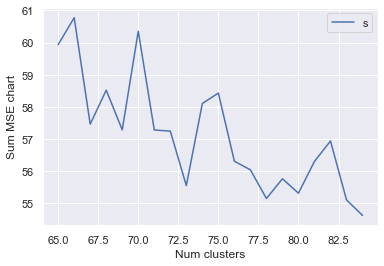

In [192]:
limit=85; start=65; step=6;
x = range(start, limit)
plt.plot(x, sum_mse_values)
plt.xlabel("Num clusters")
plt.ylabel("Sum MSE chart")
plt.legend(("sum_mse_values"), loc='best')
plt.show()

In [89]:
# df_nan_cleared.reset_index()

In [106]:
import pickle
with open("sake_model.pkl", "wb") as file:
    pickle.dump(gauss_mixture, file)